<h1>Desafio da <font color="#62F41E">Tera</font> com a Quinto Andar</h1>

<HR>

A proposta desse desafio é de resolver um case de <b>precificação de imóveis</b>. Esse desafio foi construído em parceria entre a Tera e o QuintoAndar e ofertado para os estudantes da turma de Data Science, onde o objetivo é simular um projeto de machine learning com características semelhantes ao que ocorre no dia a dia da empresa.
<br>
<br>
Para tanto, existem dois objetivos principais:
    
    
<ul>
<li><b>Objetivo 1, interpretabilidade:</b> construir uma regressão linear simples, com poucas variáveis importantes (6), visando gerar insights para corretores e proprietários no quesito precificação dos imóveis. Ou seja, o foco será na interpretação dos coeficientes (ex: se aumentar a área do imóvel em uma unidade isso irá aumentar em Y o preço deste imóvel).<br>
<br>
<li><b>Objetivo 2, predição:</b> construir um modelo com alto poder preditivo, com mais variáveis, visando um bom desempenho e com o intuito de ser usado em uma página web como a calculadora de preço. Note que, em uma situação real, um alto erro de inferência pode gerar grande insatisfação em um proprietário de imóvel, que pode ficar ofendido com o resultado. Por isso, em casos como esse, queremos ter o menor erro possível, mesmo que o modelo  seja complexo e tenha uma interpretação mais difícil.
</ul>

# Processando os dados

Importando os pacotes necessários para a análise.

In [1]:
!pip install matplotlib --upgrade

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as missing
import sweetviz as sv


Bad key text.latex.preview in file C:\Users\lizan\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\lizan\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\lizan\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You proba

Lendo o Banco de Dados:

In [3]:
dados= pd.read_csv('base.csv')

Obervando o Dataset:

In [4]:
dados.head(10)

Id  ClasseImovel ClasseZona  Fachada  TamanhoLote   Rua Beco FormaProp  \
0   1            60         RL     65.0         8450  Pave  NaN       Reg   
1   2            20         RL     80.0         9600  Pave  NaN       Reg   
2   3            60         RL     68.0        11250  Pave  NaN       IR1   
3   4            70         RL     60.0         9550  Pave  NaN       IR1   
4   5            60         RL     84.0        14260  Pave  NaN       IR1   
5   6            50         RL     85.0        14115  Pave  NaN       IR1   
6   7            20         RL     75.0        10084  Pave  NaN       Reg   
7   8            60         RL      NaN        10382  Pave  NaN       IR1   
8   9            50         RM     51.0         6120  Pave  NaN       Reg   
9  10           190         RL     50.0         7420  Pave  NaN       Reg   

  PlanoProp Servicos  ... AreaPiscina QualidadePiscina QualidadeCerca Outros  \
0       Lvl   AllPub  ...           0              NaN            NaN    NaN   
1       Lvl   AllPub  ...           0              NaN            NaN    NaN   
2       Lvl   AllPub  ...           0              NaN            NaN    NaN   
3       Lvl   AllPub  ...           0              NaN            NaN    NaN   
4       Lvl   AllPub  ...           0              NaN            NaN    NaN   
5       Lvl   AllPub  ...           0              NaN          MnPrv   Shed   
6       Lvl   AllPub  ...           0              NaN            NaN    NaN   
7       Lvl   AllPub  ...           0              NaN            NaN   Shed   
8       Lvl   AllPub  ...           0              NaN            NaN    NaN   
9       Lvl   AllPub  ...           0              NaN            NaN    NaN   

  ValorOutros MesVenda AnoVenda  TipoVenda  CondicaoVenda  PrecoVenda  
0           0        2     2008         WD         Normal      208500  
1           0        5     2007         WD         Normal      181500  
2           0        9     2008         WD         Normal      223500  
3           0        2     2006         WD        Abnorml      140000  
4           0       12     2008         WD         Normal      250000  
5         700       10     2009         WD         Normal      143000  
6           0        8     2007         WD         Normal      307000  
7         350       11     2009         WD         Normal      200000  
8           0        4     2008         WD        Abnorml      129900  
9           0        1     2008         WD         Normal      118000  

[10 rows x 81 columns]

In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

dados.corr()

Id  ClasseImovel   Fachada  TamanhoLote  Qualidade  Condicao  AnoConstrucao  AnoReforma  AreaAlvenaria  AreaAcabPorao1  AreaAcabPorao2  AreaInacabPorao  AreaPorao  AreaTerreo  Area2Andar  BaixaQualiAreaAcab  AreaConstruida  BanheiroPorao  LavaboPorao  Banheiro    Lavabo  BedroomAbvGr  KitchenAbvGr  TotalQuartos   Lareira  AnoGaragem  CarrosGaragem  AreaGaragem  AreaDeck  AreaVarandaAberta  AreaVarandaFechada  AreaVaranda3Estacoes  AreaAlpendre  AreaPiscina  ValorOutros  MesVenda  AnoVenda  PrecoVenda
Id                    1.000000      0.011156 -0.010601    -0.033226  -0.028365  0.012609      -0.012713   -0.021998      -0.050298       -0.005024       -0.005968        -0.007940  -0.015415    0.010496    0.005590           -0.044230        0.008273       0.002289    -0.020155  0.005587  0.006784      0.037719      0.002951      0.027239 -0.019772    0.000072       0.016570     0.017634 -0.029643          -0.000477            0.002889             -0.046635      0.001330     0.057044    -0.006242  0.021172  0.000712   -0.021917
ClasseImovel          0.011156      1.000000 -0.386347    -0.139781   0.032628 -0.059316       0.027850    0.040581       0.022936       -0.069836       -0.065649        -0.140759  -0.238518   -0.251758    0.307886            0.046474        0.074853       0.003491    -0.002333  0.131608  0.177354     -0.023438      0.281721      0.040380 -0.045569    0.085072      -0.040110    -0.098672 -0.012579          -0.006100           -0.012037             -0.043825     -0.026030     0.008283    -0.007683 -0.013585 -0.021407   -0.084284
Fachada              -0.010601     -0.386347  1.000000     0.426095   0.251646 -0.059213       0.123349    0.088866       0.193458        0.233633        0.049900         0.132644   0.392075    0.457181    0.080177            0.038469        0.402797       0.100949    -0.007234  0.198769  0.053532      0.263170     -0.006069      0.352096  0.266639    0.070250       0.285691     0.344997  0.088521           0.151972            0.010700              0.070029      0.041383     0.206167     0.003368  0.011200  0.007450    0.351799
TamanhoLote          -0.033226     -0.139781  0.426095     1.000000   0.105806 -0.005636       0.014228    0.013788       0.104160        0.214103        0.111170        -0.002618   0.260833    0.299475    0.050986            0.004779        0.263116       0.158155     0.048046  0.126031  0.014259      0.119690     -0.017784      0.190015  0.271364   -0.024947       0.154871     0.180403  0.171698           0.084774           -0.018340              0.020423      0.043160     0.077672     0.038068  0.001205 -0.014261    0.263843
Qualidade            -0.028365      0.032628  0.251646     0.105806   1.000000 -0.091932       0.572323    0.550684       0.411876        0.239666       -0.059119         0.308159   0.537808    0.476224    0.295493           -0.030429        0.593007       0.111098    -0.040150  0.550600  0.273458      0.101676     -0.183882      0.427452  0.396765    0.547766       0.600671     0.562022  0.238923           0.308819           -0.113937              0.030371      0.064886     0.065166    -0.031406  0.070815 -0.027347    0.790982
Condicao              0.012609     -0.059316 -0.059213    -0.005636  -0.091932  1.000000      -0.375983    0.073741      -0.128101       -0.046231        0.040229        -0.136841  -0.171098   -0.144203    0.028942            0.025494       -0.079686      -0.054942     0.117821 -0.194149 -0.060769      0.012980     -0.087001     -0.057583 -0.023820   -0.324297      -0.185758    -0.151521 -0.003334          -0.032589            0.070356              0.025504      0.054811    -0.001985     0.068777 -0.003511  0.043950   -0.077856
AnoConstrucao        -0.012713      0.027850  0.123349     0.014228   0.572323 -0.375983       1.000000    0.592855       0.315707        0.249503       -0.049107         0.149040   0.391452    0.281986    0.010308           -0.183784        0.199010       0.187599    -0.038162  0.468271  

<HR>
<i>Lembrando das informações fornecidas pelo Desafio, sobre as colunas:</i>

<h3><b>Features</b></h3>
<ul>
    <li>23 nominais: normalmente identificam várias categorias de moradias, garagens, materiais e condições ambientais, enquanto as variáveis ordinais normalmente classificam vários itens na propriedade.<br>
    <br>
    <li>23 ordinais<br>
    <br>
    <li>14 discretas: normalmente quantificam o número de itens que existem na casa. Como, por exemplo: o número de cozinhas, quartos e banheiro discretizados por sua localização (porão ou acima do térreo). Adicionalmente, a capacidade da garagem e as datas de construção/reforma também estão registadas.<br>
    <br>
    <li>14 contínuas: estão relacionadas com várias dimensões de área para cada imóvel. Além do típico tamanho do lote e da metragem quadrada total da área habitável, outras variáveis mais específicas são quantificadas no conjunto de dados. Medidas da área do porão, área da sala de estar e até mesmo das varandas estão presentes e divididas em categorias individuais com base na qualidade e no tipo.<br>
</ul>
<br>
Acesse o dicionário completo <a href="https://drive.google.com/file/d/1B3AJBLhDSyNghSVrVnCIr0WudSwQqxBl/view">aqui</a>.
<HR>

Observando as linhas e os tipos:

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1460 non-null   int64  
 1   ClasseImovel          1460 non-null   int64  
 2   ClasseZona            1460 non-null   object 
 3   Fachada               1201 non-null   float64
 4   TamanhoLote           1460 non-null   int64  
 5   Rua                   1460 non-null   object 
 6   Beco                  91 non-null     object 
 7   FormaProp             1460 non-null   object 
 8   PlanoProp             1460 non-null   object 
 9   Servicos              1460 non-null   object 
 10  ConfigLote            1460 non-null   object 
 11  InclinacaoLote        1460 non-null   object 
 12  Bairro                1460 non-null   object 
 13  Estrada1              1460 non-null   object 
 14  Estrada2              1460 non-null   object 
 15  TipoHabitacao        

Como observado, há variáveis que tem dados faltantes e do tipo objeto. Nesse sentido, é interessante avaliarmos elas mais de perto e decidirmos o tratamento de dados.

<h2>Tratamento das variáveis</h2>

<HR>

Avaliando o percentual
 de casos faltantes (missing):

In [7]:
pd.options.display.min_rows = 100

In [8]:
##add um filtro de coluna, pode ser iterando

dados.isnull().mean().round(4)*100

Id                       0.00
ClasseImovel             0.00
ClasseZona               0.00
Fachada                 17.74
TamanhoLote              0.00
Rua                      0.00
Beco                    93.77
FormaProp                0.00
PlanoProp                0.00
Servicos                 0.00
ConfigLote               0.00
InclinacaoLote           0.00
Bairro                   0.00
Estrada1                 0.00
Estrada2                 0.00
TipoHabitacao            0.00
EstiloHabitacao          0.00
Qualidade                0.00
Condicao                 0.00
AnoConstrucao            0.00
AnoReforma               0.00
TipoTelhado              0.00
MaterialTelhado          0.00
Exterior1                0.00
Exterior2                0.00
TipoAlvenaria            0.55
AreaAlvenaria            0.55
QualidadeCobertura       0.00
CondicaoExterna          0.00
TipoFundacao             0.00
AlturaPorao              2.53
CondicaoPorao            2.53
ParedePorao              2.60
TipoAcabPo

Dessa maneira, percebe-se que as variáveis <b> Beco, QualdiadeLareira, QualidadePiscina, QualidadeCerca e Outros</b> tem alta percentgem de valores nulo. Logo, o mais coerente a se fazer é retirar essas colunas do nosso Dataframe.

Excluindo essas colunas:

In [9]:
dados.drop(['Beco','QualdiadeLareira', 'QualidadePiscina','QualidadeCerca','Outros'], axis= 1 , inplace=True)

Verificando se a exclusão ocorreu:

In [10]:
dados.isnull().mean().round(4)*100

Id                       0.00
ClasseImovel             0.00
ClasseZona               0.00
Fachada                 17.74
TamanhoLote              0.00
Rua                      0.00
FormaProp                0.00
PlanoProp                0.00
Servicos                 0.00
ConfigLote               0.00
InclinacaoLote           0.00
Bairro                   0.00
Estrada1                 0.00
Estrada2                 0.00
TipoHabitacao            0.00
EstiloHabitacao          0.00
Qualidade                0.00
Condicao                 0.00
AnoConstrucao            0.00
AnoReforma               0.00
TipoTelhado              0.00
MaterialTelhado          0.00
Exterior1                0.00
Exterior2                0.00
TipoAlvenaria            0.55
AreaAlvenaria            0.55
QualidadeCobertura       0.00
CondicaoExterna          0.00
TipoFundacao             0.00
AlturaPorao              2.53
CondicaoPorao            2.53
ParedePorao              2.60
TipoAcabPorao1           2.53
AreaAcabPo

Verificando onde se localiza os dados faltantes das colunas que ainda possuem vazio:

Obs.: Utilizei a biblioteca missing e apliquei um filtro nos dados para as colunas que tem dados vazios.

<AxesSubplot:>

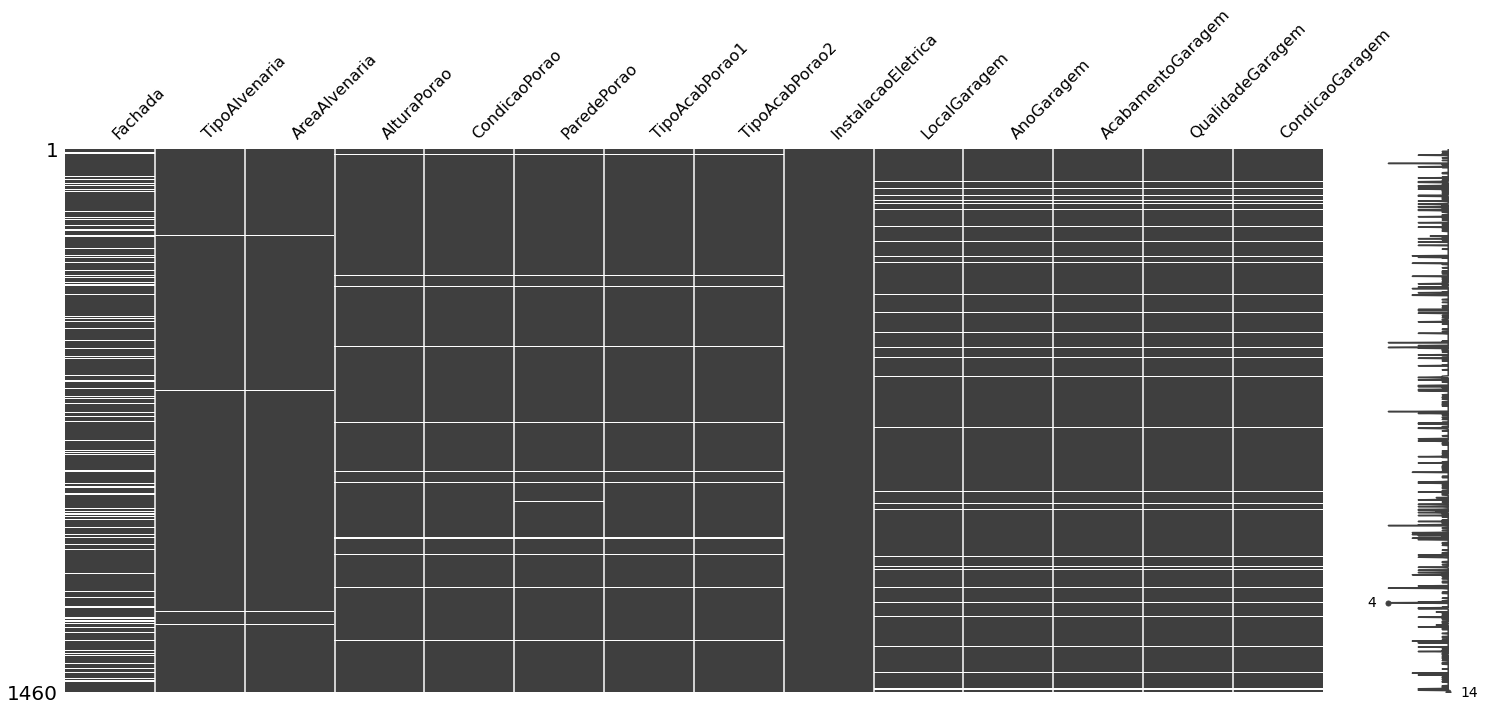

In [11]:
missing.matrix(dados[dados.columns[dados.isnull().any()]])


Como pode ser percebido, as linhas faltantes são as mesmas por tipo de característica da casa. Exemplo: TipoAlvenaria casa com AreaAlvenaria e se referem a Alvenaria. Temos para as features que caracterizam o porão e a garagem também.

Não vamos eliminar esses dados da base, pois isso pode modificar a distribuição do dataset de validação. Ao invés disso, vamos investigar a hipótese dos dados faltantes significarem que a casa não tem o cômodo referido.

Por exemplo, podemos contar os valores que tem para cada Feature e comparar com o dicionário fornecido.

In [12]:
dados[['AlturaPorao']].value_counts()

AlturaPorao
TA             649
Gd             618
Ex             121
Fa              35
dtype: int64

In [13]:
dados[['TipoAlvenaria']].value_counts()

TipoAlvenaria
None             864
BrkFace          445
Stone            128
BrkCmn            15
dtype: int64

In [14]:
dados[['LocalGaragem']].value_counts()

LocalGaragem
Attchd          870
Detchd          387
BuiltIn          88
Basment          19
CarPort           9
2Types            6
dtype: int64

Verificando quantos carros cabem na garagem e sua área, para as garagem que estão com dados faltantes:

In [15]:
dados[['CarrosGaragem']][dados['LocalGaragem'].isnull()].value_counts()


CarrosGaragem
0                81
dtype: int64

In [16]:
dados[['AreaGaragem']][dados['LocalGaragem'].isnull()].value_counts()


AreaGaragem
0              81
dtype: int64

Humm, BINGO! :P

Como pôde ser percebido, as features "AlturadoPorao", "TipoAlvenaria" e "LocalGaragem" não tem em suas respostas o que havia no dicionário como, respectivamente, NA, None e NA. O que nos induz a acreditar que esses dados só estão vazios, pois a casa não tinha os respectivos cômodos. Isso se confirma um pouco mais, quando analisamos os valores de CarrosGaragem para os dados faltantes em LocalGaragem em que apresentou como resultado unânimo: zero carros. Logo, não cabe na garagem carros, pois não há uma garagem.

Obs.: Na vida real, consultaríamos os stakeholders relacionados com a fonte dos dados.

Dessa maneira, vamos acreditar nisso e preencher os dados faltantes dessas features e as relacionadas com essa lógica do "NA" para as colunas que forem objeto e 0 para as numéricas*.

*Para o Ano da Garagem vamos fazer um preenchimento diferente

Verificando os tipos das colunas:

In [17]:
dados[dados.columns[dados.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Fachada             1201 non-null   float64
 1   TipoAlvenaria       1452 non-null   object 
 2   AreaAlvenaria       1452 non-null   float64
 3   AlturaPorao         1423 non-null   object 
 4   CondicaoPorao       1423 non-null   object 
 5   ParedePorao         1422 non-null   object 
 6   TipoAcabPorao1      1423 non-null   object 
 7   TipoAcabPorao2      1422 non-null   object 
 8   InstalacaoEletrica  1459 non-null   object 
 9   LocalGaragem        1379 non-null   object 
 10  AnoGaragem          1379 non-null   float64
 11  AcabamentoGaragem   1379 non-null   object 
 12  QualidadeGaragem    1379 non-null   object 
 13  CondicaoGaragem     1379 non-null   object 
dtypes: float64(3), object(11)
memory usage: 159.8+ KB


Preenchendo as colunas com "NA" ou 0.

In [18]:
colunas_to_fill= ['TipoAlvenaria', 'AlturaPorao', 'CondicaoPorao', 'ParedePorao', 'TipoAcabPorao1', 'TipoAcabPorao2', 'LocalGaragem','AcabamentoGaragem','QualidadeGaragem', 'CondicaoGaragem']


for col in colunas_to_fill:
    if col in dados.columns:
        dados[col].fillna(value = "NA", inplace = True)

        
dados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1460 non-null   int64  
 1   ClasseImovel          1460 non-null   int64  
 2   ClasseZona            1460 non-null   object 
 3   Fachada               1201 non-null   float64
 4   TamanhoLote           1460 non-null   int64  
 5   Rua                   1460 non-null   object 
 6   FormaProp             1460 non-null   object 
 7   PlanoProp             1460 non-null   object 
 8   Servicos              1460 non-null   object 
 9   ConfigLote            1460 non-null   object 
 10  InclinacaoLote        1460 non-null   object 
 11  Bairro                1460 non-null   object 
 12  Estrada1              1460 non-null   object 
 13  Estrada2              1460 non-null   object 
 14  TipoHabitacao         1460 non-null   object 
 15  EstiloHabitacao      

Verificando se o preenchimento deu certo:

In [19]:
dados[['LocalGaragem']].value_counts()

LocalGaragem
Attchd          870
Detchd          387
BuiltIn          88
NA               81
Basment          19
CarPort           9
2Types            6
dtype: int64

Preenchendo agora as colunas que são float com zero, AreaAlvenaria e AnoGaragem.

In [20]:
colunas_to_fill2= ['AreaAlvenaria']


for col in colunas_to_fill2:
    if col in dados.columns:
        dados[col].fillna(value = 0, inplace = True)

        
dados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1460 non-null   int64  
 1   ClasseImovel          1460 non-null   int64  
 2   ClasseZona            1460 non-null   object 
 3   Fachada               1201 non-null   float64
 4   TamanhoLote           1460 non-null   int64  
 5   Rua                   1460 non-null   object 
 6   FormaProp             1460 non-null   object 
 7   PlanoProp             1460 non-null   object 
 8   Servicos              1460 non-null   object 
 9   ConfigLote            1460 non-null   object 
 10  InclinacaoLote        1460 non-null   object 
 11  Bairro                1460 non-null   object 
 12  Estrada1              1460 non-null   object 
 13  Estrada2              1460 non-null   object 
 14  TipoHabitacao         1460 non-null   object 
 15  EstiloHabitacao      

Para o "Ano garagem", como não faz sentido Ano = 0, vamos preencher essa coluna com algum outro ano que temos de informação sobre a construção. Como pode ser observado na matriz de correlação gerada no início desse notebook, a feature "Anogaragem" tem uma boa correlação com o "AnoConstrucao" (>0,82).

Logo, vamos preencher os dados faltantes com o Ano de Construção!

In [21]:
dados['AnoGaragem'].fillna(dados['AnoConstrucao'], inplace= True)

Verificando se o preenchimento deu certo:

In [22]:
dados['AnoGaragem'].value_counts()

2005.0    65
2006.0    60
2004.0    54
2003.0    50
2007.0    50
1977.0    36
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
1968.0    27
2002.0    26
1950.0    24
1970.0    23
1993.0    22
1958.0    22
1965.0    22
1962.0    21
2009.0    21
1966.0    21
1954.0    20
1978.0    20
1996.0    20
2001.0    20
1957.0    20
1994.0    19
1960.0    19
1959.0    19
1920.0    19
1974.0    19
1997.0    19
1964.0    18
1995.0    18
1940.0    18
1971.0    17
1956.0    17
1990.0    17
1963.0    16
1972.0    16
1979.0    15
1980.0    15
1969.0    15
1967.0    15
1955.0    15
1973.0    14
1988.0    14
1961.0    14
1992.0    13
1987.0    12
1941.0    12
1953.0    12
1985.0    11
1925.0    11
1948.0    11
1991.0    10
1981.0    10
1989.0    10
1975.0    10
1930.0    10
1939.0     9
1949.0     9
1910.0     8
1922.0     8
1984.0     8
1983.0     7
1926.0     7
1951.0     6
1986.0     6
1935.0     6
1916.0     6
1946.0     6
1936.0     6
1914.0     6
1945.0     5
1931.0     5
1924.0     5

Ainda temos a feature "Fachada" com valores vazios. Nesse sentido, vamos investigá-la um pouco mais.

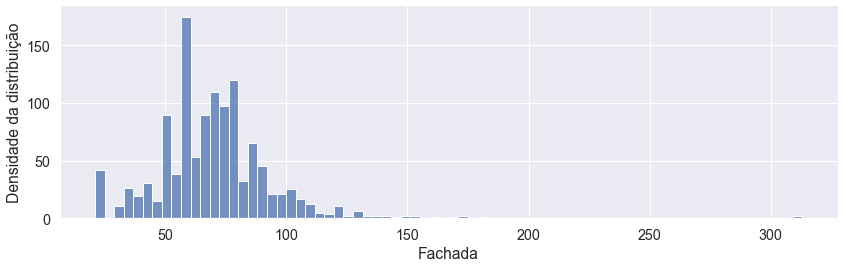

In [23]:
sns.set(font_scale = 1.3) # Para aumentar o tamanho da fonte
coluna = 'Fachada' # Coluna a ser representada

# Instanciando o Displot. Só precisamos da coluna que queremos representar
sns.displot(
    dados[coluna], #Dados a serem representados. Selecionamos apenas a coluna de interesse
    height=4, # Altura em polegadas do gráfico
    aspect=3, # Proporção entre largura e altura do gráfico. Números > 1 representam retâgulos mais 'deitados'
    kind='hist' # Distribuição contínua,
)
plt.ylabel('Densidade da distribuição')
plt.show()

<AxesSubplot:xlabel='Fachada'>

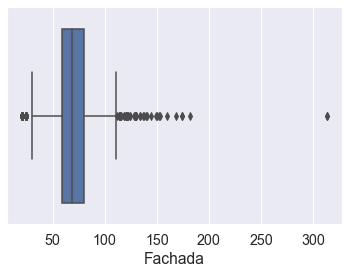

In [24]:
sns.boxplot(x=dados['Fachada'])

In [25]:
dados['Fachada'][dados['Fachada'] > 300].value_counts()

313.0    2
Name: Fachada, dtype: int64

Observando que há dois pontos no valor de 312 ft para fachada que está muito discrepantes dos outros. Entendendo a característas desses dois pontos: 

In [26]:
dados['ClasseZona'][dados['Fachada'] > 300].value_counts()

RL    2
Name: ClasseZona, dtype: int64

In [27]:
dados['ConfigLote'][dados['Fachada'] > 300].value_counts()

Inside    1
Corner    1
Name: ConfigLote, dtype: int64

In [28]:
dados['ClasseImovel'][dados['Fachada'] > 300].value_counts()

20    1
60    1
Name: ClasseImovel, dtype: int64

Investigando a relação da Fachada com outras variáveis, para pegar informações que nos ajude a preencher os dados faltantes.

In [29]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

dados.corr()

Id  ClasseImovel   Fachada  TamanhoLote  Qualidade  Condicao  AnoConstrucao  AnoReforma  AreaAlvenaria  AreaAcabPorao1  AreaAcabPorao2  AreaInacabPorao  AreaPorao  AreaTerreo  Area2Andar  BaixaQualiAreaAcab  AreaConstruida  BanheiroPorao  LavaboPorao  Banheiro    Lavabo  BedroomAbvGr  KitchenAbvGr  TotalQuartos   Lareira  AnoGaragem  CarrosGaragem  AreaGaragem  AreaDeck  AreaVarandaAberta  AreaVarandaFechada  AreaVaranda3Estacoes  AreaAlpendre  AreaPiscina  ValorOutros  MesVenda  AnoVenda  PrecoVenda
Id                    1.000000      0.011156 -0.010601    -0.033226  -0.028365  0.012609      -0.012713   -0.021998      -0.051071       -0.005024       -0.005968        -0.007940  -0.015415    0.010496    0.005590           -0.044230        0.008273       0.002289    -0.020155  0.005587  0.006784      0.037719      0.002951      0.027239 -0.019772    0.007429       0.016570     0.017634 -0.029643          -0.000477            0.002889             -0.046635      0.001330     0.057044    -0.006242  0.021172  0.000712   -0.021917
ClasseImovel          0.011156      1.000000 -0.386347    -0.139781   0.032628 -0.059316       0.027850    0.040581       0.023573       -0.069836       -0.065649        -0.140759  -0.238518   -0.251758    0.307886            0.046474        0.074853       0.003491    -0.002333  0.131608  0.177354     -0.023438      0.281721      0.040380 -0.045569    0.039567      -0.040110    -0.098672 -0.012579          -0.006100           -0.012037             -0.043825     -0.026030     0.008283    -0.007683 -0.013585 -0.021407   -0.084284
Fachada              -0.010601     -0.386347  1.000000     0.426095   0.251646 -0.059213       0.123349    0.088866       0.192411        0.233633        0.049900         0.132644   0.392075    0.457181    0.080177            0.038469        0.402797       0.100949    -0.007234  0.198769  0.053532      0.263170     -0.006069      0.352096  0.266639    0.093558       0.285691     0.344997  0.088521           0.151972            0.010700              0.070029      0.041383     0.206167     0.003368  0.011200  0.007450    0.351799
TamanhoLote          -0.033226     -0.139781  0.426095     1.000000   0.105806 -0.005636       0.014228    0.013788       0.103321        0.214103        0.111170        -0.002618   0.260833    0.299475    0.050986            0.004779        0.263116       0.158155     0.048046  0.126031  0.014259      0.119690     -0.017784      0.190015  0.271364    0.003669       0.154871     0.180403  0.171698           0.084774           -0.018340              0.020423      0.043160     0.077672     0.038068  0.001205 -0.014261    0.263843
Qualidade            -0.028365      0.032628  0.251646     0.105806   1.000000 -0.091932       0.572323    0.550684       0.407252        0.239666       -0.059119         0.308159   0.537808    0.476224    0.295493           -0.030429        0.593007       0.111098    -0.040150  0.550600  0.273458      0.101676     -0.183882      0.427452  0.396765    0.555022       0.600671     0.562022  0.238923           0.308819           -0.113937              0.030371      0.064886     0.065166    -0.031406  0.070815 -0.027347    0.790982
Condicao              0.012609     -0.059316 -0.059213    -0.005636  -0.091932  1.000000      -0.375983    0.073741      -0.125694       -0.046231        0.040229        -0.136841  -0.171098   -0.144203    0.028942            0.025494       -0.079686      -0.054942     0.117821 -0.194149 -0.060769      0.012980     -0.087001     -0.057583 -0.023820   -0.296887      -0.185758    -0.151521 -0.003334          -0.032589            0.070356              0.025504      0.054811    -0.001985     0.068777 -0.003511  0.043950   -0.077856
AnoConstrucao        -0.012713      0.027850  0.123349     0.014228   0.572323 -0.375983       1.000000    0.592855       0.311600        0.249503       -0.049107         0.149040   0.391452    0.281986    0.010308           -0.183784        0.199010       0.187599    -0.038162  0.468271  

Como percebido, a variável que a Fachada possui mais relação é com a Área do Térreo. Vamos construir um modelo de regressão linear simples para preencher os valores faltantes da Fachada a partir da área do Térreo.

Primeiramente, vamos plotar um gráfico para entender como é a relação entre essas duas variáveis:

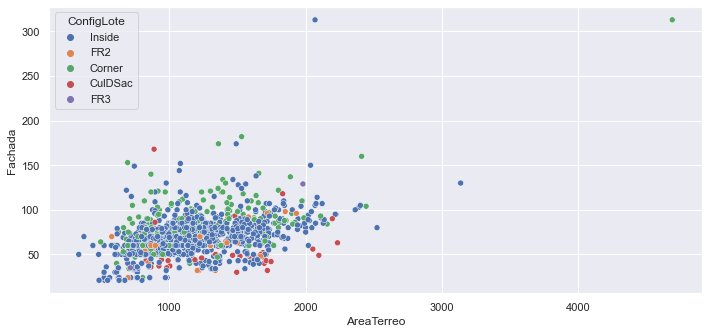

In [30]:
sns.set(rc={'figure.figsize':(11.7,5.27)})

sns.scatterplot(x = 'AreaTerreo', y = 'Fachada', hue = 'ConfigLote', data = dados);

In [31]:
dados['ConfigLote'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: ConfigLote, dtype: int64

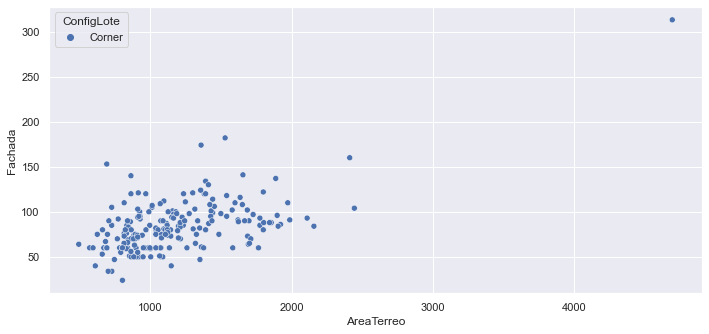

In [32]:
sns.scatterplot(x = 'AreaTerreo', y = 'Fachada', hue = 'ConfigLote', data = dados[dados['ConfigLote'] == "Corner" ]);

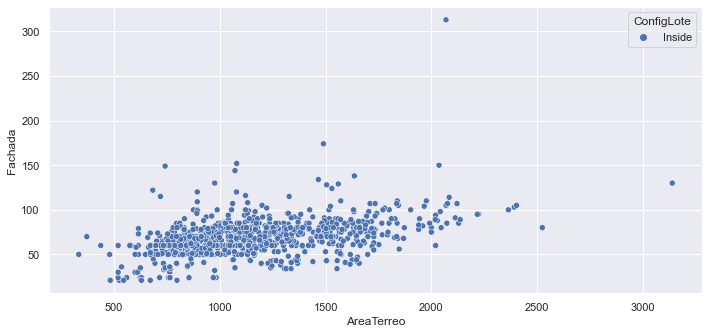

In [33]:
sns.scatterplot(x = 'AreaTerreo', y = 'Fachada', hue = 'ConfigLote', data = dados[dados['ConfigLote'] == "Inside"]);

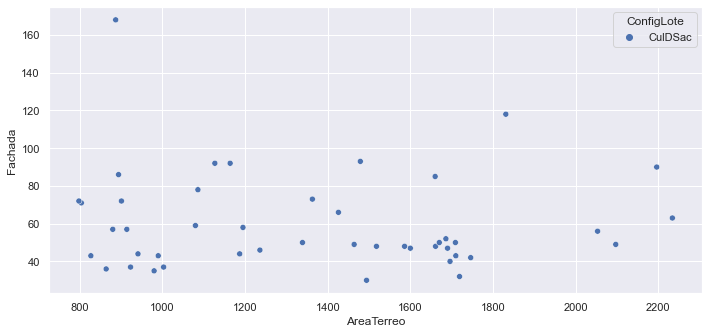

In [34]:
sns.scatterplot(x = 'AreaTerreo', y = 'Fachada', hue = 'ConfigLote', data = dados[dados['ConfigLote'] == "CulDSac"]);

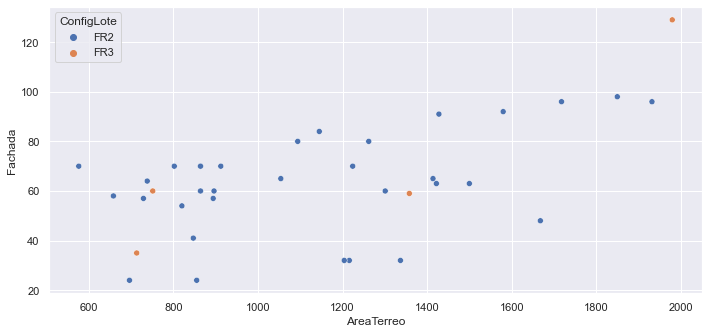

In [35]:
sns.scatterplot(x = 'AreaTerreo', y = 'Fachada', hue = 'ConfigLote', data = dados.loc[ (dados.ConfigLote == "FR2") | (dados.ConfigLote == "FR3")]);

Como pôde ser percebido, a Configuração do lote pode ser uma variável adicional informativa para para prever o valor da fachada já que essa feature determina, aparentemente, ângulos diferentes de crescimento dos dados. Assim, podemos fazer uma regressão linear para cada Configuração de lote.

In [36]:
dados[['ConfigLote']][dados['Fachada'].isnull()].value_counts()

ConfigLote
Inside        134
Corner         62
CulDSac        49
FR2            14
dtype: int64

In [37]:
x_test= dados[['AreaTerreo']].loc[(dados.Fachada.isnull() == True) & (dados.ConfigLote == "Corner")]

x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 7 to 1429
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   AreaTerreo  62 non-null     int64
dtypes: int64(1)
memory usage: 992.0 bytes


In [38]:
from sklearn.linear_model import LinearRegression

#Regressão linear para ConfigLote == "Corner"

lr = LinearRegression()

x_test= dados[['AreaTerreo']].loc[(dados.Fachada.isnull() == True) & (dados.ConfigLote == "Corner")]
 #Criando a variável explicativa de teste 
x_train = dados[['AreaTerreo']].loc[(dados.Fachada.isnull() == False) & (dados.ConfigLote == "Corner")] #Criando a variável explicativa de treino
y_train = dados['Fachada'].loc[(dados.Fachada.isnull() == False) & (dados.ConfigLote == "Corner")]
lr.fit(x_train,y_train)

pred = lr.predict(x_test)
pred1= lr.predict(x_train)

In [39]:
#Assumo que o atual valor é y_train e pred2 é o valor predito

from sklearn.metrics import r2_score 

r2 = r2_score(y_train, pred1)

print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.3559105366452544


In [40]:
#Arredondando os valores

pred = pred.round(1) #Valor preditivo para CongigLote == Corner

#Preenchendo os valores de acordo com sua Config do Lote

dados.loc[(dados.Fachada.isnull() == True) & (dados.ConfigLote == "Corner"), 'Fachada'] = pred

dados[['ConfigLote']][dados['Fachada'].isnull()].value_counts()

ConfigLote
Inside        134
CulDSac        49
FR2            14
dtype: int64

Fazendo a regressão linear para os casos que a ConfigLote é Inside, CulDSac e FR2:

In [41]:
from sklearn.linear_model import LinearRegression

#Regressão linear para ConfigLote == "Inside"

lr2 = LinearRegression()

x_test2= dados[['AreaTerreo']].loc[(dados.Fachada.isnull() == True) & (dados.ConfigLote == "Inside")]
 #Criando a variável explicativa de teste 
x_train2 = dados[['AreaTerreo']].loc[(dados.Fachada.isnull() == False) & (dados.ConfigLote == "Inside")] #Criando a variável explicativa de treino
y_train2 = dados['Fachada'].loc[(dados.Fachada.isnull() == False) & (dados.ConfigLote == "Inside")]
lr2.fit(x_train2,y_train2)

pred2 = lr2.predict(x_test2)
pred22= lr2.predict(x_train2)

r22 = r2_score(y_train2, pred22)

print('r2 score for perfect model is', r22)

r2 score for perfect model is 0.21541914554376074


In [42]:
pred2 = pred2.round(1) #Valor preditivo para CongigLote == Inside

dados.loc[(dados.Fachada.isnull() == True) & (dados.ConfigLote == "Inside"), 'Fachada'] = pred2

dados[['ConfigLote']][dados['Fachada'].isnull()].value_counts()

ConfigLote
CulDSac       49
FR2           14
dtype: int64

In [43]:
#Regressão linear para ConfigLote == "FR2"

lr4 = LinearRegression()

x_test4= dados[['AreaTerreo']].loc[(dados.Fachada.isnull() == True) & (dados.ConfigLote == "FR2")]
 #Criando a variável explicativa de teste 
x_train4 = dados[['AreaTerreo']].loc[(dados.Fachada.isnull() == False) & (dados.ConfigLote == "FR2")] #Criando a variável explicativa de treino
y_train4 = dados['Fachada'].loc[(dados.Fachada.isnull() == False) & (dados.ConfigLote == "FR2")]
lr4.fit(x_train4,y_train4)

pred4 = lr4.predict(x_test4)
pred44= lr4.predict(x_train4)

r44 = r2_score(y_train4, pred44)

print('r2 score for perfect model is', r44)

r2 score for perfect model is 0.20725760240256952


In [44]:
pred4 = pred4.round(1) #Valor preditivo para CongigLote == Inside

dados.loc[(dados.Fachada.isnull() == True) & (dados.ConfigLote == "FR2"), 'Fachada'] = pred4

In [45]:
dados[['ConfigLote']][dados['Fachada'].isnull()].value_counts()

ConfigLote
CulDSac       49
dtype: int64

In [46]:
from sklearn.linear_model import LinearRegression

#Regressão linear para ConfigLote == "CulDSac"

lr3 = LinearRegression()

x_test3= dados[['AreaTerreo']].loc[(dados.Fachada.isnull() == True) & (dados.ConfigLote == "CulDSac")]
 #Criando a variável explicativa de teste 
x_train3 = dados[['AreaTerreo']].loc[(dados.Fachada.isnull() == False) & (dados.ConfigLote == "CulDSac")] #Criando a variável explicativa de treino
y_train3 = dados['Fachada'].loc[(dados.Fachada.isnull() == False) & (dados.ConfigLote == "CulDSac")]
lr3.fit(x_train3,y_train3)

pred3 = lr3.predict(x_test3)
pred33= lr3.predict(x_train3)

r33 = r2_score(y_train3, pred33)

print('r2 score for perfect model is', r33)

r2 score for perfect model is 0.005449402675075987


Como percebido acima, a reta da regressão linear para o caso de ConfigLote "CulDSac" não teve muito bom ajuste. Logo, ao invés de preenchermos os dados faltantes com a regressão, vamos preencher com a média.

In [47]:
dados['Fachada'].fillna(dados['Fachada'][dados['ConfigLote'] == "CulDSac"].mean(), inplace= True)

In [48]:
dados[['ConfigLote']][dados['Fachada'].isnull()].value_counts()

Series([], dtype: int64)

In [49]:
dados['Fachada'][dados['ConfigLote'] == "CulDSac"].head()

16    59.911111
28    47.000000
31    59.911111
42    59.911111
43    59.911111
Name: Fachada, dtype: float64

In [50]:
#Arredondando os dados da Fachada

dados.Fachada = dados.Fachada.round(1)
dados.Fachada.value_counts()

60.0     144
70.0      71
80.0      69
50.0      57
75.0      53
59.9      51
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
64.0      20
68.0      19
24.0      19
79.0      18
72.0      18
73.0      18
55.0      17
63.0      17
100.0     16
74.0      15
51.0      15
66.0      15
52.0      15
76.0      14
59.0      13
67.0      13
57.0      13
71.0      12
82.0      12
43.0      12
40.0      12
69.0      11
92.0      10
53.0      10
88.0      10
34.0      10
86.0      10
61.0      10
84.0       9
35.0       9
77.0       9
62.0       9
44.0       9
98.0       8
96.0       8
59.6       8
93.0       8
107.0      7
58.0       7
81.0       7
95.0       7
120.0      7
30.0       6
54.0       6
41.0       6
91.0       6
110.0      6
94.0       6
105.0      6
36.0       6
48.0       6
89.0       6
87.0       5
61.1       5
37.0       5
47.0       5
56.0       5
83.0       5
32.0       5
49.0       4
102.0      4
42.0       4
65.3       4
99.0       3
103.0      3
66.5       3

Verificando se ainda há dado faltante e a substituição funcionou:

In [51]:
dados[dados.columns[dados.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   InstalacaoEletrica  1459 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


A única coluna com <b>dado faltanta agora é a de InstalaçãoElétrica</b> com apenas um dado faltante. Logo, como é um dado categórico, podemos completar esse dado faltante com a moda.

In [52]:
dados['InstalacaoEletrica'].fillna(dados['InstalacaoEletrica'].mode()[0], inplace= True)


In [53]:
dados[dados.columns[dados.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Empty DataFrame

Ok, agora todos os dados nulos foram preenchidos! ;)

<h2>Verificando erros de preenchimento no Dataset</h2>

<HR>

Com a função "Describe", vamos avaliar de forma geral se há alguma coluna chamando atenção pelos dados discrepantes. 

In [54]:
dados.drop(columns=['Id']).describe(percentiles = [.25, .5, .75, .95, .99]).round(2)

ClasseImovel  Fachada  TamanhoLote  Qualidade  Condicao  AnoConstrucao  AnoReforma  AreaAlvenaria  AreaAcabPorao1  AreaAcabPorao2  AreaInacabPorao  AreaPorao  AreaTerreo  Area2Andar  BaixaQualiAreaAcab  AreaConstruida  BanheiroPorao  LavaboPorao  Banheiro   Lavabo  BedroomAbvGr  KitchenAbvGr  TotalQuartos  Lareira  AnoGaragem  CarrosGaragem  AreaGaragem  AreaDeck  AreaVarandaAberta  AreaVarandaFechada  AreaVaranda3Estacoes  AreaAlpendre  AreaPiscina  ValorOutros  MesVenda  AnoVenda  PrecoVenda
count        1460.0  1460.00      1460.00    1460.00   1460.00        1460.00     1460.00        1460.00         1460.00         1460.00          1460.00    1460.00     1460.00     1460.00             1460.00         1460.00        1460.00      1460.00   1460.00  1460.00       1460.00       1460.00       1460.00  1460.00     1460.00        1460.00      1460.00   1460.00            1460.00             1460.00               1460.00       1460.00      1460.00      1460.00   1460.00   1460.00     1460.00
mean           56.9    70.11     10516.83       6.10      5.58        1971.27     1984.87         103.12          443.64           46.55           567.24    1057.43     1162.63      346.99                5.84         1515.46           0.43         0.06      1.57     0.38          2.87          1.05          6.52     0.61     1976.51           1.77       472.98     94.24              46.66               21.95                  3.41         15.06         2.76        43.49      6.32   2007.82   180921.20
std            42.3    22.81      9981.26       1.38      1.11          30.20       20.65         180.73          456.10          161.32           441.87     438.71      386.59      436.53               48.62          525.48           0.52         0.24      0.55     0.50          0.82          0.22          1.63     0.64       26.31           0.75       213.80    125.34              66.26               61.12                 29.32         55.76        40.18       496.12      2.70      1.33    79442.50
min            20.0    21.00      1300.00       1.00      1.00        1872.00     1950.00           0.00            0.00            0.00             0.00       0.00      334.00        0.00                0.00          334.00           0.00         0.00      0.00     0.00          0.00          0.00          2.00     0.00     1872.00           0.00         0.00      0.00               0.00                0.00                  0.00          0.00         0.00         0.00      1.00   2006.00    34900.00
25%            20.0    59.90      7553.50       5.00      5.00        1954.00     1967.00           0.00            0.00            0.00           223.00     795.75      882.00        0.00                0.00         1129.50           0.00         0.00      1.00     0.00          2.00          1.00          5.00     0.00     1959.00           1.00       334.50      0.00               0.00                0.00                  0.00          0.00         0.00         0.00      5.00   2007.00   129975.00
50%            50.0    68.40      9478.50       6.00      5.00        1973.00     1994.00           0.00          383.50            0.00           477.50     991.50     1087.00        0.00                0.00         1464.00           0.00         0.00      2.00     0.00          3.00          1.00          6.00     1.00     1978.00           2.00       480.00      0.00              25.00                0.00                  0.00          0.00         0.00         0.00      6.00   2008.00   163000.00
75%            70.0    80.00     11601.50       7.00      6.00        2000.00     2004.00         164.25          712.25            0.00           808.00    1298.25     1391.25      728.00                0.00         1776.75           1.00         0.00      2.00     1.00          3.00          1.00          7.00     1.00     2001.00           2.00       576.00    168.00              68.00                0.00                  0.00          0.00         0.00     

De início, percebemos que a Feature "TamanhoLote" tem um valor muito discrepante. Vamos observar essa feature mais de perto!

<AxesSubplot:xlabel='TamanhoLote'>

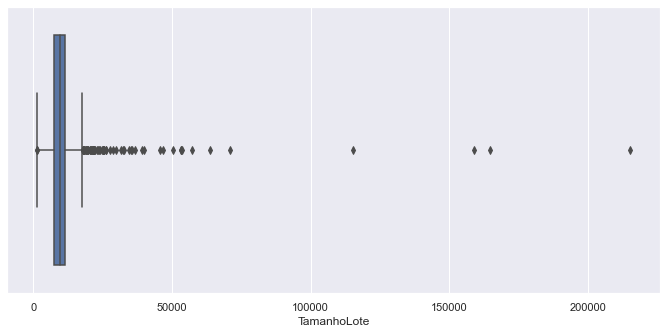

In [55]:
sns.boxplot(x=dados['TamanhoLote'])

Quem são essas construções com os valores de TamanhoLote > 100.000? 

Faz sentido? Investigaremos.

In [56]:
dados[dados['TamanhoLote'] > 100000].head(10)

Id  ClasseImovel ClasseZona  Fachada  TamanhoLote   Rua FormaProp PlanoProp Servicos ConfigLote InclinacaoLote   Bairro Estrada1 Estrada2 TipoHabitacao EstiloHabitacao  Qualidade  Condicao  AnoConstrucao  AnoReforma TipoTelhado MaterialTelhado Exterior1 Exterior2 TipoAlvenaria  AreaAlvenaria QualidadeCobertura CondicaoExterna TipoFundacao AlturaPorao CondicaoPorao ParedePorao TipoAcabPorao1  AreaAcabPorao1 TipoAcabPorao2  AreaAcabPorao2  AreaInacabPorao  AreaPorao Aquecimento QualidadeAquecimento ArCentral InstalacaoEletrica  AreaTerreo  Area2Andar  BaixaQualiAreaAcab  AreaConstruida  BanheiroPorao  LavaboPorao  Banheiro  Lavabo  BedroomAbvGr  KitchenAbvGr QualidadeCozinha  TotalQuartos Funcionalidade  Lareira LocalGaragem  AnoGaragem AcabamentoGaragem  CarrosGaragem  AreaGaragem QualidadeGaragem CondicaoGaragem EntradaPavimentada  AreaDeck  AreaVarandaAberta  AreaVarandaFechada  AreaVaranda3Estacoes  AreaAlpendre  AreaPiscina  ValorOutros  MesVenda  AnoVenda TipoVenda  \
249  250            50         RL     59.9       159000  Pave       IR2       Low   AllPub    CulDSac            Sev  ClearCr     Norm     Norm          1Fam          1.5Fin          6         7           1958        2006       Gable         CompShg   Wd Sdng   HdBoard        BrkCmn          472.0                 Gd              TA       CBlock          Gd            TA          Gd            Rec             697            Unf               0              747       1444        GasA                   Gd         Y              SBrkr        1444         700                   0            2144              0            1         2       0             4             1               Gd             7            Typ        2       Attchd      1958.0               Fin              2          389               TA              TA                  Y         0                 98                   0                     0             0            0          500         6      2007        WD   
313  314            20         RL    150.0       215245  Pave       IR3       Low   AllPub     Inside            Sev   Timber     Norm     Norm          1Fam          1Story          7         5           1965        1965         Hip         CompShg   BrkFace   BrkFace          None            0.0                 TA              TA       CBlock          Gd            TA          Gd            ALQ            1236            Rec             820               80       2136        GasW                   TA         Y              SBrkr        2036           0                   0            2036              2            0         2       0             3             1               TA             8            Typ        2       Attchd      1965.0               RFn              2          513               TA              TA                  Y         0                  0                   0                     0             0            0            0         6      2009        WD   
335  336           190         RL    101.4       164660  Grvl       IR1       HLS   AllPub     Corner            Sev   Timber     Norm     Norm        2fmCon          1.5Fin          5         6           1965        1965       Gable         CompShg   Plywood   Plywood          None            0.0                 TA              TA       CBlock          TA            TA          Gd            ALQ            1249            BLQ             147              103       1499        GasA                   Ex         Y              SBrkr        1619         167                   0            1786              2            0         2       0             3             1               TA             7            Typ        2       Attchd      1965.0               Fin              2          529               TA              TA                  Y       670                  0                   0                     0             0            0          700         8      2008        WD   
706  707            20         RL 

São residências localizadas em zonas de baixa densidade, possuem muitos quartos e ficam em 2 bairros específicos "ClearCr" e "Timber". Vamos investigar um pouco mais o padrão das residências desses bairros e sua relação. 

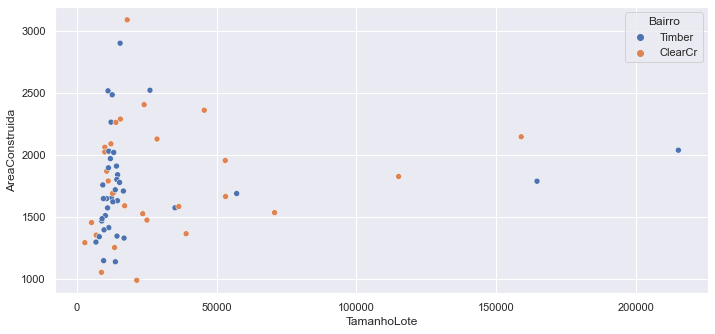

In [57]:
dados_correcao = dados.loc[(dados['Bairro'] == "ClearCr") | (dados['Bairro'] == "Timber")]

sns.scatterplot(x = 'TamanhoLote', y = 'AreaConstruida', hue = 'Bairro', data = dados_correcao);

Como percebido no gráfico acima, aparentemente parece haver um erro de preenchimento no tamanho do lote para essas propriedades que tem o valor maior que 100.000 ft², porém não posso afirmar com certeza, pois não entendi consegui compreender se as casas possuem erro no preenchimento. 

Vou voltar para avaliar depois!

<h2>Análise Exploratória</h2>

<HR>

Inicialmente, vamos verificar como está a distribuição da variável "<b>PrecoVenda</b>":

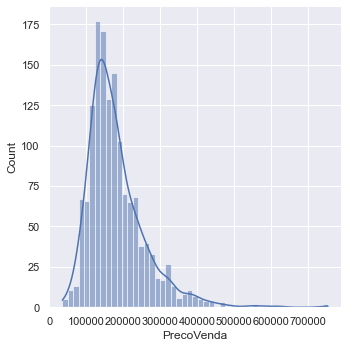

In [58]:
sns.displot(dados, x="PrecoVenda", kde=True)

Existe alguns valores que estão "alongando" a calda, mas em geral a distribuição está próxima de uma normal.

In [59]:
dados['PrecoVenda'].describe(percentiles = [.25, .5, .75, .95, .99]).round(1)


count      1460.0
mean     180921.2
std       79442.5
min       34900.0
25%      129975.0
50%      163000.0
75%      214000.0
95%      326100.0
99%      442567.0
max      755000.0
Name: PrecoVenda, dtype: float64

Entendendo a correlação das variáveis:

In [60]:
dados_i = dados.loc[:,::-1]
dados_i.corr()

PrecoVenda  AnoVenda  MesVenda  ValorOutros  AreaPiscina  AreaAlpendre  AreaVaranda3Estacoes  AreaVarandaFechada  AreaVarandaAberta  AreaDeck  AreaGaragem  CarrosGaragem  AnoGaragem   Lareira  TotalQuartos  KitchenAbvGr  BedroomAbvGr    Lavabo  Banheiro  LavaboPorao  BanheiroPorao  AreaConstruida  BaixaQualiAreaAcab  Area2Andar  AreaTerreo  AreaPorao  AreaInacabPorao  AreaAcabPorao2  AreaAcabPorao1  AreaAlvenaria  AnoReforma  AnoConstrucao  Condicao  Qualidade  TamanhoLote   Fachada  ClasseImovel        Id
PrecoVenda              1.000000 -0.028923  0.046432    -0.021190     0.092404      0.111447              0.044584           -0.128578           0.315856  0.324413     0.623431       0.640409    0.508043  0.466929      0.533723     -0.135907      0.168213  0.284108  0.560664    -0.016844       0.227122        0.708624           -0.025606    0.319334    0.605852   0.613581         0.214479       -0.011378        0.386420       0.472614    0.507101       0.522897 -0.077856   0.790982     0.263843  0.352709     -0.084284 -0.021917
AnoVenda               -0.028923  1.000000 -0.145721     0.004906    -0.059689      0.010694              0.018645           -0.009916          -0.057619  0.022270    -0.027378      -0.039117   -0.009877 -0.024096     -0.034516      0.031687     -0.036014 -0.010269 -0.019669    -0.046524       0.067049       -0.036526           -0.028921   -0.028700   -0.013604  -0.014969        -0.041258        0.031706        0.014359      -0.008317    0.035743      -0.013618  0.043950  -0.027347    -0.014261 -0.002943     -0.021407  0.000712
MesVenda                0.046432 -0.145721  1.000000    -0.006495    -0.033737      0.023217              0.029474           -0.028887           0.071255  0.021011     0.027974       0.040522    0.010798  0.046357      0.036907      0.026589      0.046544 -0.009050  0.055872     0.032873      -0.025361        0.050240           -0.022174    0.035164    0.031372   0.013196         0.034888       -0.015211       -0.015727      -0.006723    0.021490       0.012398 -0.003511   0.070815     0.001205  0.013596     -0.013585  0.021172
ValorOutros            -0.021190  0.004906 -0.006495     1.000000     0.029669      0.031946              0.000354            0.018361          -0.018584 -0.009551    -0.027400      -0.043080   -0.032625  0.001409      0.024763      0.062341      0.007767  0.001290 -0.014290    -0.007367      -0.023047       -0.002416           -0.003793    0.016197   -0.021096  -0.018479        -0.023837        0.004940        0.003571      -0.029512   -0.010286      -0.034383  0.068777  -0.031406     0.038068 -0.006393     -0.007683 -0.006242
AreaPiscina             0.092404 -0.059689 -0.033737     0.029669     1.000000      0.051307             -0.007992            0.054203           0.060762  0.073378     0.061047       0.020934   -0.008004  0.095074      0.083757     -0.014525      0.070703  0.022381  0.049604     0.020025       0.067616        0.170205            0.062157    0.081487    0.131525   0.126053        -0.035092        0.041709        0.140491       0.011928    0.005829       0.004950 -0.001985   0.065166     0.077672  0.168871      0.008283  0.057044
AreaAlpendre            0.111447  0.010694  0.023217     0.031946     0.051307      1.000000             -0.031436           -0.082864           0.074304 -0.074181     0.051412       0.050494   -0.048105  0.184530      0.059383     -0.051613      0.044300  0.072426 -0.008106     0.032121       0.023148        0.101510            0.026799    0.040606    0.088758   0.084489        -0.012579        0.088871        0.062021       0.062248   -0.038740      -0.050364  0.054811   0.064886     0.043160  0.043021     -0.026030  0.001330
AreaVaranda3Estacoes    0.044584  0.018645  0.029474     0.000354    -0.007992     -0.031436              1.000000           -0.037305          -0.005842 -0.032771     0.035087       0.035765    0.030308  0.011257     -0.006683     -0.024600     -0.024478 -0.004972  0.035353     0.03

Como temos muitas variáveis, para fazermos uma análise do mapa de calor filtraremos algumas colunas. O critério para filtrar a coluna será a influência na variável alvo e ao cômodo que ela corresponde.

In [61]:
#Selecionando colunas

colunas= ['PrecoVenda', 'AnoVenda', 'MesVenda', 'AreaPiscina', 'AreaVarandaAberta','AreaDeck', 'CarrosGaragem', 'Lareira', 'TotalQuartos','Banheiro', 'AreaConstruida', 'AreaPorao', 'AnoConstrucao','AnoReforma','Qualidade']

dados_filtrado = dados[colunas]

dados_filtrado.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   PrecoVenda         1460 non-null   int64
 1   AnoVenda           1460 non-null   int64
 2   MesVenda           1460 non-null   int64
 3   AreaPiscina        1460 non-null   int64
 4   AreaVarandaAberta  1460 non-null   int64
 5   AreaDeck           1460 non-null   int64
 6   CarrosGaragem      1460 non-null   int64
 7   Lareira            1460 non-null   int64
 8   TotalQuartos       1460 non-null   int64
 9   Banheiro           1460 non-null   int64
 10  AreaConstruida     1460 non-null   int64
 11  AreaPorao          1460 non-null   int64
 12  AnoConstrucao      1460 non-null   int64
 13  AnoReforma         1460 non-null   int64
 14  Qualidade          1460 non-null   int64
dtypes: int64(15)
memory usage: 171.2 KB


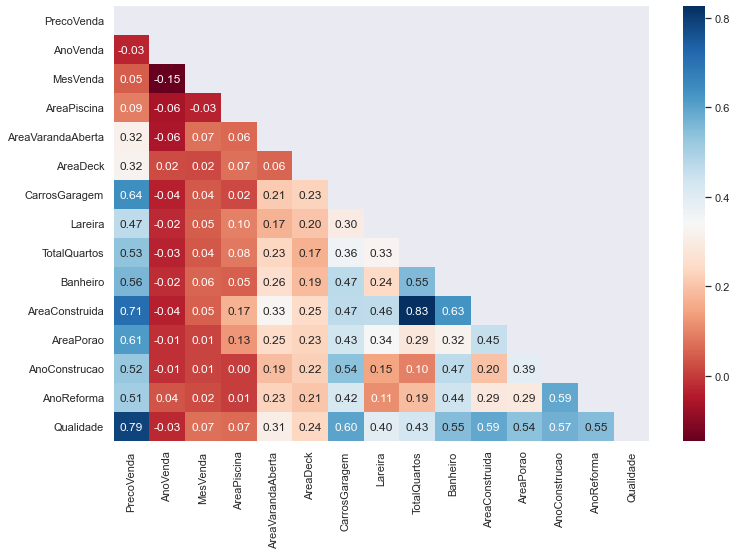

In [62]:
# Plotando a matriz de correlações usando um Heatmap para dar cor aos números

sns.set_context(font_scale=1.9)
plt.figure(figsize=(12,8))
sns.heatmap(
    dados_filtrado.corr(), #Fonte dos dados, nossa matriz de correlação
    annot=True, #Anotar os valores das correlações nas caixinhas coloridas
    fmt='.2f', # Formato float de 2 dígitos, para arredondar os números
    cmap='RdBu', # Mapa de cores do vermelho (menor) para o azul (maior)
    mask=np.triu( # Faz uma matriz triangular
        np.ones_like(dados_filtrado.corr()) # usando como base uma matriz de '1's, do mesmo tamanho que a matriz de correlação
    ) # A máscara vai então 'apagar' a diagonal superior da matriz
           )
plt.show()

Aqui percebemos que o Preço de Venda, nossa variável alvo, tem uma forte relação com as áreas envolvidas, ano de construção e de reforma, a qualidade e a quantidade de banheiros, lareiras, carros, quartos comportados na casa. Por outro lado, essas variáveis também terão relação entre si. 

Essas correlações poderão ser problemáticas no modelo de Regressão Linear a ser desenvolvido e precisão de adaptações. Algo interessante a se observar também é que ao que parece, o ano de venda e mês de venda não tem tanta relação linear com o Preço de venda, assim como a área da piscina.

                                             |                                             | [  0%]   00:00 ->…


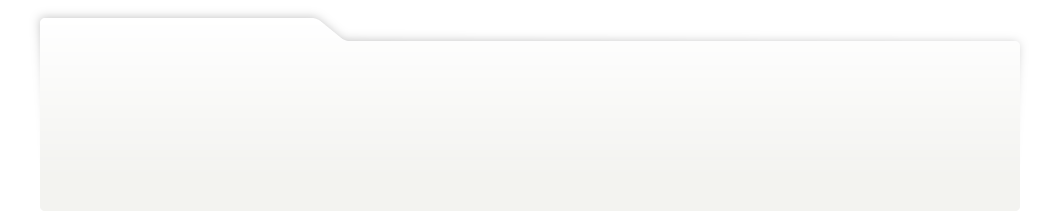
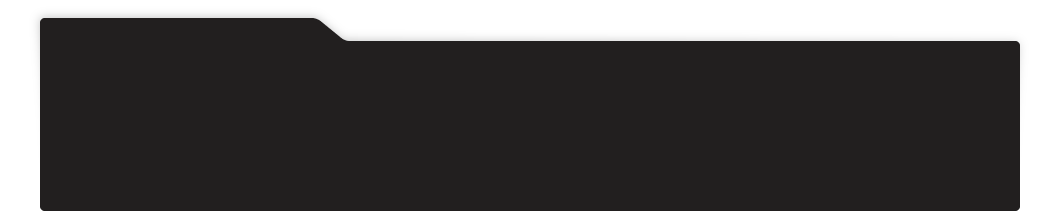
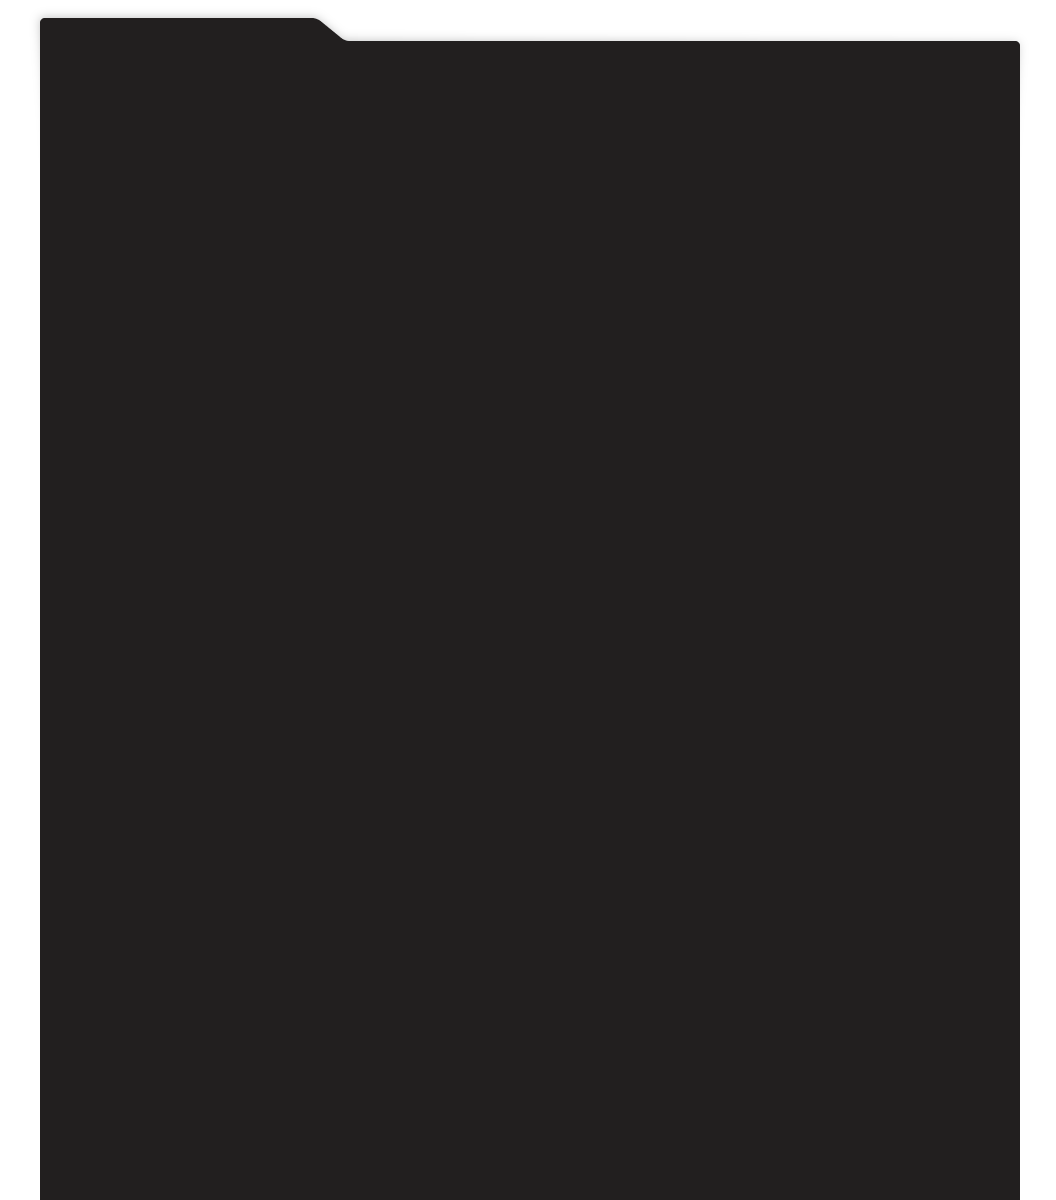
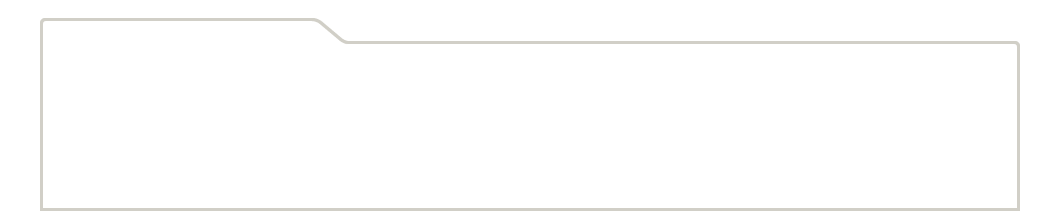
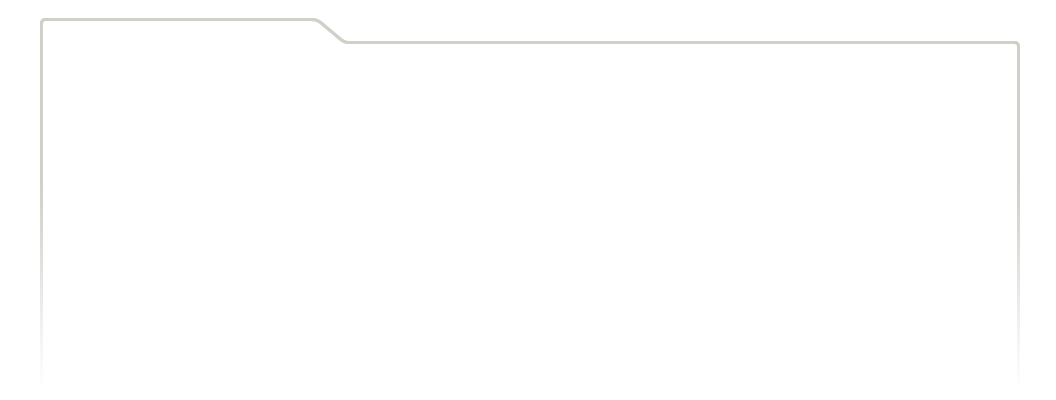
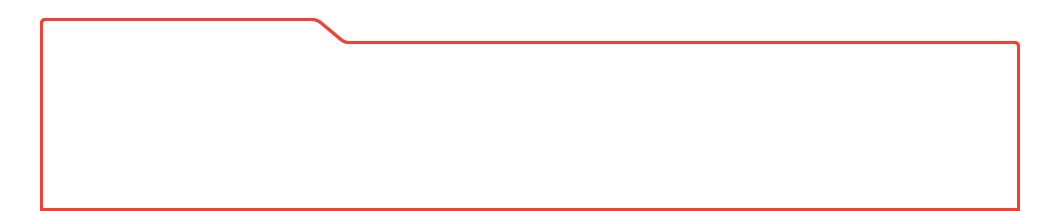
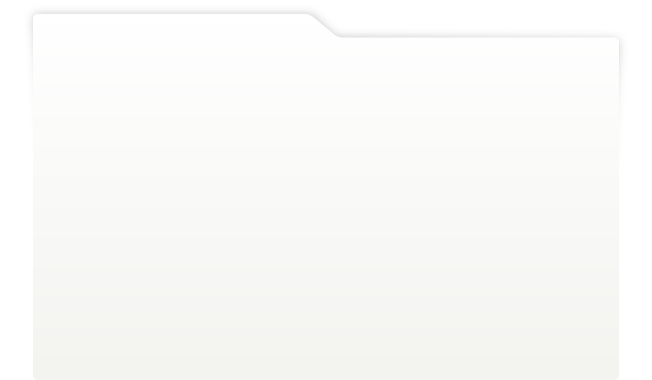
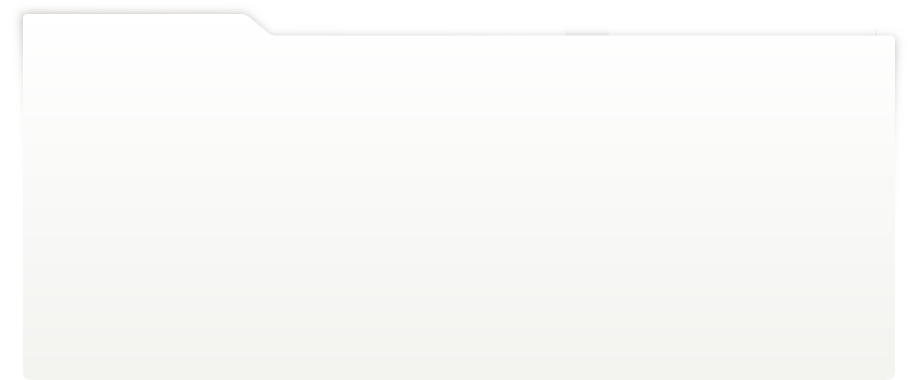
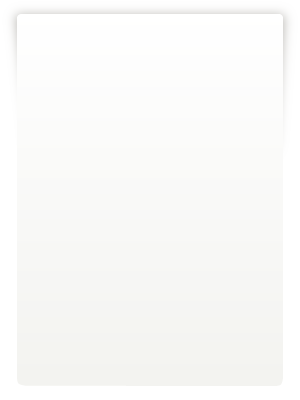
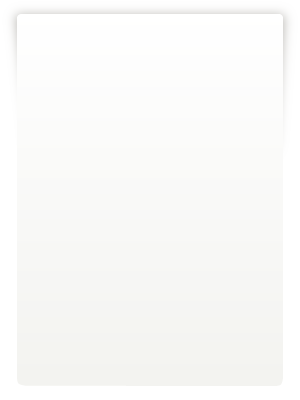
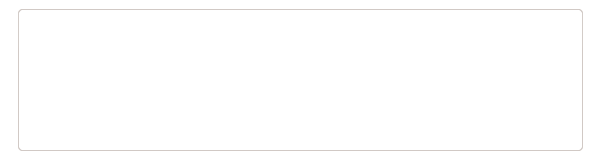
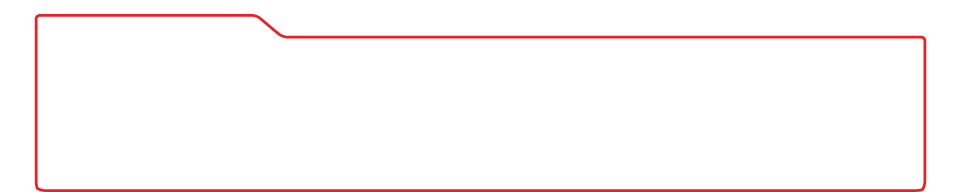
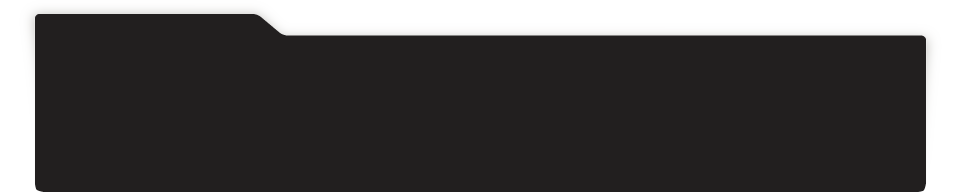
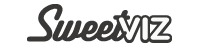
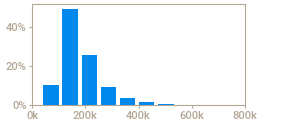
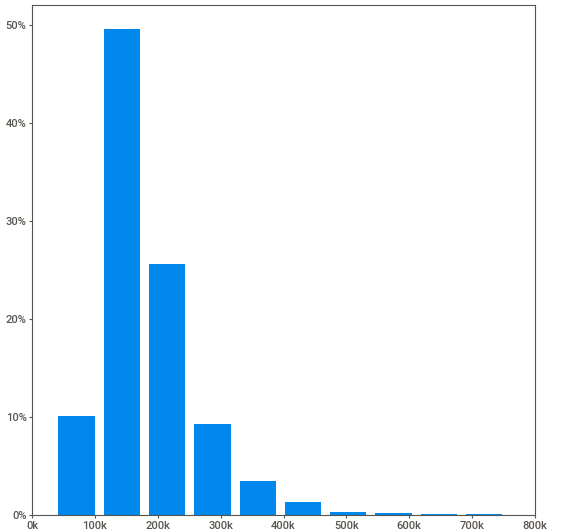
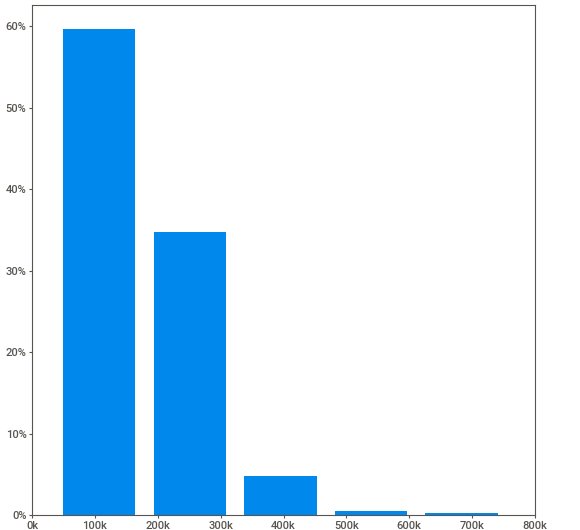
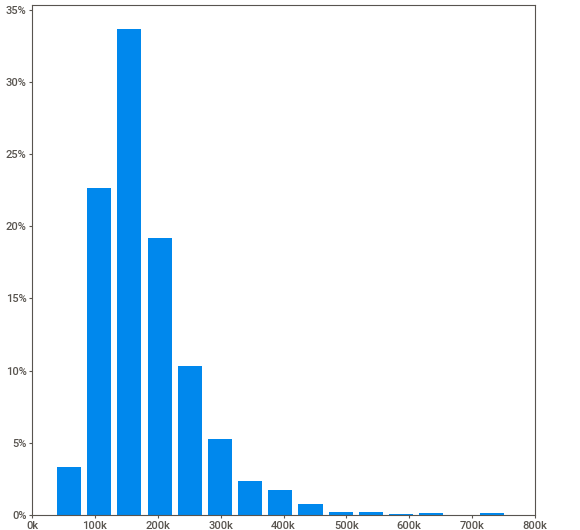
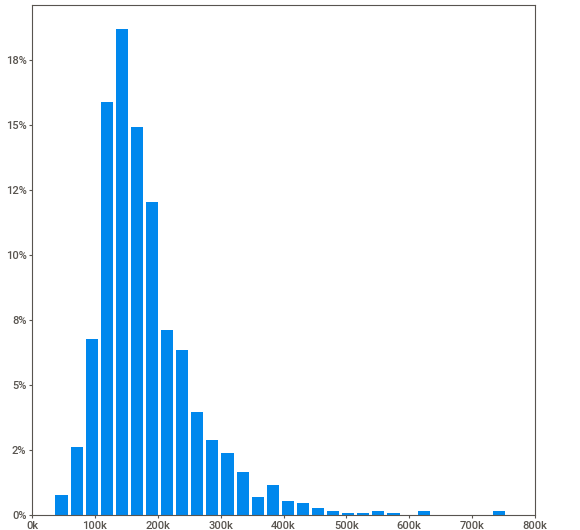
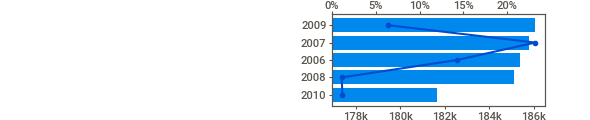
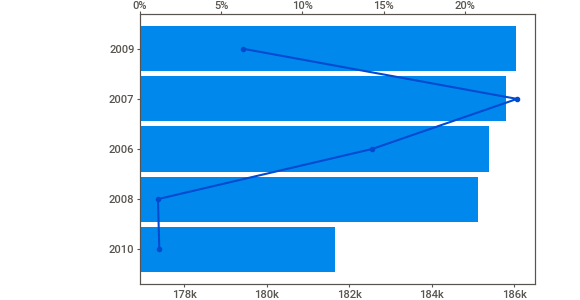
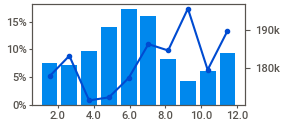
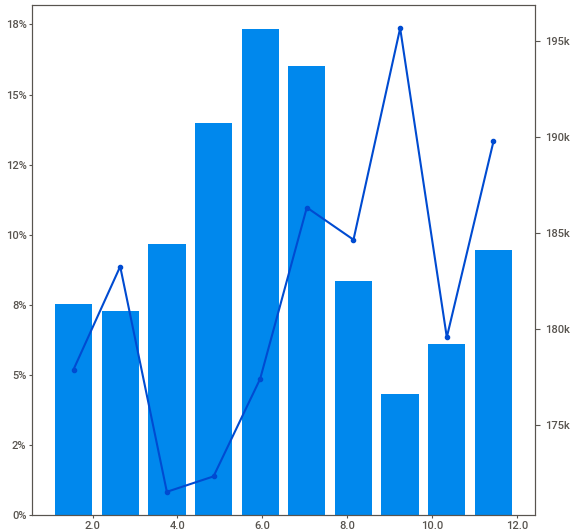
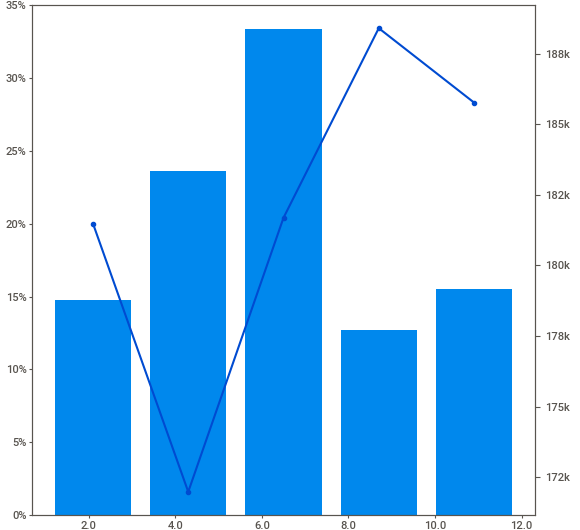
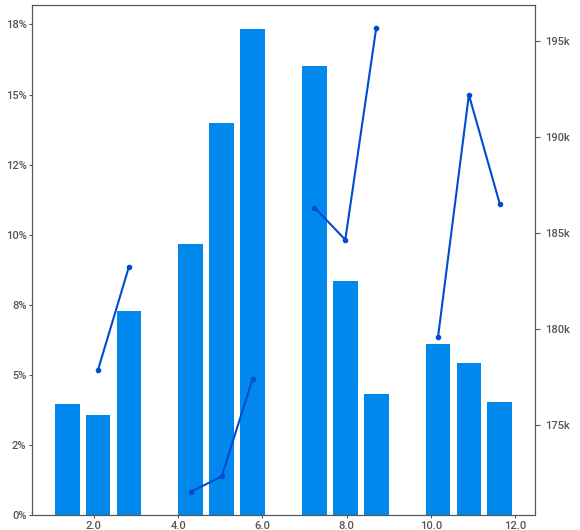
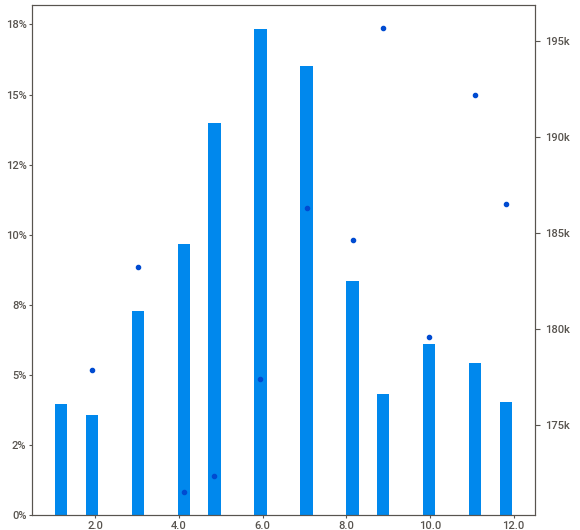
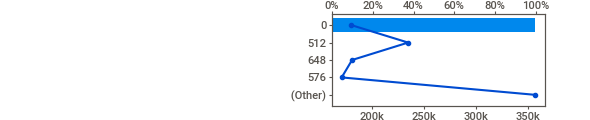
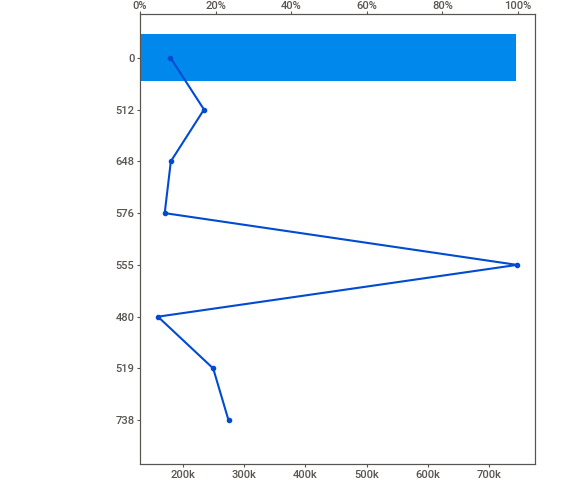
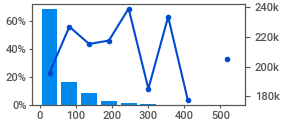
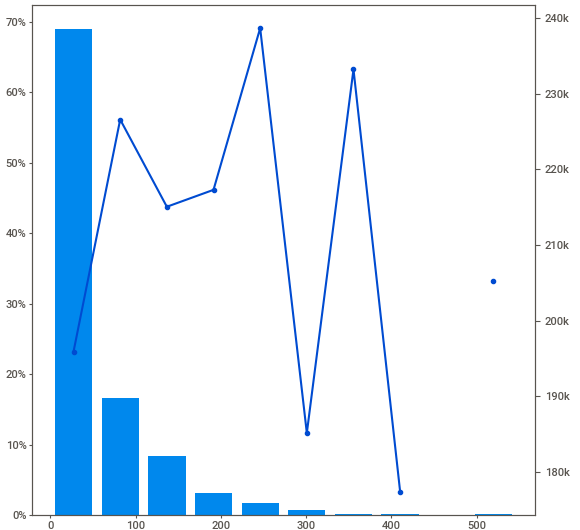
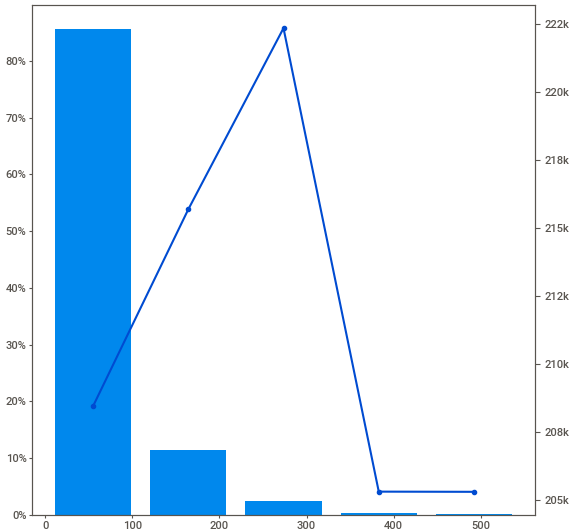
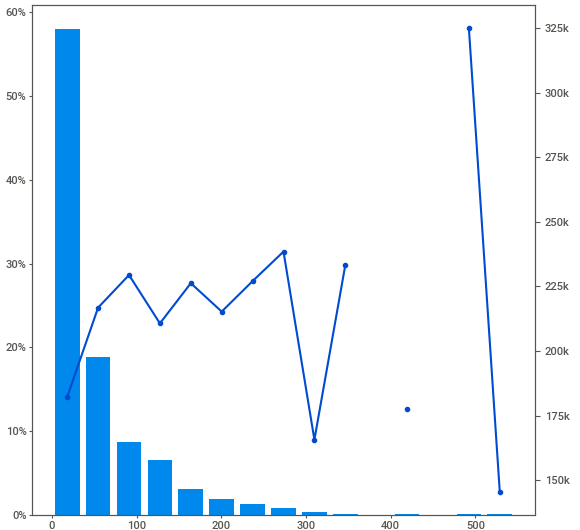
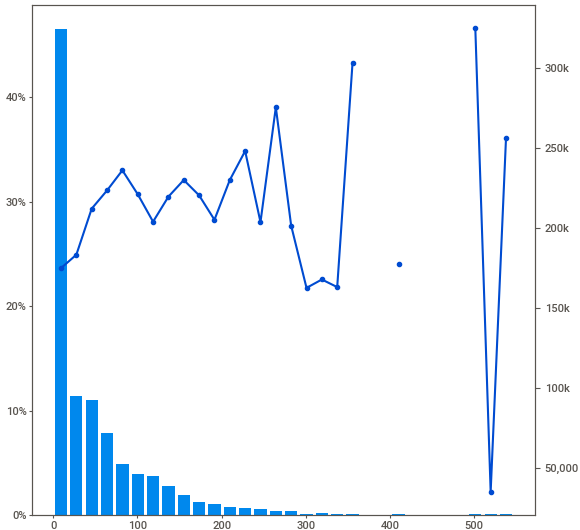
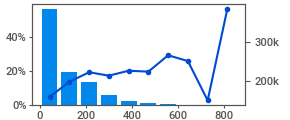
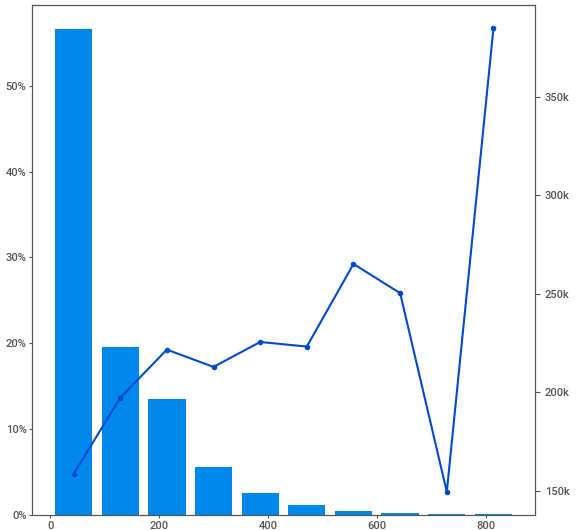
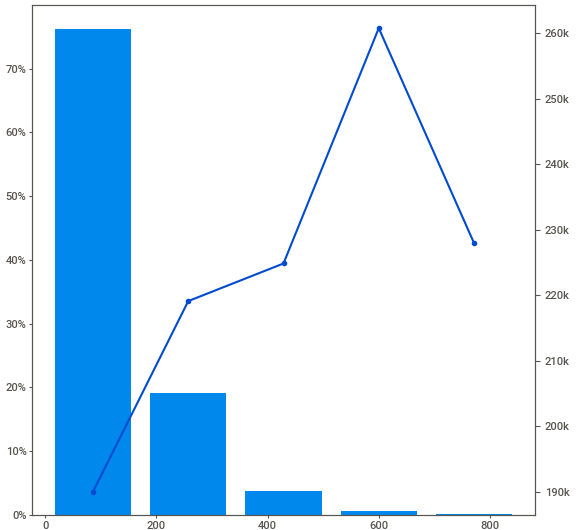
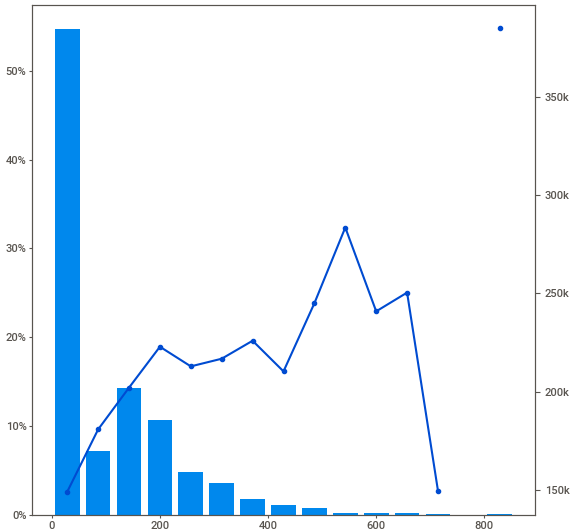
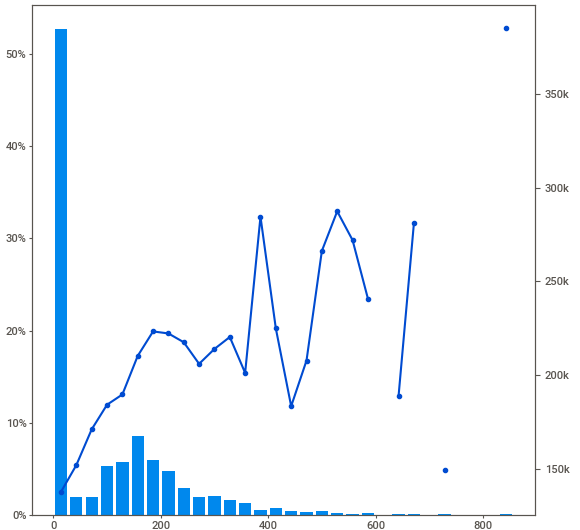
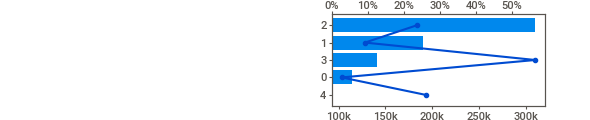
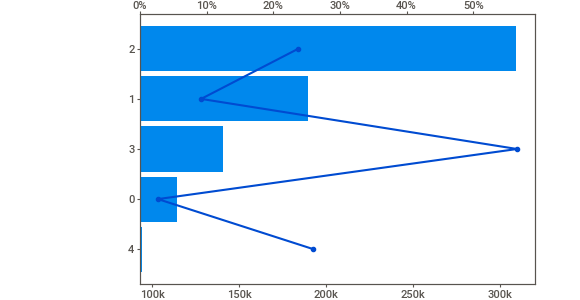
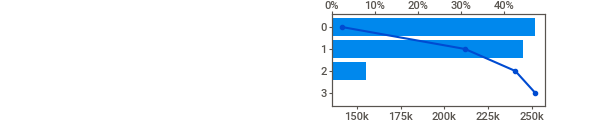
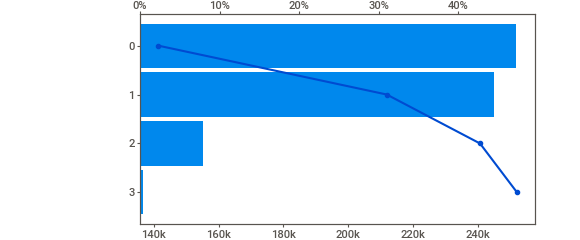
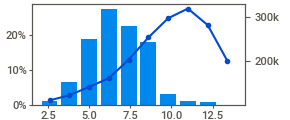
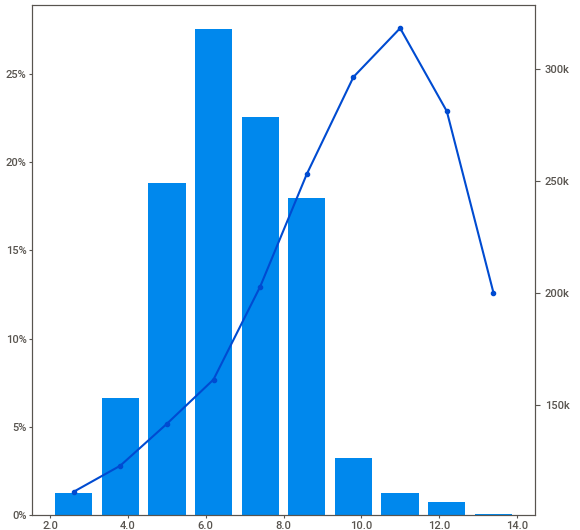
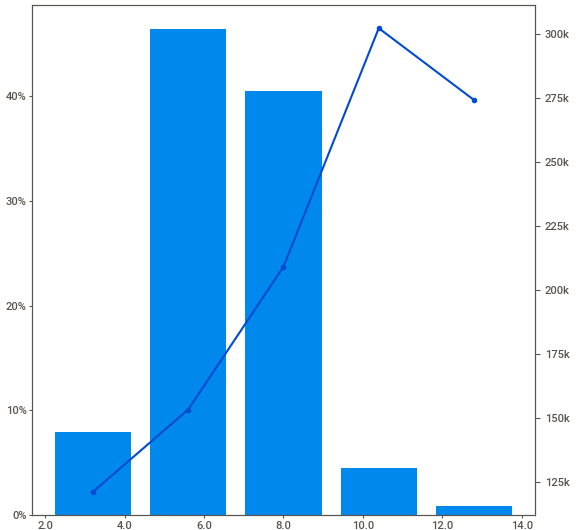
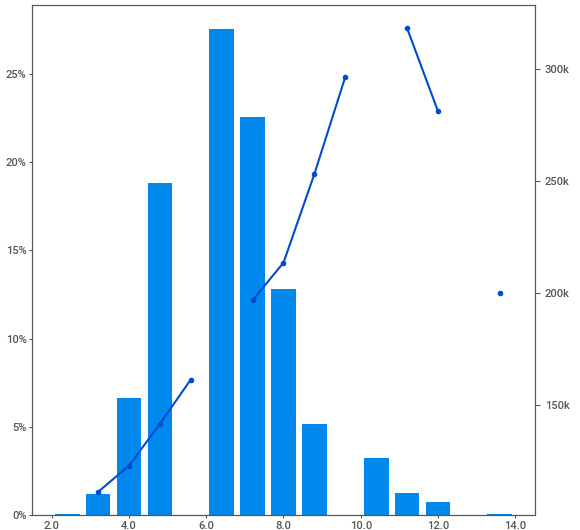
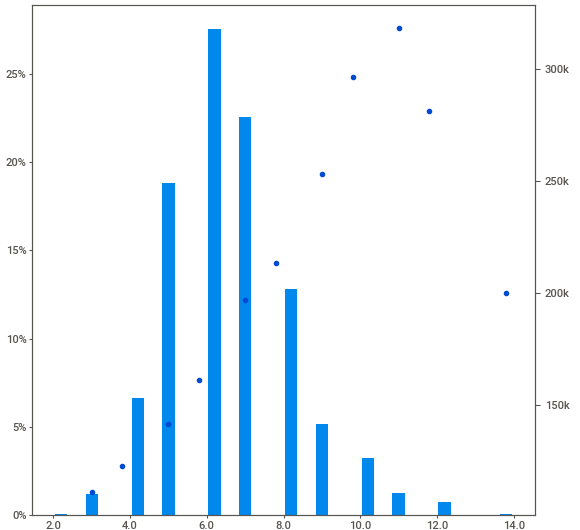
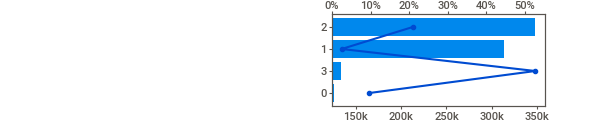
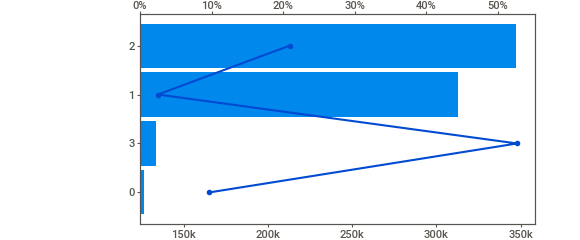
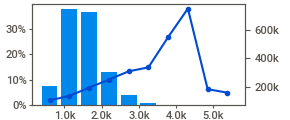
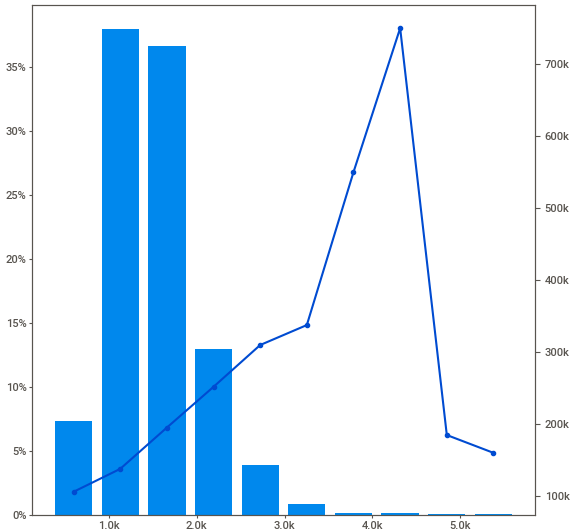
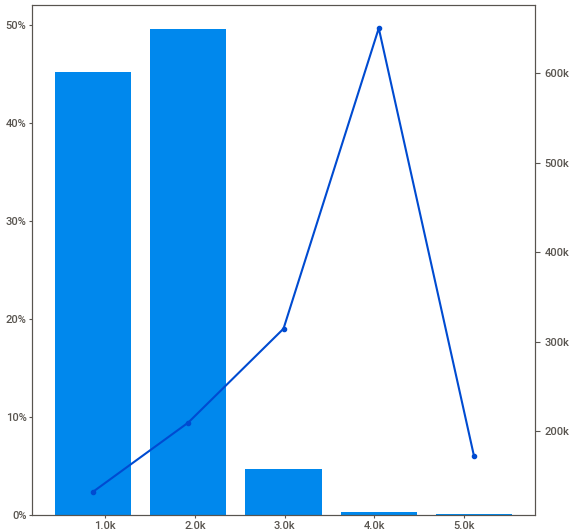
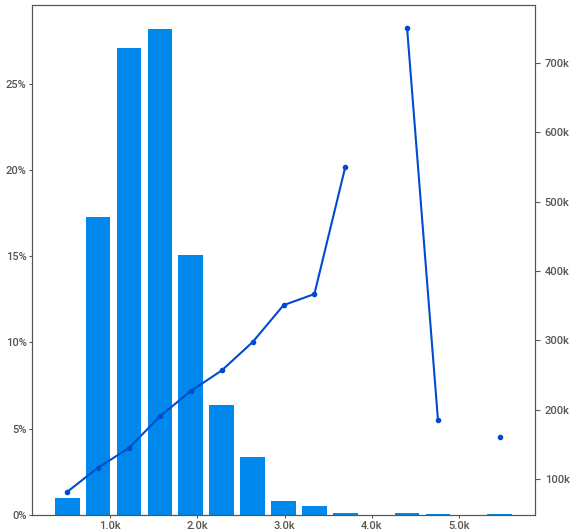
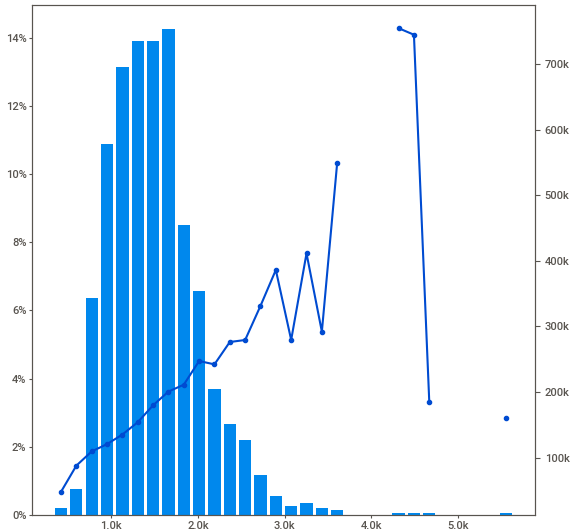
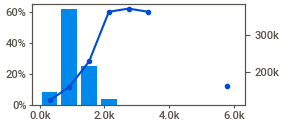
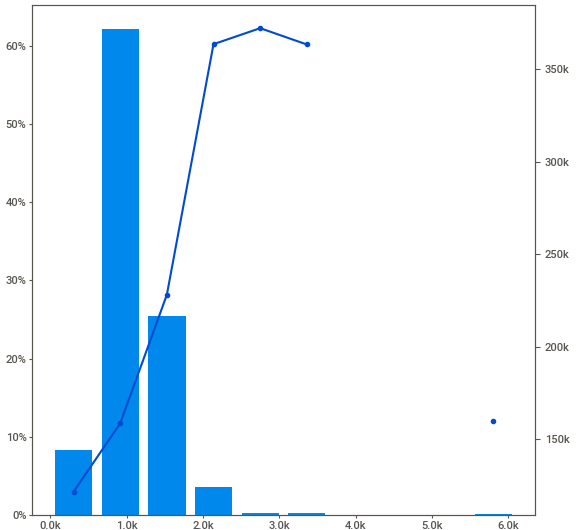
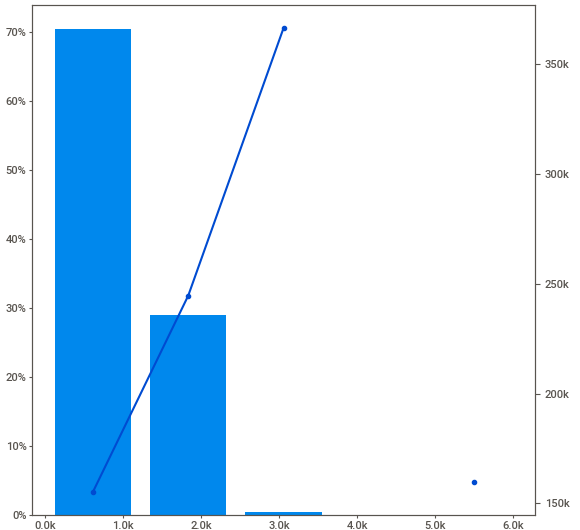
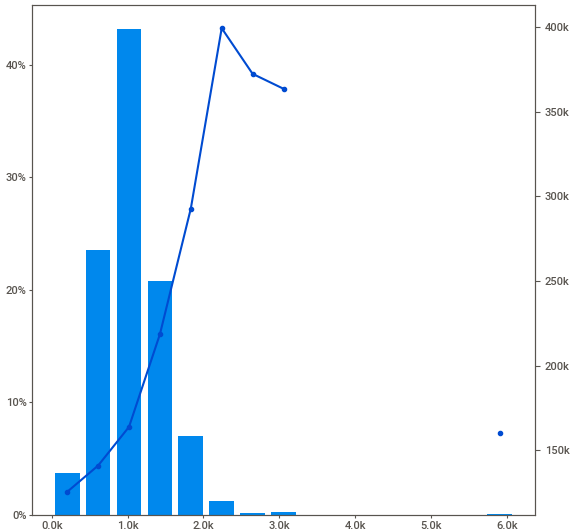
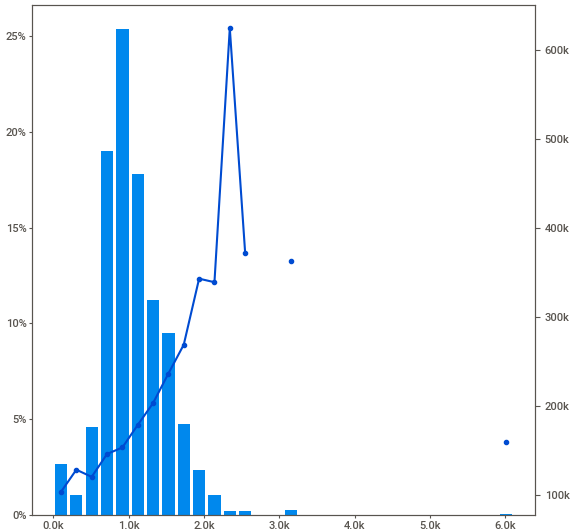
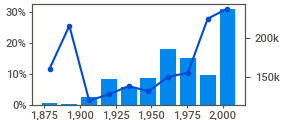
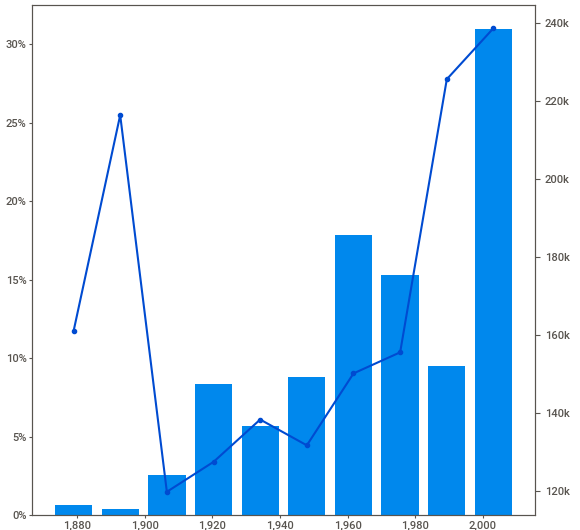
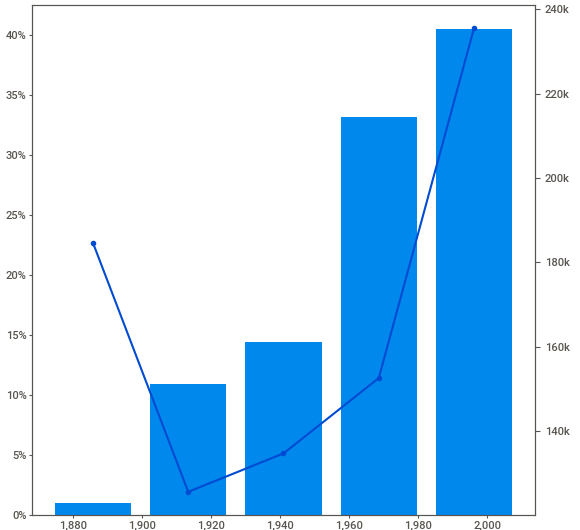
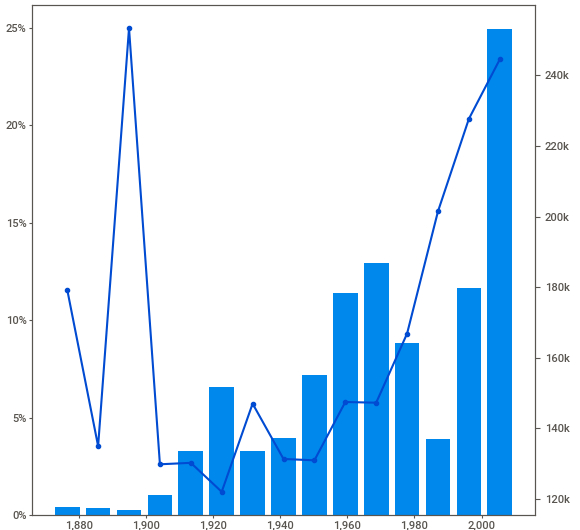
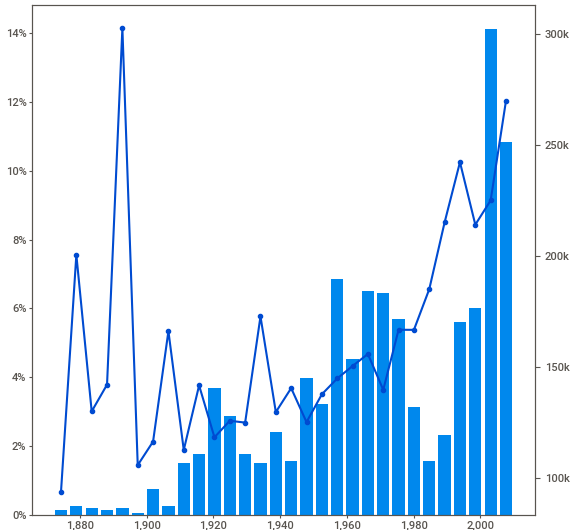
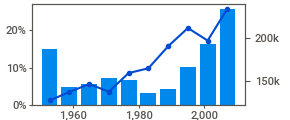
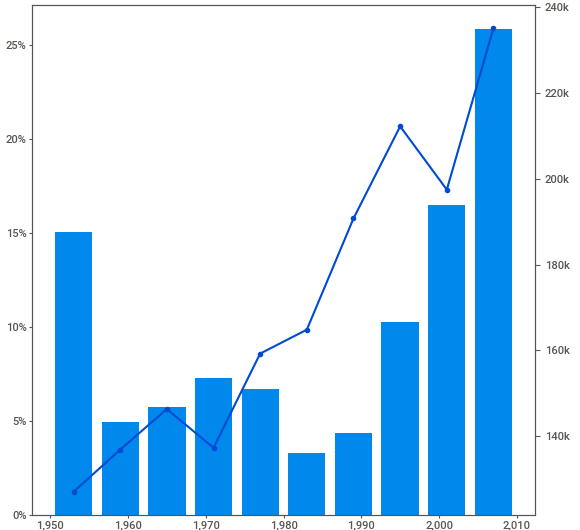
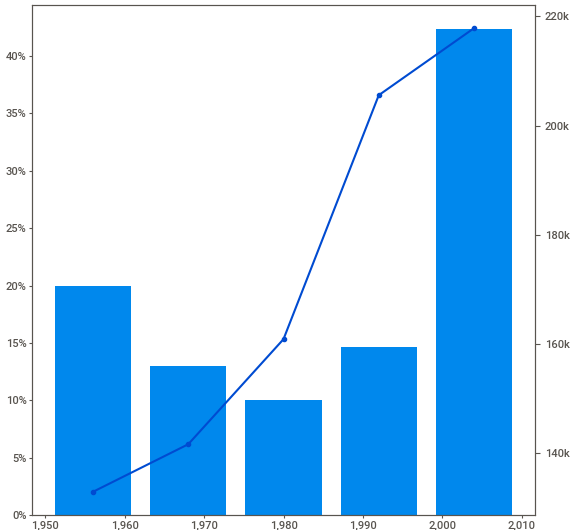
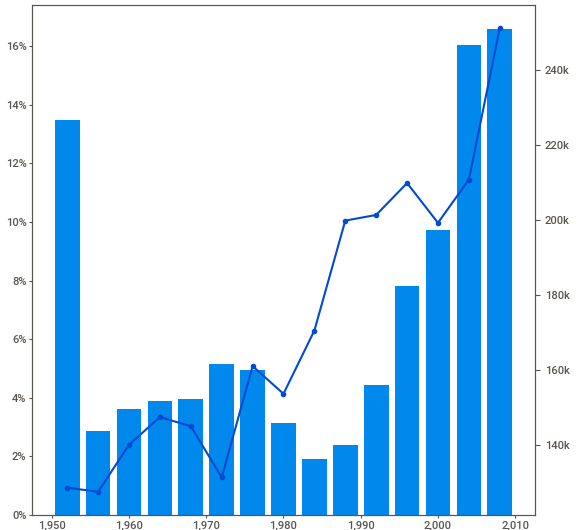
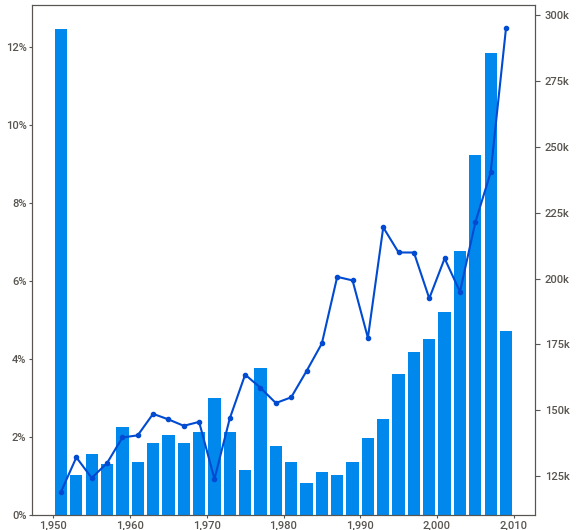
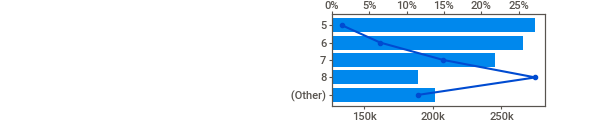
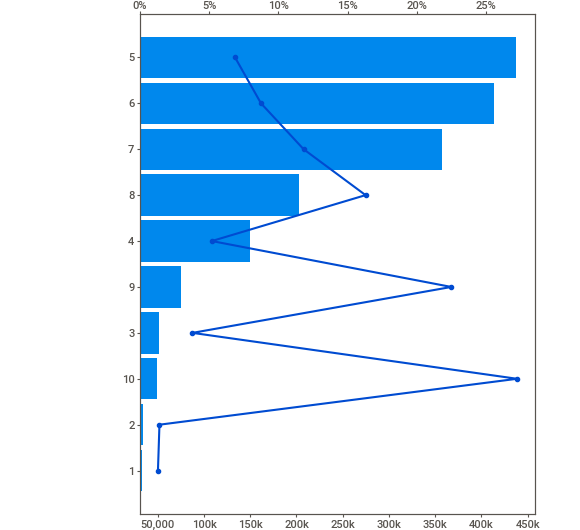
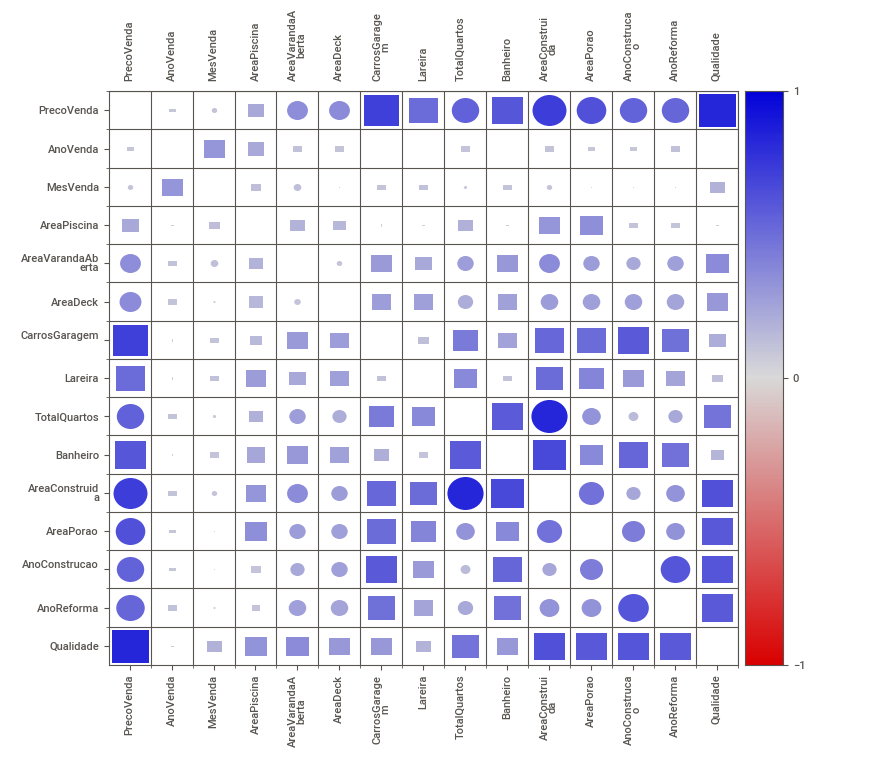
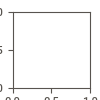

In [63]:
#Trazendo uma nova biblioteca para ajudar na EDA 

edav = sv.analyze(source = dados_filtrado, target_feat = 'PrecoVenda')
edav.show_notebook()

Com a biblioteca acima foi possível perceber mais algumas coisas:

- 2007 foi o ano que teve maior média de preço de vendas, isso nos induz a pensar que os preços das casas, em geral, são mais influencidados pelo momento econômico do país. Se associarmos isso com a crise financeira de 2008 que foi culminada pelo estouro da bolha imobiliária nos Estados Unidos, causada pelo aumento nos valores imobiliários, isso faz bastante sentido;
- 99% das casas não tem piscina. Logo, essa variável não é significativa para nos das uma informação significativa sobre o Preço da Venda das casa.
- O ano da Reforma e de construção possuem uma correlação muito forte, maior do que com a variável alvo. 

Fazendo uma análise exploratória com as outras variáveis categóricas.

In [64]:
#Observando quais colunas são categóricas

dados.select_dtypes(include = ['object']).head()

ClasseZona   Rua FormaProp PlanoProp Servicos ConfigLote InclinacaoLote   Bairro Estrada1 Estrada2 TipoHabitacao EstiloHabitacao TipoTelhado MaterialTelhado Exterior1 Exterior2 TipoAlvenaria QualidadeCobertura CondicaoExterna TipoFundacao AlturaPorao CondicaoPorao ParedePorao TipoAcabPorao1 TipoAcabPorao2 Aquecimento QualidadeAquecimento ArCentral InstalacaoEletrica QualidadeCozinha Funcionalidade LocalGaragem AcabamentoGaragem QualidadeGaragem CondicaoGaragem EntradaPavimentada TipoVenda CondicaoVenda
0         RL  Pave       Reg       Lvl   AllPub     Inside            Gtl  CollgCr     Norm     Norm          1Fam          2Story       Gable         CompShg   VinylSd   VinylSd       BrkFace                 Gd              TA        PConc          Gd            TA          No            GLQ            Unf        GasA                   Ex         Y              SBrkr               Gd            Typ       Attchd               RFn               TA              TA                  Y        WD        Normal
1         RL  Pave       Reg       Lvl   AllPub        FR2            Gtl  Veenker    Feedr     Norm          1Fam          1Story       Gable         CompShg   MetalSd   MetalSd          None                 TA              TA       CBlock          Gd            TA          Gd            ALQ            Unf        GasA                   Ex         Y              SBrkr               TA            Typ       Attchd               RFn               TA              TA                  Y        WD        Normal
2         RL  Pave       IR1       Lvl   AllPub     Inside            Gtl  CollgCr     Norm     Norm          1Fam          2Story       Gable         CompShg   VinylSd   VinylSd       BrkFace                 Gd              TA        PConc          Gd            TA          Mn            GLQ            Unf        GasA                   Ex         Y              SBrkr               Gd            Typ       Attchd               RFn               TA              TA                  Y        WD        Normal
3         RL  Pave       IR1       Lvl   AllPub     Corner            Gtl  Crawfor     Norm     Norm          1Fam          2Story       Gable         CompShg   Wd Sdng   Wd Shng          None                 TA              TA       BrkTil          TA            Gd          No            ALQ            Unf        GasA                   Gd         Y              SBrkr               Gd            Typ       Detchd               Unf               TA              TA                  Y        WD       Abnorml
4         RL  Pave       IR1       Lvl   AllPub        FR2            Gtl  NoRidge     Norm     Norm          1Fam          2Story       Gable         CompShg   VinylSd   VinylSd       BrkFace                 Gd              TA        PConc          Gd            TA          Av            GLQ            Unf        GasA                   Ex         Y              SBrkr               Gd            Typ       Attchd               RFn               TA              TA                  Y        WD        Normal

In [65]:
dados.select_dtypes(include = ['object']).columns

Index(['ClasseZona', 'Rua', 'FormaProp', 'PlanoProp', 'Servicos', 'ConfigLote', 'InclinacaoLote', 'Bairro', 'Estrada1', 'Estrada2', 'TipoHabitacao', 'EstiloHabitacao', 'TipoTelhado', 'MaterialTelhado', 'Exterior1', 'Exterior2', 'TipoAlvenaria', 'QualidadeCobertura', 'CondicaoExterna', 'TipoFundacao', 'AlturaPorao', 'CondicaoPorao', 'ParedePorao', 'TipoAcabPorao1', 'TipoAcabPorao2', 'Aquecimento', 'QualidadeAquecimento', 'ArCentral', 'InstalacaoEletrica', 'QualidadeCozinha', 'Funcionalidade', 'LocalGaragem', 'AcabamentoGaragem', 'QualidadeGaragem', 'CondicaoGaragem', 'EntradaPavimentada', 'TipoVenda', 'CondicaoVenda'], dtype='object')

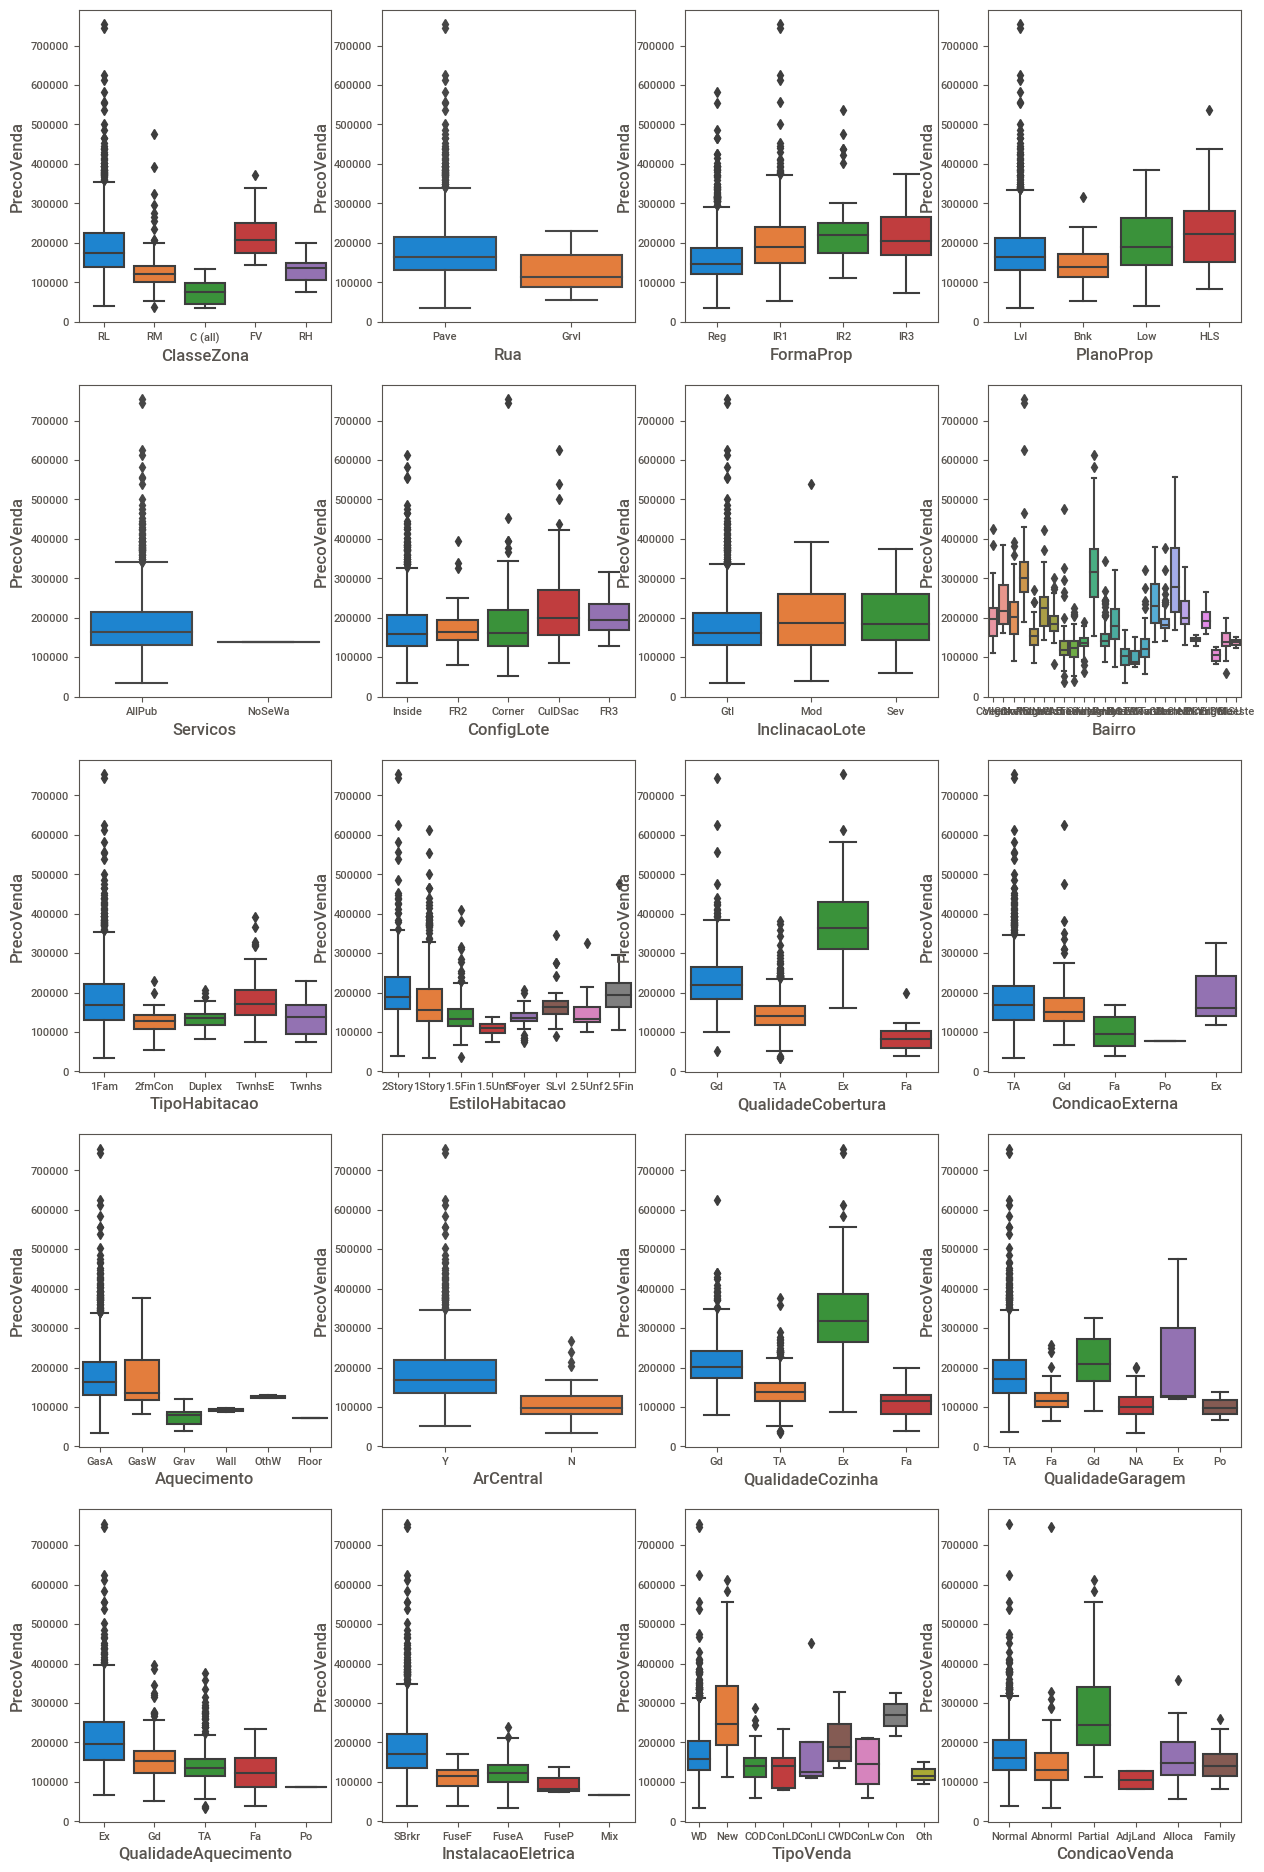

In [66]:
#Analisando as variáveis categóricas em um boxplot com a variável alvo

# Listando e selecionando as colunas categóricas
colunas_categoricas = [['ClasseZona', 'Rua', 'FormaProp', 'PlanoProp'],
                    ['Servicos', 'ConfigLote', 'InclinacaoLote', 'Bairro'],
                    ['TipoHabitacao', 'EstiloHabitacao','QualidadeCobertura','CondicaoExterna'],
                    ['Aquecimento','ArCentral','QualidadeCozinha','QualidadeGaragem'],
                    ['QualidadeAquecimento','InstalacaoEletrica','TipoVenda', 'CondicaoVenda'] 
                    ]


fig, eixo = plt.subplots(5,4,figsize=(15,24)) # Criando uma figura e 12 eixos, em uma matriz de 5 linhas x 4 colunas
# Para cada linha 
for linha in range(5):
    # Para cada coluna
    for coluna in range(4):
        # Verifica se existe um nome de coluna na lista 'colunas_categoricas'
        if colunas_categoricas[linha][coluna] != '':
            # Se sim faz o plot do Boxplot naquela linha e coluna, indicando no eixo vertical/y sempre a variável 'aprovado'
            sns.boxplot(data= dados,x= colunas_categoricas[linha][coluna],y='PrecoVenda',ax=eixo[linha][coluna],orient='v')

Apesar do gráfico pequeno, pode-se perceber algumas possíveis influências das variáveis categóricas.

<br>
<ul>
<li><b>Classe Zona:</b>
    Tem uma influência aparentemente significativa no preço de venda em que as casas classificadas como "FV" (Vila de flutuação Residencial) e "Residencial Baixa densidade" são mais caras. Por outro lado, as residências classificadas em zonas "C" (Comercial) são mais baratas.
<li><b>Rua:</b>
    As ruas com acesso do tipo "Pave" (pavimentadas) são mais caras que as com "Grvl" (cascalho).
<li><b>FormaProp:</b>
    As casas com formato "Reg" (regular) aparentem ser mais baratas, embora ter um formato mais irregular em diferentes níveis pode não influenciar tanto no preço.
<li><b>PlanoProp:</b>
    Quando o plano é "Bnk" (Aumento significativo e abrupto do nível da rua para construção), a residência parece ficar mais barata.
<li><b>ConfigLote e InclinacaoLote:</b>
    A configuração do lote e a inclinação do lote pareceram não terem muita influência nos preços de venda.
<li><b>Bairros:</b>
    Apesar da dificuldade de visualização pela quantidade de número de bairros, é perceptível que a depender do bairro as cadas tem uma faixa de preço.
<li><b>QualidadeCobertura:</b>
    Mostra que influencia bastante no preço de venda, no sentido de quanto melhor a qualidade da cobertura externa maior é o preço de venda.
<li><b>CondicaoExterna;</b>
    A condição externa aparenta ter uma certa influência também, mas menor do que a qualidade da cobertura.
<li><b>Aquecimento e QualidadeAquecimento:</b>
    Os aquecimentos do tipo a gás (GasA e GasW) parecem valorizar o imóvel e a qualidade do aquecimento também, sendo excelente o maior valorizado.
<li><b>Ar central:</b>
    Ter ou não ar central na residência parece influenciar bastante o preço, sendo mais caro ter o ar central.
<li><b>Qualidade cozinha:</b>
    Apresenta uma influência parecida com a qualidade da cobertura, apesar de ter uma variabilidade maior nos dados. 
<li><b>Qualidade garagem:</b>
    A qualidade da garagem não parece influenciar tanto no preço quanto da cozinha ou cobertura, mas algo a ser observado é que uma residência com garagem com qualidade ruim aparenta ter o mesmo patamar de preço que uma casa sem garagem.
<li><b>Instalacaoeletrica:</b>
    O padrão SBrkr parece ser o mais valorizado "Disjuntores padrão & Romex*", enquanto os outros ao diminuir a qualidade Romex decresce o preço.
<li><b>TipoVenda:</b>
    Os contratos que geram preços de venda aparentemente mais caros são os "New" (Casa construída e vendida) e "Con"(Contrato de 15% de entrada e parcelas regulares).
<li><b>CondicaoVenda:</b>
    A condição de venda que sobre mais o preço do imóvel, aparentemente, é a "Partial" (Imóvel não foi estava completo na última avaliação (associado com casas novas)).
</ul>

<h2>Transformando variáveis</h2>

<HR>

Como nosso objetivo é construir um modelo de regressão linear e realizar outras predições, é necessário transformar as variáveis categóricas em numéricas de forma que elas sejam interpretadas pelo modelo que escolhermos.

Como estratégia, vamos utilizar a técnica <b>Ordinal encoding</b> nas variáveis.

In [67]:
!pip install category_encoders

In [68]:
import category_encoders as ce

In [69]:
#Começando pelas variáveis que representam qualidade
dados20 = dados
colunas_qualidade = ['QualidadeCobertura','CondicaoExterna','QualidadeCozinha','QualidadeGaragem','QualidadeAquecimento']

#Dicionário a ser utilizado em OrdinalEncoder

dictionary = [{'col':'QualidadeCobertura', 'mapping':{'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}},
             {'col':'CondicaoExterna', 'mapping':{'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}},
             {'col':'QualidadeCozinha', 'mapping':{'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}},
             {'col':'QualidadeGaragem', 'mapping':{'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}},
             {'col':'QualidadeAquecimento', 'mapping':{'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}}]


In [70]:
encoder = ce.OrdinalEncoder(cols= colunas_qualidade, mapping=dictionary)

In [71]:
dados_encoder = encoder.fit_transform(dados)

In [72]:
dados_encoder[['QualidadeCobertura','CondicaoExterna','QualidadeCozinha','QualidadeGaragem','QualidadeAquecimento']].agg(['value_counts'])

QualidadeCobertura CondicaoExterna QualidadeCozinha QualidadeGaragem QualidadeAquecimento
        value_counts    value_counts     value_counts     value_counts         value_counts
3              906.0          1282.0            735.0             1311                428.0
0                NaN             NaN              NaN               81                  NaN
2               14.0            28.0             39.0               48                 49.0
4              488.0           146.0            586.0               14                241.0
5               52.0             3.0            100.0                3                741.0
1                NaN             1.0              NaN                3                  1.0

Classes de qualidade transformadas! Agora podemos transformas as features ClasseZona, Rua, Bairro e ArCentral.

In [73]:
#Transformando a classe zona 

dictionary = [{'col':'ClasseZona', 'mapping':{'FV':5, 'RL':4, 'RM':3, 'RH':2, 'C (all)':1}}]

In [74]:
encoder = ce.OrdinalEncoder(cols= 'ClasseZona', mapping=dictionary)
dados_encoder = encoder.fit_transform(dados_encoder)

In [75]:
dados_encoder['ClasseZona'].value_counts()

4    1151
3     218
5      65
2      16
1      10
Name: ClasseZona, dtype: int64

In [76]:
#Transformando a classe rua

dictionary = [{'col':'Rua', 'mapping':{'Grvl':1, 'Pave':2}}]
encoder = ce.OrdinalEncoder(cols= 'Rua', mapping=dictionary)
dados_encoder = encoder.fit_transform(dados_encoder)
dados_encoder['Rua'].value_counts()

2    1454
1       6
Name: Rua, dtype: int64

In [77]:
#Transformando a variável Arcentral

dictionary = [{'col':'ArCentral', 'mapping':{'Y':1, 'N':0}}]
encoder = ce.OrdinalEncoder(cols= 'ArCentral', mapping=dictionary)
dados_encoder = encoder.fit_transform(dados_encoder)
dados_encoder['ArCentral'].value_counts()

1    1365
0      95
Name: ArCentral, dtype: int64

In [78]:
#Transformando a variável "AlturaPorao"
#Vamos transformar ela em valor numérico para depois criar uma feature nova "VolumePorao"
#A altura será uma média e estará em pés. Para o valor Excelente adotaremos a altura de 110-9,17 ft e Po (ruim) de 68 polegadas-5,67 ft.

#Vamos usar a função replace

dados_encoder['AlturaPorao'].replace({'Ex':9.170, 'Gd':7.875, 'TA':7.042, 'Fa':6.208, 'Po':5.670, 'NA':0.000}, inplace=True)

dados_encoder['AlturaPorao'].value_counts()

7.042    649
7.875    618
9.170    121
0.000     37
6.208     35
Name: AlturaPorao, dtype: int64

Agora que essas features são numéricas, vamos ver um mapa de calor sobre elas!

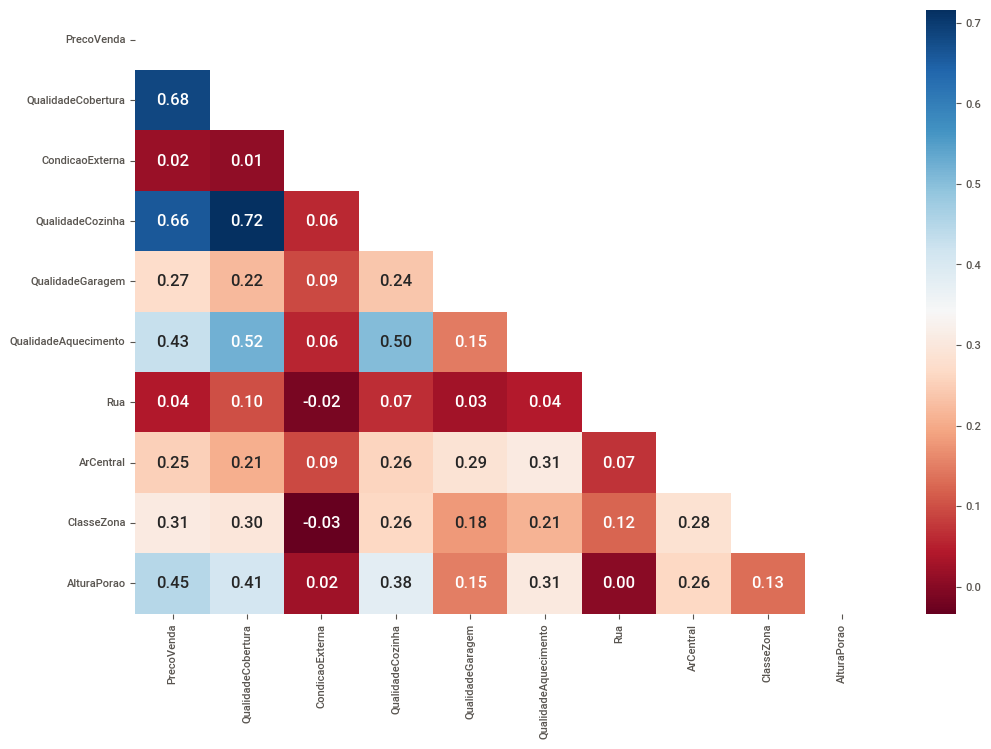

In [79]:
colunas5= ['PrecoVenda','QualidadeCobertura','CondicaoExterna','QualidadeCozinha','QualidadeGaragem','QualidadeAquecimento','Rua', 'ArCentral','ClasseZona','AlturaPorao']

dados_filtrado5 = dados_encoder[colunas5]

sns.set_context(font_scale=1.9)
plt.figure(figsize=(12,8))
sns.heatmap(
    dados_filtrado5.corr(), #Fonte dos dados, nossa matriz de correlação
    annot=True, #Anotar os valores das correlações nas caixinhas coloridas
    fmt='.2f', # Formato float de 2 dígitos, para arredondar os números
    cmap='RdBu', # Mapa de cores do vermelho (menor) para o azul (maior)
    mask=np.triu( # Faz uma matriz triangular
        np.ones_like(dados_filtrado5.corr()) # usando como base uma matriz de '1's, do mesmo tamanho que a matriz de correlação
    ) # A máscara vai então 'apagar' a diagonal superior da matriz
           )
plt.show()

                                             |                                             | [  0%]   00:00 ->…


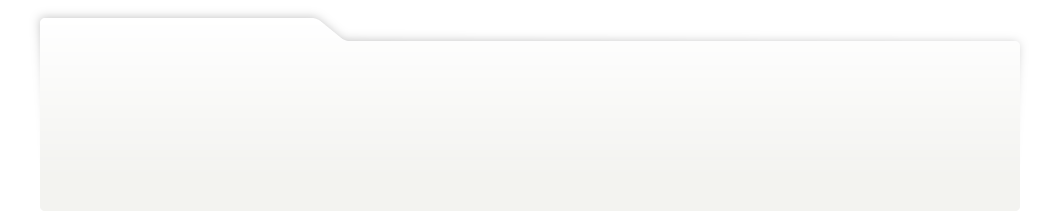
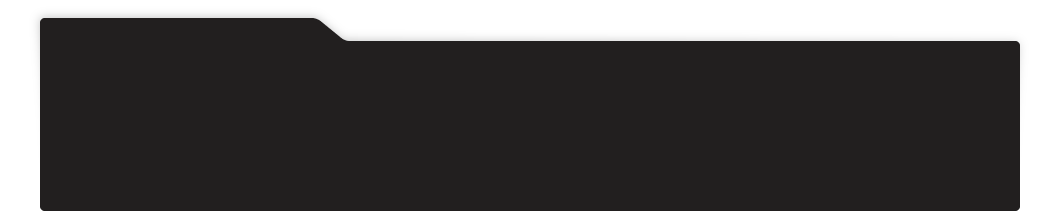
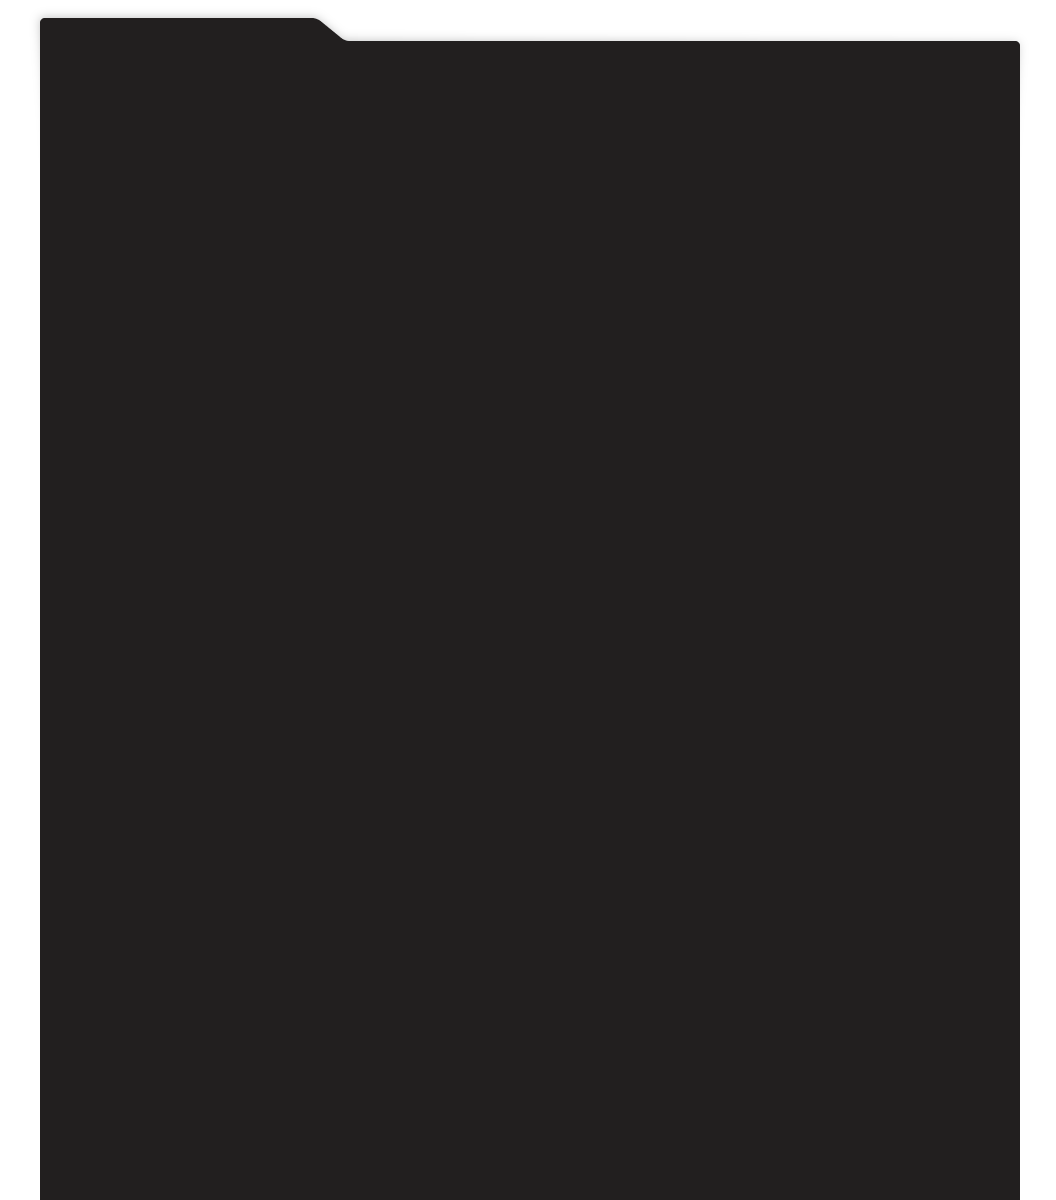
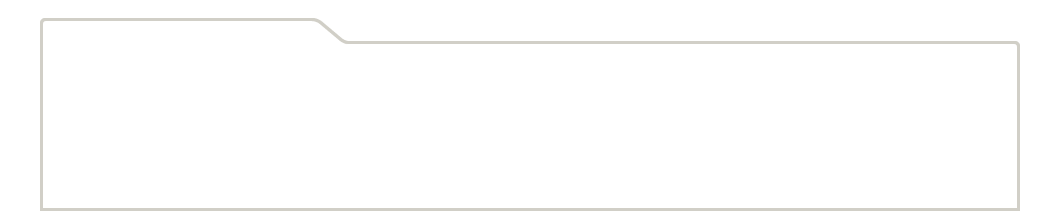
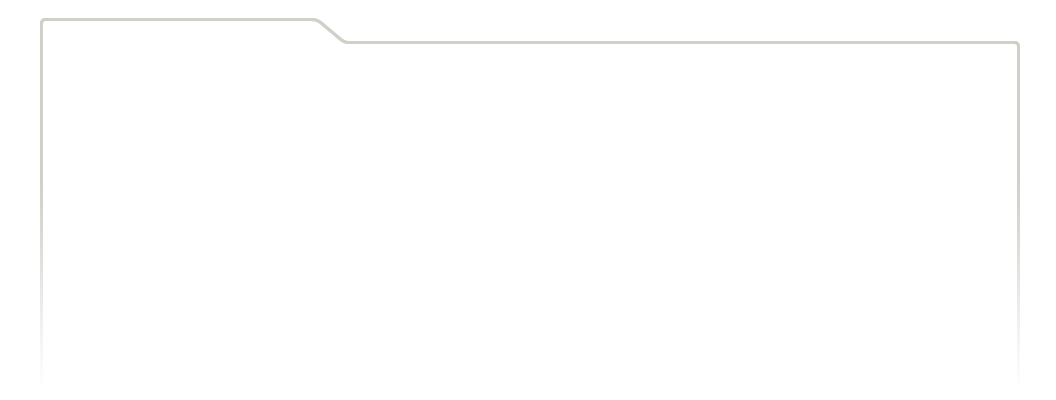
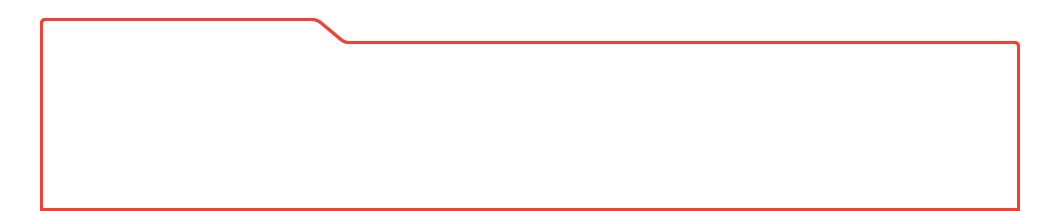
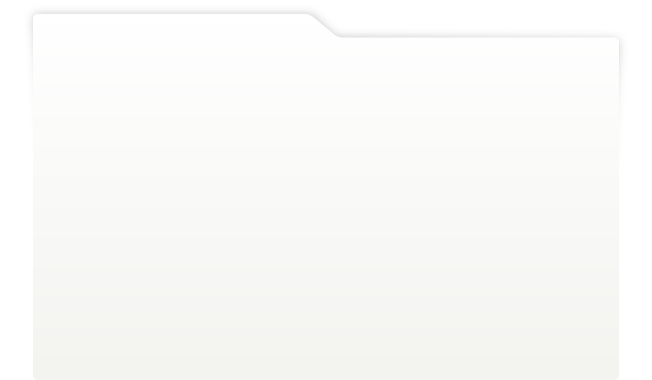
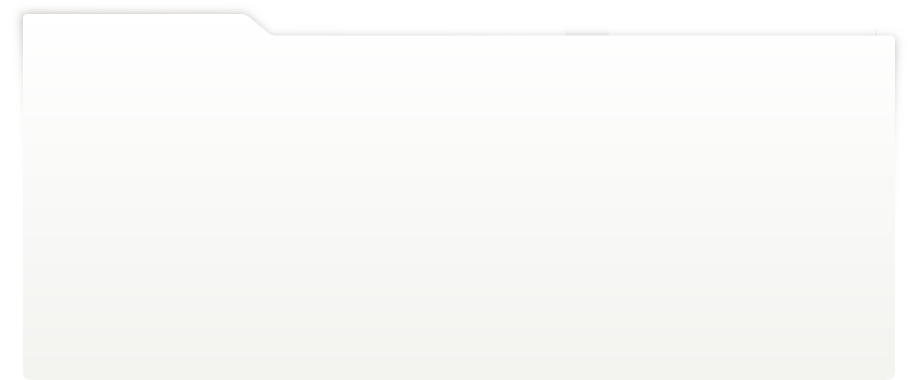
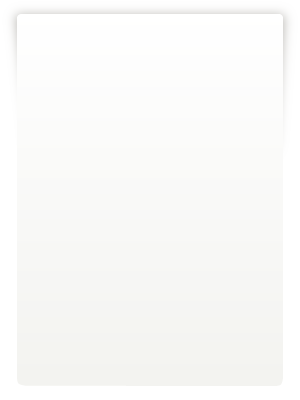
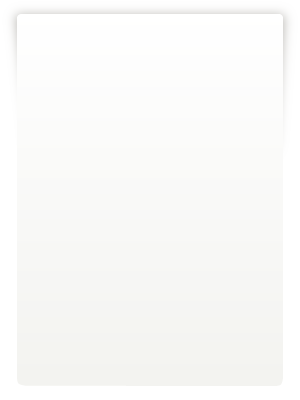
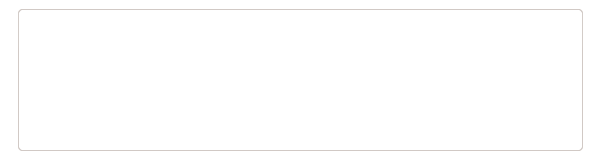
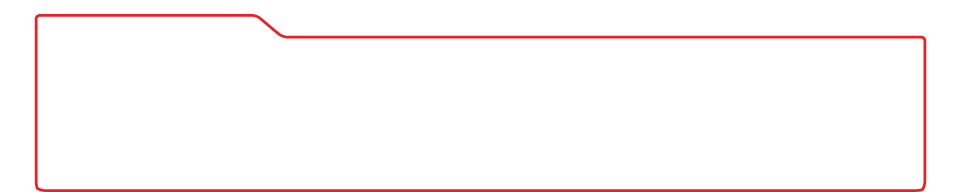
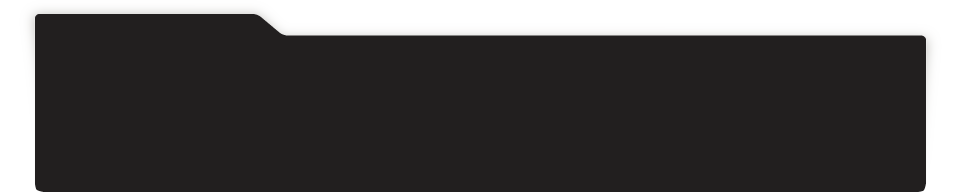
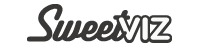
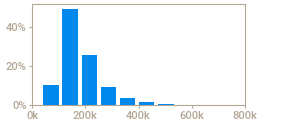
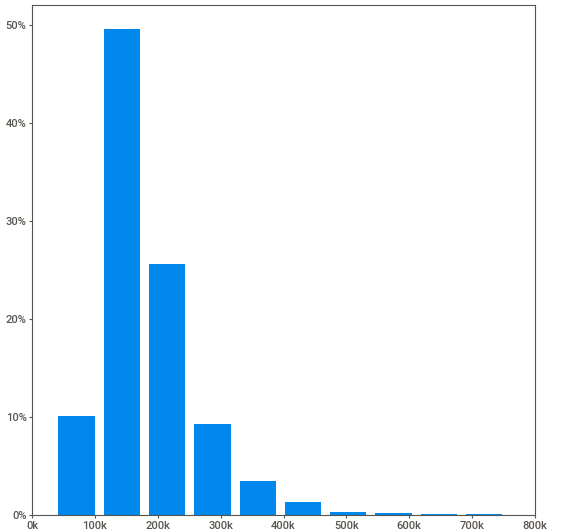
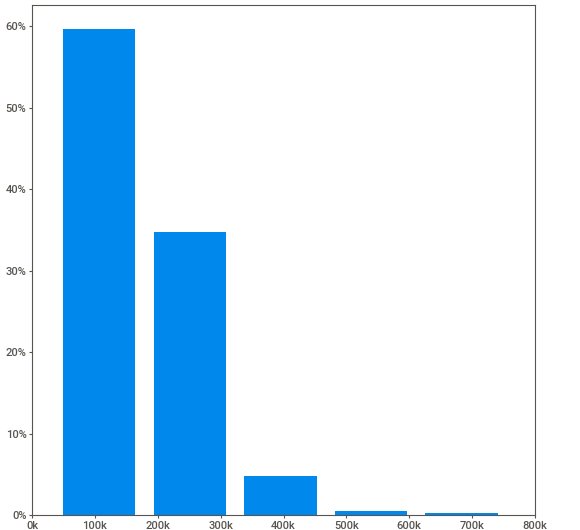
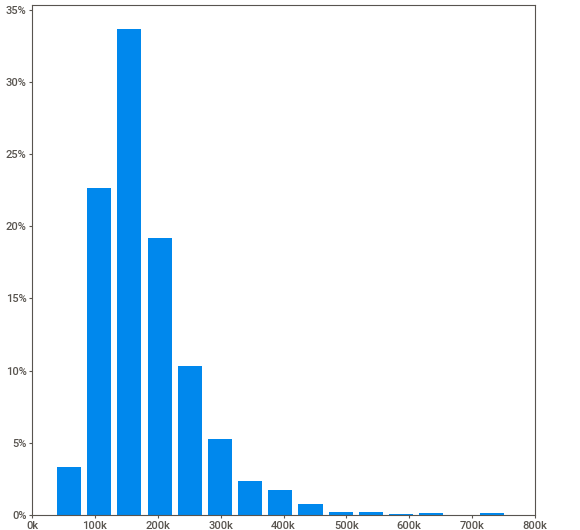
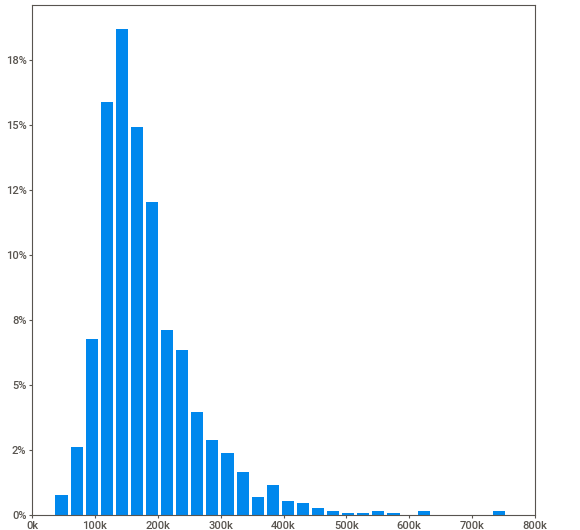
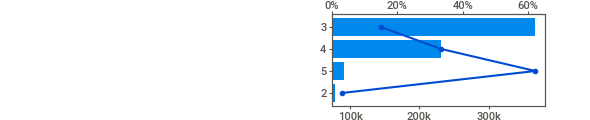
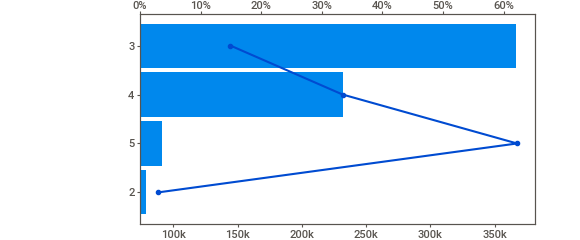
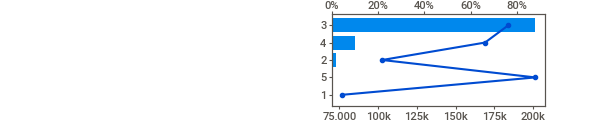
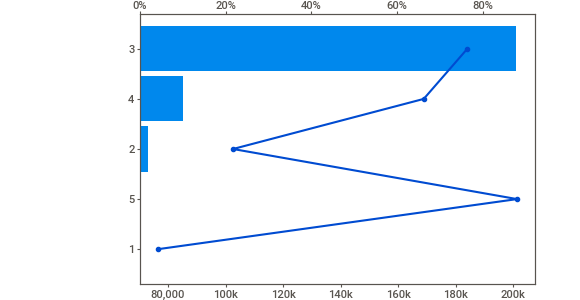
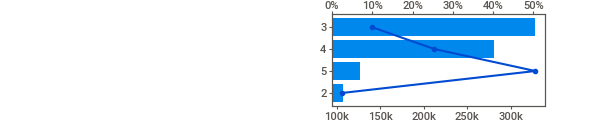
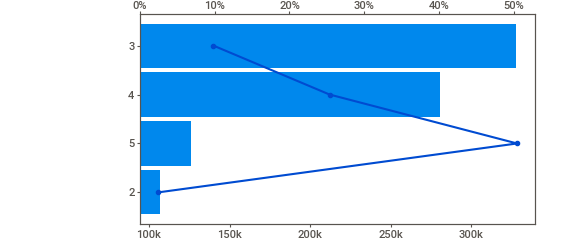
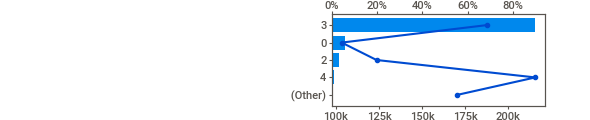
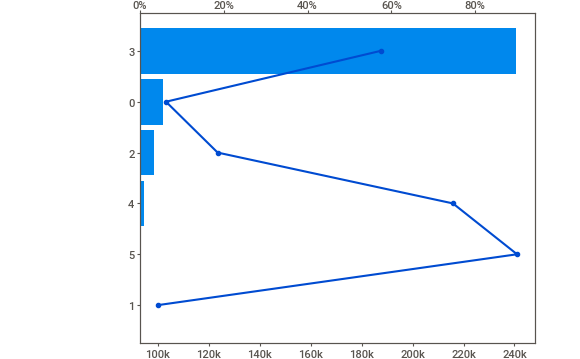
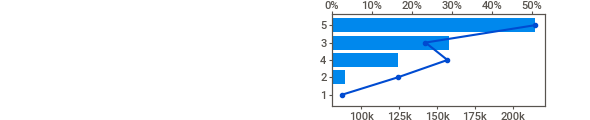
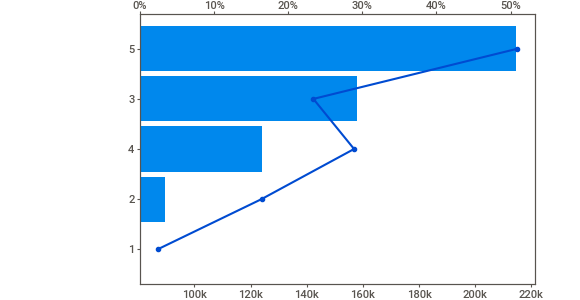
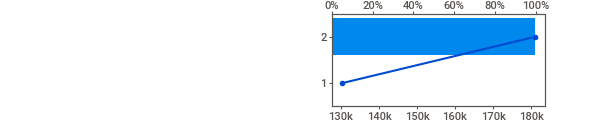
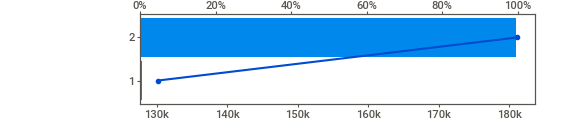
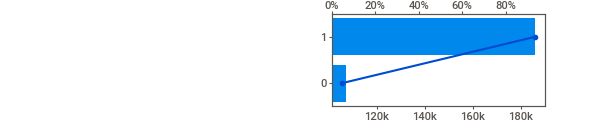
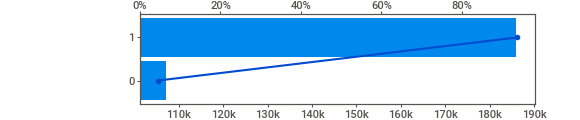
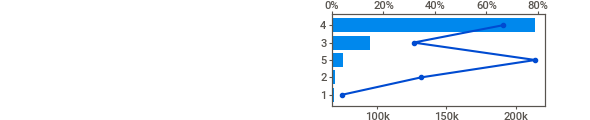
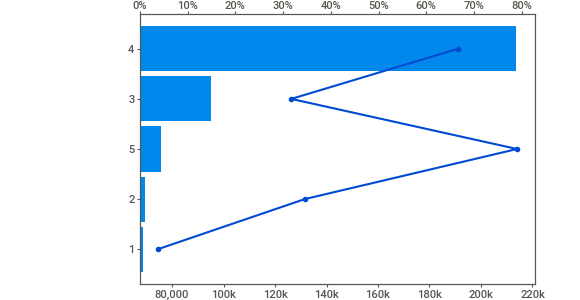
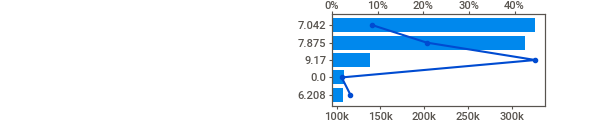
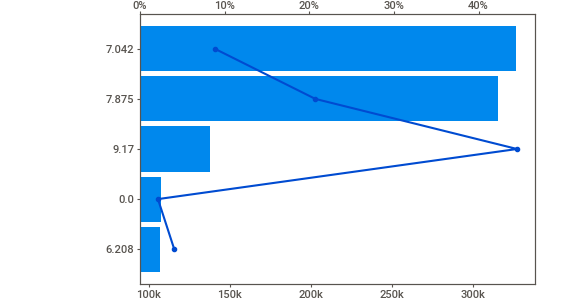
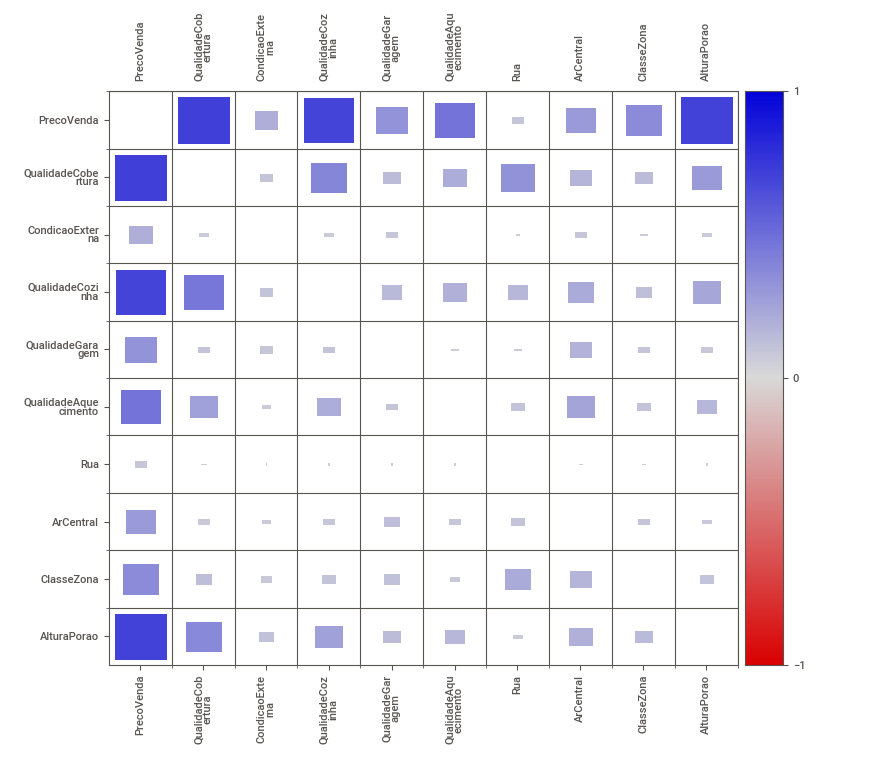
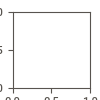

In [80]:
#Trazendo uma nova biblioteca para ajudar na EDA 

edav = sv.analyze(source = dados_filtrado5, target_feat = 'PrecoVenda')
edav.show_notebook()

As análises acima, nos permite explorar um pouco mais as influências dessas variáveis categóricas na variável alvo "PrecoVenda". Dessa maneira, percebe-se que que a qualidade da coberta e da cozinha tem uma forte relação com o target, mas também entre si, consequentemente, mostrando uma possível colinearidade. Outras variáveis que podem ser interessantes, são: QualidadeAquecimento, AlturaPorao e Arcentral.

<h2>Criando novas features</h2>

<HR>

Como forma de testar novas features que resumam melhor a informação, vamos criar algumas e observar a correlação.

In [81]:
#Lendo a variável Lareira

dados_encoder['Lareira'].value_counts()

0    690
1    650
2    115
3      5
Name: Lareira, dtype: int64

In [82]:
#Criando novas features 

#Conforto térmico = resultado em % das condições de aquecimento/resfriamento da casa
dados_encoder['ConfortoTermico'] = (dados_encoder['Lareira']/3 + dados_encoder['ArCentral']/2 + dados_encoder['QualidadeAquecimento']/5)/3*100

#Volume do Porao em m³
dados_encoder['VolumePorao'] = dados_encoder['AlturaPorao']*dados_encoder['AreaPorao']*0.0283168

#Ano médio, média entre a soma do Ano da Reforma e de Construção
dados_encoder['Anomedio'] = (dados_encoder['AnoReforma']+dados_encoder['AnoConstrucao'])/2

#Área construida por quarto em m²
dados_encoder['Areacpquarto'] = (dados_encoder['AreaConstruida']/dados_encoder['TotalQuartos'])*0.092903

#Qualidade das instalações = o resultado será uma nota de 0 a 5 
dados_encoder['Qualidadenota'] = (dados_encoder['Qualidade']/2+dados_encoder['QualidadeCobertura']+dados_encoder['QualidadeCozinha']+dados_encoder['QualidadeGaragem'])/4


In [83]:
dados_encoder[['ConfortoTermico','VolumePorao','Anomedio','Areacpquarto','Qualidadenota']].describe()

ConfortoTermico  VolumePorao     Anomedio  Areacpquarto  Qualidadenota
count      1460.000000  1460.000000  1460.000000   1460.000000    1460.000000
mean         50.028158   229.955000  1978.066781     21.451801       3.191866
std          12.170015   110.083702    22.791441      4.156517       0.513246
min           6.666667     0.000000  1915.000000     11.148360       1.125000
25%          43.333333   165.206590  1961.000000     18.487697       2.875000
50%          50.000000   208.611635  1977.500000     21.042530       3.125000
75%          61.111111   286.695495  2000.625000     23.793122       3.625000
max          83.333333  1586.553492  2010.000000     43.679894       4.750000

Como a feature bairros se mostrou uma variável categória importante, para entendermos melhor sua influência podemos obter duas novas features numéricas a partir dela: longitute e latitude.

A partir do google maps foi possível criar uma base de dados com os bairros e respectivas latitudes e longitudes aproximadas.

In [84]:
#Lendo a base de dados com as informações dos bairros

base_bairros2= pd.read_csv('Bairros_localizacao2.csv')

In [85]:
base_bairros2.head(30)

Bairro                                          Nome   Latitude  Longitude
0   Blmngtn                           Bloomington Heights  42.056224 -93.591859
1   Blueste                                      Bluestem  42.009781 -93.645584
2    BrDale                                     Briardale  42.052556 -93.628792
3   BrkSide                                     Brookside  42.028573 -93.630568
4   ClearCr                                   Clear Creek  42.035012 -93.650933
5   CollgCr                                 Colégio Creek  42.018832 -93.685763
6   Crawfor                                      Crawford  42.018319 -93.648514
7   Edwards                                       Edwards  42.020315 -93.668146
8   Gilbert                                       Gilbert  42.057673 -93.643143
9    IDOTRR                         Iowa DOT e Rail Road   42.022146 -93.627575
10  MeadowV                                Meadow Village  41.990037 -93.605695
11  Mitchel                                      Mitchell  41.994521 -93.606876
12    NAmes                                    Norte Ames  42.041193 -93.614372
13  NoRidge                                    Northridge  42.053535 -93.649547
14  NPkVill                               Northpark Villa  42.048292 -93.622396
15  NridgHt                            Northridge Heights  42.058965 -93.649809
16   NWAmes                                Northwest Ames  42.045820 -93.635935
17  OldTown                                 Cidade antiga  42.029161 -93.614776
18    SWISU  Sul e Oeste da Universidade Estadual de Iowa  42.021174 -93.650003
19   Sawyer                                      Serrador  42.033498 -93.660223
20  SawyerW                                  Sawyer Oeste  42.034756 -93.686329
21  Somerst                                      Somerset  42.051576 -93.644972
22  StoneBr                                   pedra Brook  42.059581 -93.637289
23   Timber                                    Timberland  41.994713 -93.649082
24  Veenker                                       Veenker  42.037544 -93.657463

In [86]:
#Unindo essas informações a nossa base de dados

dados_encoder= pd.merge(dados_encoder, base_bairros2, how='left', on='Bairro')

In [87]:
dados_encoder.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 84 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1460 non-null   int64  
 1   ClasseImovel          1460 non-null   int64  
 2   ClasseZona            1460 non-null   int32  
 3   Fachada               1460 non-null   float64
 4   TamanhoLote           1460 non-null   int64  
 5   Rua                   1460 non-null   int32  
 6   FormaProp             1460 non-null   object 
 7   PlanoProp             1460 non-null   object 
 8   Servicos              1460 non-null   object 
 9   ConfigLote            1460 non-null   object 
 10  InclinacaoLote        1460 non-null   object 
 11  Bairro                1460 non-null   object 
 12  Estrada1              1460 non-null   object 
 13  Estrada2              1460 non-null   object 
 14  TipoHabitacao         1460 non-null   object 
 15  EstiloHabitacao      

In [88]:
#Criando uma nova feature com base na localização distância do "centro" da cidade

#Considerando a latitude e longitude do centro: 42.02349787553224, -93.62633842853742. Vamos calcular a distância do centro (raiz de (latitude²+longitude²) e transformar em km.
# Cada grau de uma latitude ou longitude equivale a aproximadamente 111,11 Km, logo para transformar grau para quilômetro multiplicamos por 111,11.

dados_encoder['Distanciadocentro'] = ((((dados_encoder['Latitude'] - 42.02349787553224)**2) + ((dados_encoder['Longitude']-(-93.62633842853742))**2))**0.5)*111.11

In [89]:
dados_encoder.head()

Id  ClasseImovel  ClasseZona  Fachada  TamanhoLote  Rua FormaProp PlanoProp Servicos ConfigLote InclinacaoLote   Bairro Estrada1 Estrada2 TipoHabitacao EstiloHabitacao  Qualidade  Condicao  AnoConstrucao  AnoReforma TipoTelhado MaterialTelhado Exterior1 Exterior2 TipoAlvenaria  AreaAlvenaria  QualidadeCobertura  CondicaoExterna TipoFundacao  AlturaPorao CondicaoPorao ParedePorao TipoAcabPorao1  AreaAcabPorao1 TipoAcabPorao2  AreaAcabPorao2  AreaInacabPorao  AreaPorao Aquecimento  QualidadeAquecimento  ArCentral InstalacaoEletrica  AreaTerreo  Area2Andar  BaixaQualiAreaAcab  AreaConstruida  BanheiroPorao  LavaboPorao  Banheiro  Lavabo  BedroomAbvGr  KitchenAbvGr  QualidadeCozinha  TotalQuartos Funcionalidade  Lareira LocalGaragem  AnoGaragem AcabamentoGaragem  CarrosGaragem  AreaGaragem  QualidadeGaragem CondicaoGaragem EntradaPavimentada  AreaDeck  AreaVarandaAberta  AreaVarandaFechada  AreaVaranda3Estacoes  AreaAlpendre  AreaPiscina  ValorOutros  MesVenda  AnoVenda TipoVenda  \
0   1            60           4     65.0         8450    2       Reg       Lvl   AllPub     Inside            Gtl  CollgCr     Norm     Norm          1Fam          2Story          7         5           2003        2003       Gable         CompShg   VinylSd   VinylSd       BrkFace          196.0                   4                3        PConc        7.875            TA          No            GLQ             706            Unf               0              150        856        GasA                     5          1              SBrkr         856         854                   0            1710              1            0         2       1             3             1                 4             8            Typ        0       Attchd      2003.0               RFn              2          548                 3              TA                  Y         0                 61                   0                     0             0            0            0         2      2008        WD   
1   2            20           4     80.0         9600    2       Reg       Lvl   AllPub        FR2            Gtl  Veenker    Feedr     Norm          1Fam          1Story          6         8           1976        1976       Gable         CompShg   MetalSd   MetalSd          None            0.0                   3                3       CBlock        7.875            TA          Gd            ALQ             978            Unf               0              284       1262        GasA                     5          1              SBrkr        1262           0                   0            1262              0            1         2       0             3             1                 3             6            Typ        1       Attchd      1976.0               RFn              2          460                 3              TA                  Y       298                  0                   0                     0             0            0            0         5      2007        WD   
2   3            60           4     68.0        11250    2       IR1       Lvl   AllPub     Inside            Gtl  CollgCr     Norm     Norm          1Fam          2Story          7         5           2001        2002       Gable         CompShg   VinylSd   VinylSd       BrkFace          162.0                   4                3        PConc        7.875            TA          Mn            GLQ             486            Unf               0              434        920        GasA                     5          1              SBrkr         920         866                   0            1786              1            0         2       1             3             1                 4             6            Typ        1       Attchd      2001.0               RFn              2          608                 3              TA                  Y         0                 42                   0                     0             0            0            0         9      2008        WD   
3   4          

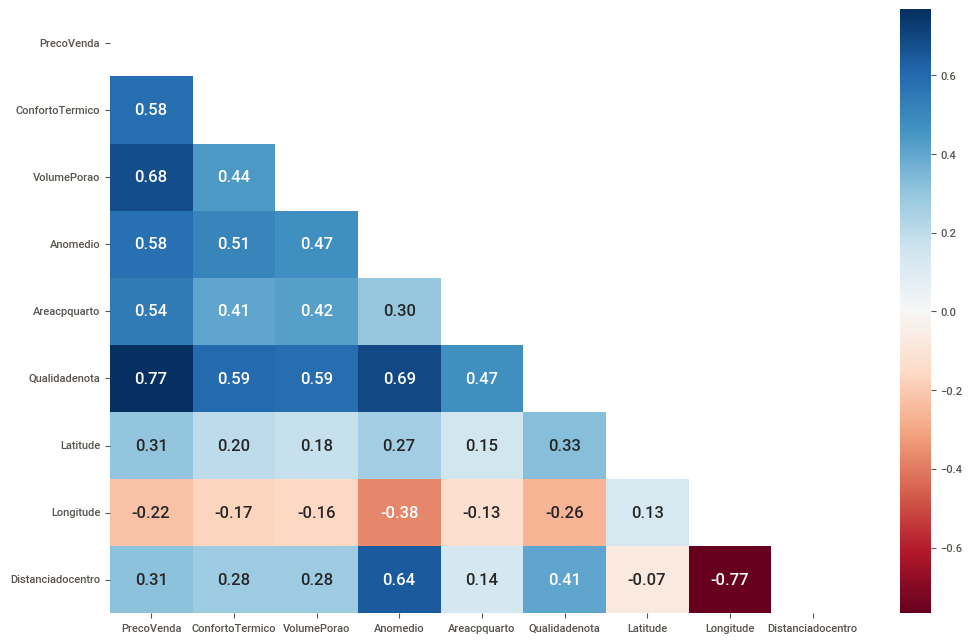

In [90]:
colunas4= ['PrecoVenda','ConfortoTermico','VolumePorao','Anomedio','Areacpquarto','Qualidadenota', 'Latitude', 'Longitude','Distanciadocentro']

dados_filtrado4 = dados_encoder[colunas4]

sns.set_context(font_scale=1.9)
plt.figure(figsize=(12,8))
sns.heatmap(
    dados_filtrado4.corr(), #Fonte dos dados, nossa matriz de correlação
    annot=True, #Anotar os valores das correlações nas caixinhas coloridas
    fmt='.2f', # Formato float de 2 dígitos, para arredondar os números
    cmap='RdBu', # Mapa de cores do vermelho (menor) para o azul (maior)
    mask=np.triu( # Faz uma matriz triangular
        np.ones_like(dados_filtrado4.corr()) # usando como base uma matriz de '1's, do mesmo tamanho que a matriz de correlação
    ) # A máscara vai então 'apagar' a diagonal superior da matriz
           )
plt.show()

A partir dessas informações, previamente percebe-se que a localização dos bairros nos dá uma ideia de que as casas mais ao norte tem um preço de venda maior, assim como, as mais afastadas do centro.

<h2>Regressão Logarítima</h2>

<HR>

<h4>Objetivo 1: interpretabilidade usando uma regressão linear</h4>

- Utilize apenas exemplos onde a variável SaleCondition é igual à Normal (isso ajuda a diminuir o ruído no dado e levar a uma melhor interpretação). Crie um novo dataset aplicando esse filtro (esse dataset será usado apenas nessa etapa)

- Aplique uma transformação logarítmica na sua variável de interesse (**SalePrice**)

- Selecione 6 features para o seu modelo: onde pelo menos uma das features é uma feature construída com os valores de área do imóvel

- As outras features devem estar relacionadas ao estado de conservação da casa, suas amenidades ou instalações internas 

- Verifique se os pressupostos da regressão linear estão sendo atendidos 

- Em um breve sumário, discorra sobre a interpretação dos coeficientes obtidos pela regressão linear


Como solicitado no desafio, vamos apenas utilizar exemplos onde a variável CondicaoVenda é igual à Normal (isso ajuda a diminuir o ruído no dado e levar a uma melhor interpretação) e aplicar um log em nossa variável alvo.

In [91]:
#Esse filtro será apenas aplicado aqui na RL

dados_encoder2 = dados_encoder.loc[dados_encoder["CondicaoVenda"] == 'Normal']

In [92]:
#Aplicando log (ln) na variável alvo e criando uma variável chamada 'LPrecoVenda'

import numpy as np

dados_encoder2['LPrecoVenda'] = np.log(dados_encoder2['PrecoVenda'])

C:\Users\lizan\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [93]:
dados_encoder2[['PrecoVenda','LPrecoVenda']].head()

PrecoVenda  LPrecoVenda
0      208500    12.247694
1      181500    12.109011
2      223500    12.317167
4      250000    12.429216
5      143000    11.870600

Agora, como sugerido no desafio, escolhe-se 6 features para o modelo de RL. Com tais condições:

- Pelo menos uma das features é uma feature construída com os valores de área do imóvel.
- As outras features devem estar relacionadas ao estado de conservação da casa, suas amenidades ou instalações internas
- As features não podem ter alta correlação (utilizar o EDA feito previamente para encontrar as features que eu julgue relevantes)

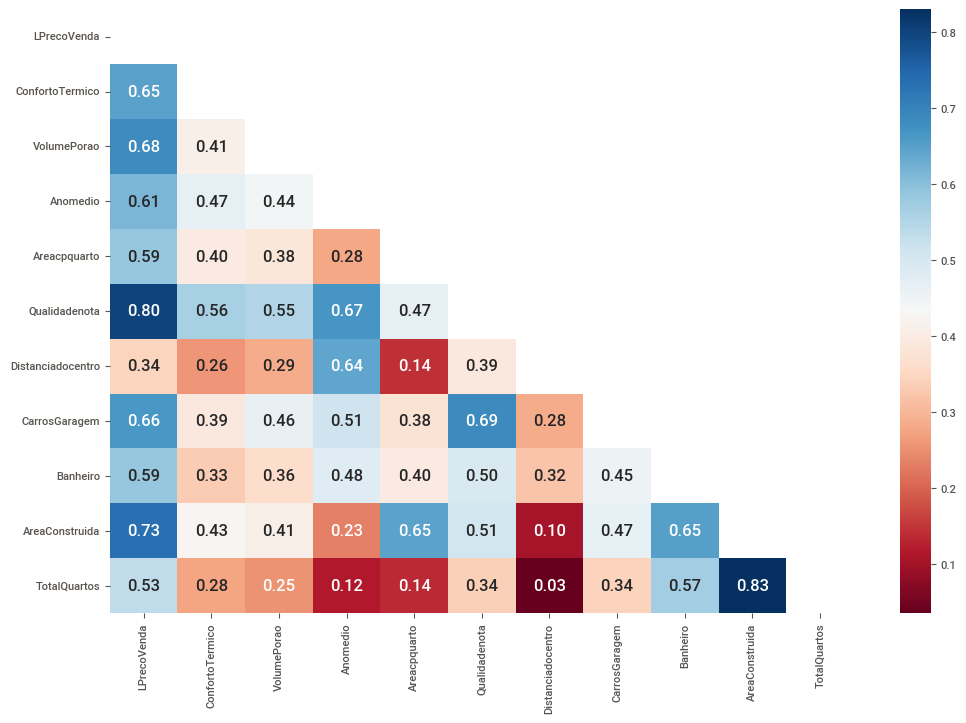

In [94]:
#Vendo a correlação de algumas variáveis

colunas5= ['LPrecoVenda','ConfortoTermico','VolumePorao','Anomedio','Areacpquarto','Qualidadenota','Distanciadocentro','CarrosGaragem','Banheiro','AreaConstruida','TotalQuartos']

dados_filtrado5 = dados_encoder2[colunas5]

sns.set_context(font_scale=1.9)
plt.figure(figsize=(12,8))
sns.heatmap(
    dados_filtrado5.corr(), #Fonte dos dados, nossa matriz de correlação
    annot=True, #Anotar os valores das correlações nas caixinhas coloridas
    fmt='.2f', # Formato float de 2 dígitos, para arredondar os números
    cmap='RdBu', # Mapa de cores do vermelho (menor) para o azul (maior)
    mask=np.triu( # Faz uma matriz triangular
        np.ones_like(dados_filtrado5.corr()) # usando como base uma matriz de '1's, do mesmo tamanho que a matriz de correlação
    ) # A máscara vai então 'apagar' a diagonal superior da matriz
           )
plt.show()

Logo, as features que escolheremos será:

- Distanciadocentro
- Qualidadenota
- ConfortoTermico
- VolumePorao
- CarrosGaragem
- AreaConstruida


In [95]:
!pip install plotly

In [96]:
!pip install --upgrade pip

In [97]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import plotly.express as px

In [98]:
#Fazendo o modelo de regressão com essas variáveis

# MODELO DE REGRESSÃO LINEAR MULTIPLA
modelo1 = smf.ols(formula = 'LPrecoVenda ~ Distanciadocentro + Qualidadenota + ConfortoTermico + VolumePorao + CarrosGaragem + AreaConstruida', data = dados_encoder2)
modelo1_fit = modelo1.fit()
print(modelo1_fit.summary())

                            OLS Regression Results                            
Dep. Variable:            LPrecoVenda   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1240.
Date:                Mon, 28 Mar 2022   Prob (F-statistic):               0.00
Time:                        00:25:15   Log-Likelihood:                 688.36
No. Observations:                1198   AIC:                            -1363.
Df Residuals:                    1191   BIC:                            -1327.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            10.2919      0.02

<h3>Avaliando o cumprimento dos requisitos do modelo de Regressão Linear</h3>

<h5>Independência</h5>

As observações são independentes entre si. Para avaliar isso, utilizamos o Teste de Durbin-Watson que diz:


- Próximo de zero → correlação (+)
- Próximo de quatro → correlação (-)
- Próximo de 2 → correlação nula (ideal)


Logo, como nosso valor de Durbin-Watson foi <b>2.024</b>, a independência está validada".

<h5>Linearidade e Homecedasticidade</h5>

Outra condição que os erros devem atender é a variância constante e média zero. 

- Ideal: Resíduos dispersos aleatoriamente em torno de zero, indica o comportamento esperado para distribuição dos erros.

C:\Users\lizan\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


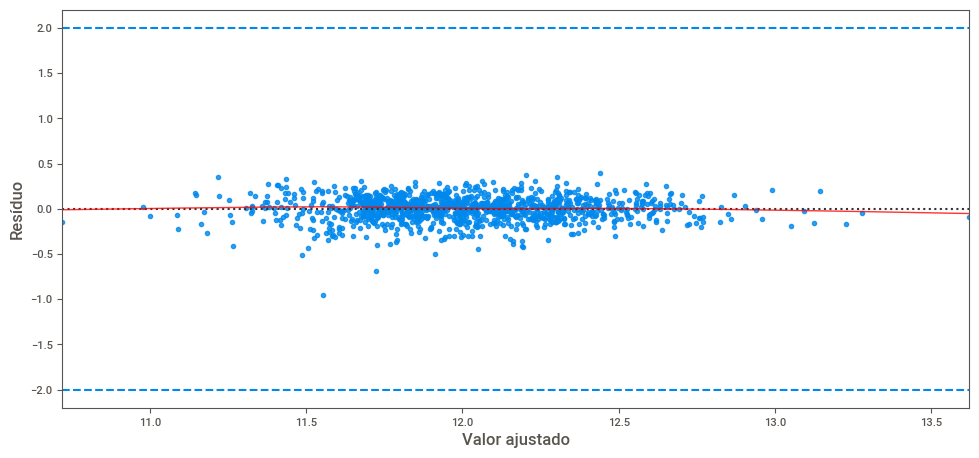

In [99]:
modelo_residuo = modelo1_fit.resid
modelo_y_ajustado = modelo1_fit.fittedvalues

# GRÁFICO PARA LINEARIDADE E HOMOCEDASTICIDADE #

sns.residplot(modelo_y_ajustado, modelo_residuo, 
                          lowess=True,
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.axhline(y = 2, linestyle='dashed')
plt.axhline(y = -2, linestyle='dashed')
plt.ylabel('Resíduo')
plt.xlabel('Valor ajustado')
plt.show()

In [100]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

#Heteroskedasticity tests

#Breush-Pagan test:

name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(modelo_residuo, modelo1_fit.model.exog)
print(lzip(name, test))
print()

#Goldfeld-Quandt test

name = ["Goldfeld-Quandt - F statistic", "p-value"]
test = sms.het_goldfeldquandt(modelo_residuo, modelo1_fit.model.exog)
print(lzip(name, test))

[('Lagrange multiplier statistic', 54.86473205842262), ('p-value', 4.936370074132669e-10), ('f-value', 9.526999664009557), ('f p-value', 3.0130440128450565e-10)]

[('Goldfeld-Quandt - F statistic', 0.8991440571435124), ('p-value', 0.901906480104319)]


Os testes de Breush-Pagan e Goldfeld-Quandt avaliam a heterocedasticidade dos resíduos. O resultado maior que 0,05 indica que a hipótese nula de homocedasticidade é rejeitada e a <b>heterocedasticidade assumida</b>. Logo, indicando o cumprimento de mais um critério do modelo.

<h5>Normalidade</h5>

Os erros (resíduos) devem ter uma distruibuição normal.

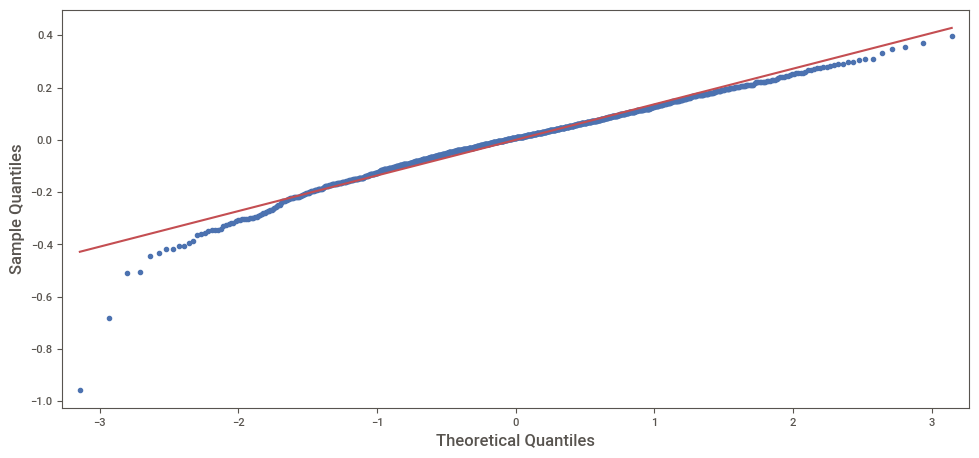

In [101]:
sm.qqplot(modelo_residuo, line="s")
plt.show()

In [102]:
dados_encoder2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1198 entries, 0 to 1459
Data columns (total 86 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1198 non-null   int64  
 1   ClasseImovel          1198 non-null   int64  
 2   ClasseZona            1198 non-null   int32  
 3   Fachada               1198 non-null   float64
 4   TamanhoLote           1198 non-null   int64  
 5   Rua                   1198 non-null   int32  
 6   FormaProp             1198 non-null   object 
 7   PlanoProp             1198 non-null   object 
 8   Servicos              1198 non-null   object 
 9   ConfigLote            1198 non-null   object 
 10  InclinacaoLote        1198 non-null   object 
 11  Bairro                1198 non-null   object 
 12  Estrada1              1198 non-null   object 
 13  Estrada2              1198 non-null   object 
 14  TipoHabitacao         1198 non-null   object 
 15  EstiloHabitacao      

In [103]:
#Multicolineariade

from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = dados_encoder2[['Distanciadocentro', 'Qualidadenota', 'ConfortoTermico', 'VolumePorao', 'CarrosGaragem', 'AreaConstruida']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

             feature        VIF
0  Distanciadocentro   6.468691
1      Qualidadenota  46.860090
2    ConfortoTermico  27.624352
3        VolumePorao   9.227725
4      CarrosGaragem  11.995781
5     AreaConstruida  15.235179


In [104]:
#Gerando os coeficientes para cada parâmetro da reta já retirando o log da variável resposta

round((np.exp(modelo1_fit.params[1:]) - 1)*100, 2)

Distanciadocentro     0.98
Qualidadenota        26.18
ConfortoTermico       0.54
VolumePorao           0.09
CarrosGaragem         5.04
AreaConstruida        0.03
dtype: float64

<h2>Interpretação dos Coeficientes</h2>

Agora que temos a reta e seus respectivos coeficientes dos parâmetros, vamos interpretar o que cada uma significa para o negócio:

- Distanciadocentro: 0.98%, o aumento da distância de 1 km do imóvel ao centro geográfico da cidade aumenta em 0.98% o preço do imóvel.
- AreaConstruida: 0.03%, o aumento de 1 m² na área construída aumenta o preço do imóvel em 0.03%.
- Qualidadenota: 25.89%, o aumento de 1 "estrela" na média das notas das qualidades das instalações (acabamento, cobertura, garagem) que vai de 0 a 5, aumenta o preço do imóvel em 25.89%.
- ConfortoTermico: 0.54%, o conforto térmico é um score de 0 a 100 que varia função da média da presença de lareiras, ar central e qualidade do aquecimento. A cada 1 unidade de aumento desse score, o preço aumenta em 0.54%. Em resumo: 
    - 1 ar central adiciona cerca de 17 pontos no score (9% no preço);
    - 1 lareira adiciona cerca de 11 pontos no score (6% no preço);
    - 1 unidade de nota que varia de 0-5 na qualidade do aquecimento adiciona cerca de 17 pontos no score (3.6% no preço);  
- CarrosGaragem: 5.04%, o aumento de 1 carro na capacidade da garagem do imóvel aumenta o preço em 5.04%.
- VolumePorao: 0.09, o aumento de 1 m³ no volume do porão aumenta o preço em 0.09%.

<h2>Objetivo 2: poder preditivo, regressão via random forest</h2>

<HR>

A ideia dessa segunda parte é treinar um modelo mais robusto visando o poder preditivo e a obtenção de um modelo para uso em produção (uso real em uma aplicação web)

- Transforme o sua variável de interesse usando uma transformação logarítmica (ex: y_log=np.log(y))
- Treine uma árvore inicial (modelo baseline), usando todas as features e sem mexer nos hiperparâmetros do modelo (usando n_estimators = 150), compute as métricas de avaliação no dataset de validação para você ter um baseline.
- Tente tunar o seu random forest. Teste diferentes hiperparâmetros, veja as instruções abaixo, use a documentação do sklearn para entender os hiperparâmetros que você for testar.
- Compute a importância das features no dataset de validação (usar permutation_importance do sklearn), usando a importância das features remova do seu treinamento as features menos importantes para que o seu modelo tenha no máximo 40 features, verifique novamente a performance com esse número reduzido de features (isso pode melhorar a performance e a velocidade do seu modelo)
- Adicione um breve texto com sua interpretação em relação à importância das features
- Finalmente, compute as métricas de avaliação no dataset de teste para obter o proxy de performance do seu modelo em um ambiente em produção (ambiente real online).
- Adicione uma conclusão para fechar o seu case

In [105]:
#transformando a variável de interesse

dados_encoder['LPrecoVenda'] = np.log(dados_encoder['PrecoVenda'])

<b>Separação dos dados em treinamento e validação:</b>

Os dados devem ser separados em treino, validação e teste, na fase de exploração e modelagem você pode avaliar o modelo usando o dataset de validação para evitar overfitting, e depois, com estudo fechado aplicar as métricas de avaliação no dataset de teste (simulando a performance em exemplos nunca vistos). Para esse caso você deve separar os datasets usando a função train_test_split do sklearn, usando como random state o número 42:

- Primeiro use a função função train_test_split  para separar 70% para treino e 30% para validação e teste
- Segundo, aplique novamente essa função para quebrar esses 30% em dois datasets, sendo 50% para teste e 50% para validação. Assim obtendo 70% para treino, 15% para validação e 15% para teste

In [106]:
#Função para criar Datasets de Treino, validação e teste

from typing import List, Tuple
from sklearn.model_selection import train_test_split

def train_test_valid_split(
    df: pd.DataFrame,
    features: list,
    target: str,
    test_size: float,
    valid_size: float,
    random_state: int,
) -> Tuple[np.array, np.array, np.array, np.array, np.array, np.array]:
    """Splits dataframe in training, testing and validation sets"""

    # The first train/test split
    (X_train, X_test, y_train, y_test) = train_test_split(
        df[features],
        df[target],
        test_size=test_size,
        random_state=random_state,
    )

    # The second train/test split
    (X_test, X_val, y_test, y_val) = train_test_split(
        X_test, y_test, test_size=valid_size, random_state=random_state
    )

    return X_train, X_test, X_val, y_train, y_test, y_val

In [107]:
#Separando features numéricas e categóricas

# Features numericas
num_features = dados_encoder.select_dtypes(include=['int', 'float']).columns.tolist()
num_features.remove('ClasseImovel')
num_features.remove('LPrecoVenda')
num_features.remove('PrecoVenda')
print(f'numerical features({len(num_features)}): {num_features}')

# Features categoricas
cat_features = dados_encoder.select_dtypes(exclude=['int', 'float']).columns.tolist()
cat_features.remove('Nome')
cat_features.append('ClasseImovel')
dados_encoder[cat_features] = dados_encoder[cat_features].astype("category")

print(f'categorical features({len(cat_features)}): {cat_features}')

numerical features(53): ['Id', 'ClasseZona', 'Fachada', 'TamanhoLote', 'Rua', 'Qualidade', 'Condicao', 'AnoConstrucao', 'AnoReforma', 'AreaAlvenaria', 'QualidadeCobertura', 'CondicaoExterna', 'AlturaPorao', 'AreaAcabPorao1', 'AreaAcabPorao2', 'AreaInacabPorao', 'AreaPorao', 'QualidadeAquecimento', 'ArCentral', 'AreaTerreo', 'Area2Andar', 'BaixaQualiAreaAcab', 'AreaConstruida', 'BanheiroPorao', 'LavaboPorao', 'Banheiro', 'Lavabo', 'BedroomAbvGr', 'KitchenAbvGr', 'QualidadeCozinha', 'TotalQuartos', 'Lareira', 'AnoGaragem', 'CarrosGaragem', 'AreaGaragem', 'QualidadeGaragem', 'AreaDeck', 'AreaVarandaAberta', 'AreaVarandaFechada', 'AreaVaranda3Estacoes', 'AreaAlpendre', 'AreaPiscina', 'ValorOutros', 'MesVenda', 'AnoVenda', 'ConfortoTermico', 'VolumePorao', 'Anomedio', 'Areacpquarto', 'Qualidadenota', 'Latitude', 'Longitude', 'Distanciadocentro']
categorical features(30): ['FormaProp', 'PlanoProp', 'Servicos', 'ConfigLote', 'InclinacaoLote', 'Bairro', 'Estrada1', 'Estrada2', 'TipoHabitacao',

In [108]:
#Dividindo o Dataset em validação,treino e teste

features = num_features + cat_features

(
  X_train, X_test, 
  X_val, y_train, 
  y_test, y_val
) = train_test_valid_split(dados_encoder, features=features, target='PrecoVenda', test_size=0.3, valid_size=0.5, random_state=42)

print('X Train shape', X_train.shape)
print('X Val shape', X_val.shape)
print('X Test shape', X_test.shape)

X Train shape (1022, 83)
X Val shape (219, 83)
X Test shape (219, 83)


In [109]:
print('Y Train shape', y_train.shape)

Y Train shape (1022,)


<h2>Pré-processamento dos dados</h2>

Aqui nessa parte, vamos tratar as features categóricas presentes no Dataset que ainda não foram passadas o encoder, já que os valores faltantes já tratamos!



In [110]:
#Importando bibliotecas

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from category_encoders.target_encoder import TargetEncoder


In [111]:
X_train[cat_features].head()

FormaProp PlanoProp Servicos ConfigLote InclinacaoLote   Bairro Estrada1 Estrada2 TipoHabitacao EstiloHabitacao TipoTelhado MaterialTelhado Exterior1 Exterior2 TipoAlvenaria TipoFundacao CondicaoPorao ParedePorao TipoAcabPorao1 TipoAcabPorao2 Aquecimento InstalacaoEletrica Funcionalidade LocalGaragem AcabamentoGaragem CondicaoGaragem EntradaPavimentada TipoVenda CondicaoVenda ClasseImovel
135        Reg       Lvl   AllPub     Inside            Gtl   NWAmes     Norm     Norm          1Fam          1Story         Hip         CompShg   Plywood   Plywood       BrkFace        PConc            TA          No            Unf            Unf        GasA              SBrkr            Typ       Attchd               Unf              TA                  Y        WD        Normal           20
1452       Reg       Lvl   AllPub     Inside            Gtl  Edwards     Norm     Norm        TwnhsE            SLvl       Gable         CompShg   VinylSd   VinylSd       BrkFace        PConc            TA          Gd            GLQ            Unf        GasA              SBrkr            Typ      Basment               Fin              TA                  Y        WD        Normal          180
762        Reg       Lvl   AllPub     Inside            Gtl  Somerst     Norm     Norm          1Fam          2Story       Gable         CompShg   VinylSd   VinylSd          None        PConc            TA          Mn            GLQ            Unf        GasA              SBrkr            Typ       Attchd               Unf              TA                  Y       Con        Normal           60
932        IR1       Lvl   AllPub     Corner            Gtl  Somerst     RRNn     Norm          1Fam          1Story         Hip         CompShg   VinylSd   ImStucc         Stone        PConc            Gd          No            Unf            Unf        GasA              SBrkr            Typ       Attchd               Fin              TA                  Y        WD        Normal           20
435        IR2       Lvl   AllPub    CulDSac            Gtl  CollgCr     PosN     Norm          1Fam          2Story       Gable         CompShg   VinylSd   VinylSd          None        PConc            TA          Av            GLQ            ALQ        GasA              SBrkr            Typ       Attchd               RFn              TA                  Y     ConLw        Normal           60

In [112]:
#Transformando as variáveis categóricas 

import category_encoders as ce 

# parâmetro cols identifica as colunas categóricas

target_encoder = ce.TargetEncoder(cols=cat_features, smoothing=0)

X_train = target_encoder.fit_transform(X_train, y=y_train,)
X_test = target_encoder.transform(X_test)
X_val = target_encoder.transform(X_val)

In [113]:
X_val.head()

Id  ClasseZona  Fachada  TamanhoLote  Rua  Qualidade  Condicao  AnoConstrucao  AnoReforma  AreaAlvenaria  QualidadeCobertura  CondicaoExterna  AlturaPorao  AreaAcabPorao1  AreaAcabPorao2  AreaInacabPorao  AreaPorao  QualidadeAquecimento  ArCentral  AreaTerreo  Area2Andar  BaixaQualiAreaAcab  AreaConstruida  BanheiroPorao  LavaboPorao  Banheiro  Lavabo  BedroomAbvGr  KitchenAbvGr  QualidadeCozinha  TotalQuartos  Lareira  AnoGaragem  CarrosGaragem  AreaGaragem  QualidadeGaragem  AreaDeck  AreaVarandaAberta  AreaVarandaFechada  AreaVaranda3Estacoes  AreaAlpendre  AreaPiscina  ValorOutros  MesVenda  AnoVenda  ConfortoTermico  VolumePorao  Anomedio  Areacpquarto  Qualidadenota   Latitude  Longitude  Distanciadocentro      FormaProp     PlanoProp      Servicos     ConfigLote  InclinacaoLote         Bairro       Estrada1       Estrada2  TipoHabitacao  EstiloHabitacao    TipoTelhado  MaterialTelhado      Exterior1      Exterior2  TipoAlvenaria   TipoFundacao  CondicaoPorao  \
1418  1419           4     71.0         9204    2          5         5           1963        1963            0.0                   3                3        7.042              25             872              247       1144                     3          1        1144           0                   0            1144              1            0         1       1             3             1                 3             6        0      1962.0              1          336                 3         0                 88                   0                     0             0            0            0         8      2008        36.666667   228.121500    1963.0     17.713505          2.875  42.041193 -93.614372           2.373469  166232.913793  180203.52694  181355.60431  178134.828169   179994.375130  147574.741935  184940.693622  181452.534057  186336.528722    177166.440711  171831.225888    180566.901296  159910.606452  163821.636364  158100.519591  151594.221968  184539.071194   
44      45           4     70.0         7945    2          5         6           1959        1959            0.0                   3                3        7.042             179             506              465       1150                     5          1        1150           0                   0            1150              1            0         1       0             3             1                 3             6        0      1959.0              1          300                 3         0                  0                   0                     0             0            0            0         5      2006        50.000000   229.317941    1959.0     17.806408          2.875  42.041193 -93.614372           2.373469  166232.913793  180203.52694  181355.60431  178134.828169   179994.375130  147574.741935  184940.693622  181452.534057  186336.528722    177166.440711  171831.225888    180566.901296  206188.571429  150293.659722  158100.519591  151594.221968  184539.071194   
588    589           4     65.0        25095    2          5         8           1968        2003            0.0                   3                3        7.042            1324               0              113       1437                     5          1        1473           0                   0            1473              2            0         1       0             1             1                 5             5        2      1968.0              1          452                 3         0                 48                   0                     0            60            0            0         6      2009        72.222222   286.547723    1985.5     27.369224          3.375  42.035012 -93.650933           3.017348  203422.848837  204725.00000  181355.60431  178134.828169   225438.888889  221842.105263  184940.693622  181452.534057  186336.528722    177166.440711  195133.636364    192385.555556  149793.246667  150293.659722  158100.519591  151594.221968  184539.071194   
1048  1049           4    100.0        21750

Ok, todos as variáveis categóricas transformadas!

<h2>Fitando um RandomForest baseline</h2>

Agora vamos rodar um modelo de RandomForest com todas as variáveis do Dataset.

- Conceito:

    Floresta Aleatória (random forest) é um algoritmo de aprendizagem supervisionada. Como você pode perceber pelo seu nome, ele cria uma floresta de um modo aleatório. A “floresta” que ele cria é uma combinação (ensemble) de árvores de decisão, na maioria dos casos treinados com o método de bagging. A idéia principal do método de bagging é que a combinação dos modelos de aprendizado aumenta o resultado geral.

In [114]:
import math

In [115]:
# Criando uma função para coletar métricas resultantes do modelo

def metrics_report(y, y_pred, dataset_name='valid'):
  mean_y = np.mean(y)
  mean_pred = np.mean(y_pred)

  rmse = round(math.sqrt(mean_squared_error(y, y_pred)), 2)
  mae = mean_absolute_error(y, y_pred)
  r2 = r2_score(y, y_pred)
  mape = mean_absolute_percentage_error(y, y_pred)
  
  report = pd.DataFrame({
    'metric': ['RMSE', 'MAE', 'R^2', 'MAPE', 'Avg. target', 'Avg. Prediction'],
    dataset_name: [rmse, mae, r2, mape, mean_y, mean_pred]
  })

  report[dataset_name] = report[dataset_name].round(2)
  return report

In [116]:
from sklearn.ensemble import RandomForestRegressor

rf_baseline = RandomForestRegressor(random_state=42)

# Treino
rf_baseline.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [117]:
y_val_baseline_pred = rf_baseline.predict(X_val)

baseline_report = metrics_report(y_val, y_val_baseline_pred, 'Validacao')

baseline_report

metric  Validacao
0             RMSE   27453.60
1              MAE   15904.96
2              R^2       0.90
3             MAPE       0.09
4      Avg. target  174313.75
5  Avg. Prediction  172082.99

Os dados acimas, nos apontam algumas leituras:

- O erro quadrático médio [RMSE] é de 27453.60 dólares. Isso indica que o modelo erra o alvo em 165.47 dólares para mais ou para menos. 
- A média do erro absoluto [MAE] de 15904.96 dólares representa a diferença entre a média do target do valor real e do predito. Na base analisada, essa diferença é de 9% [MAPE]. 
- O R² de 0.90 teve um melhor desempenho que a regressão linear de 0.86, indicando a possibilidade desse modelo prever melhor.

<h2>Melhorando os hiperparâmetros para o RandomForest</h2>


Como mencionado acima, o RandomForest é um modelo preditivo baseado em árvores de decisão. Nesse sentido, podemos tentar também melhorar o modelo através das modificações de seus hiperparâmetros. 

Hiperparâmetros são parâmetros de modelos que devem ser definidos antes de treinar o modelo. No caso do RandomForest, um dos hiperparâmetros a ser otimizado é a quantidade de árvores.

In [119]:
# hiperparams: n_estimators: [], max_features: [], min_samples_leaf: []

for n_estimators in [10, 30, 50, 70, 100, 150, 170, 200, 250]:
    
  print(f'Random forest, with n_estimators {n_estimators}')

  rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    
  rf_model.fit(X_train, y_train)

  y_val_pred = rf_model.predict(X_val)
    
  rmse = math.sqrt(mean_squared_error(y_val, y_val_pred))

  print(f'rmse: {rmse}\n')

Random forest, with n_estimators 10
rmse: 29977.33349833903

Random forest, with n_estimators 30
rmse: 28272.376617111036

Random forest, with n_estimators 50
rmse: 28409.30080706042

Random forest, with n_estimators 70
rmse: 28409.805024655725

Random forest, with n_estimators 100
rmse: 27453.60479813537

Random forest, with n_estimators 150
rmse: 27326.26206900178

Random forest, with n_estimators 170
rmse: 27329.0953660016

Random forest, with n_estimators 200
rmse: 27317.664288469627

Random forest, with n_estimators 250
rmse: 27354.514498191158



Como foi observado acima, o menor erro quadrático médio foi ao utilizar 200 árvores.

Outro hiperparâmetro que pode ser otimizado é max_features que consiste em ser o tamanho dos subconjuntos aleatórios de recursos a serem considerados ao dividir um nó.

In [121]:
# hiperparams: n_estimators: [200], max_features: [], min_samples_leaf: []

for max_features in ['sqrt', 0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8]:
    
  print(f'Random forest, with max_features {max_features}')

  rf_model = RandomForestRegressor(n_estimators=200, max_features=max_features, random_state=42)
    
  rf_model.fit(X_train, y_train)

  y_val_pred = rf_model.predict(X_val)
    
  rmse = math.sqrt(mean_squared_error(y_val, y_val_pred))

  print(f'rmse: {rmse}\n')

Random forest, with max_features sqrt
rmse: 29544.805983280225

Random forest, with max_features 0.1
rmse: 30179.484689099696

Random forest, with max_features 0.2
rmse: 28980.439746372063

Random forest, with max_features 0.3
rmse: 27899.124222915154

Random forest, with max_features 0.4
rmse: 27945.468612242246

Random forest, with max_features 0.6
rmse: 28034.088629280035

Random forest, with max_features 0.7
rmse: 27906.170235261005

Random forest, with max_features 0.8
rmse: 28302.254539360605



Logo, a melhor max_feature foi 0.4 por apresentar o menor RMSE. No entanto, o RMSE está maior do que o primeiro modelo, o que indica que não é um aboa ideia mudar esse hiperparâmetro.

Outro hiperparâmetro a ser otimizado é o min_samples_leaf. Esse hiperparâmetro indica o número mínimo de amostras necessárias para estar em um nó folha. Um ponto de divisão em qualquer profundidade só será considerado se deixar pelo menos amostras de treinamento min_samples_leaf em cada um dos ramos esquerdo e direito. Isso pode ter o efeito de suavizar o modelo, especialmente na regressão.

In [122]:
# hiperparams: n_estimators: [200], max_features: [], min_samples_leaf: []

for min_samples_leaf in list(range(1,6)):
    
  print(f'Random forest, with min_samples_leaf {min_samples_leaf}')

  rf_model = RandomForestRegressor(n_estimators=200, min_samples_leaf= min_samples_leaf, random_state=42)
    
  rf_model.fit(X_train, y_train)

  y_val_pred = rf_model.predict(X_val)
    
  rmse = math.sqrt(mean_squared_error(y_val, y_val_pred))

  print(f'rmse: {rmse}\n')

Random forest, with min_samples_leaf 1
rmse: 27317.664288469627

Random forest, with min_samples_leaf 2
rmse: 27995.942757660232

Random forest, with min_samples_leaf 3
rmse: 28586.000671868875

Random forest, with min_samples_leaf 4
rmse: 29799.65333813847

Random forest, with min_samples_leaf 5
rmse: 30556.18293369318



Ao observar os RMSE acima, percebe-se que o melhor hiperparâmetro para a min_samples_leaf é 1.

<h2>Random Forest com os melhores hiperparâmetros</h2>

In [124]:
# hiperparams: n_estimators: [200], max_features: [], min_samples_leaf: [1]

rf_model = RandomForestRegressor(n_estimators=200, min_samples_leaf= 1, random_state=42)

rf_model.fit(X_train, y_train)

y_val_pred = rf_model.predict(X_val)

metrics_report(y_val, y_val_pred, 'validation')

metric  validation
0             RMSE    27317.66
1              MAE    15944.69
2              R^2        0.90
3             MAPE        0.09
4      Avg. target   174313.75
5  Avg. Prediction   171876.40

Ao compararmos as métricas acima com as do primeiro modelo que foi rodado, percebe-se que o ajuste dos hiperparâmetros reduziu o RMSE em 135.94 e o erro médio absoluto em 39.73. O R² e o MAPE se manteve o mesmo considerando os algarismos significativos apresentados.

<h2>Importância das Features</h2>

- Compute a importância das features no dataset de validação (usar permutation_importance do sklearn), usando a importância das features remova do seu treinamento as features menos importantes para que o seu modelo tenha no máximo 40 features, verifique novamente a performance com esse número reduzido de features (isso pode melhorar a performance e a velocidade do seu modelo).

Referência: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html">Biblioteca</a></p>

In [125]:
from sklearn.inspection import permutation_importance

print('Executando a importância do recurso de permutação')

permutation_result = permutation_importance(rf_model, X_val, y_val, n_repeats=5, random_state=42)

Executando a importância do recurso de permutação


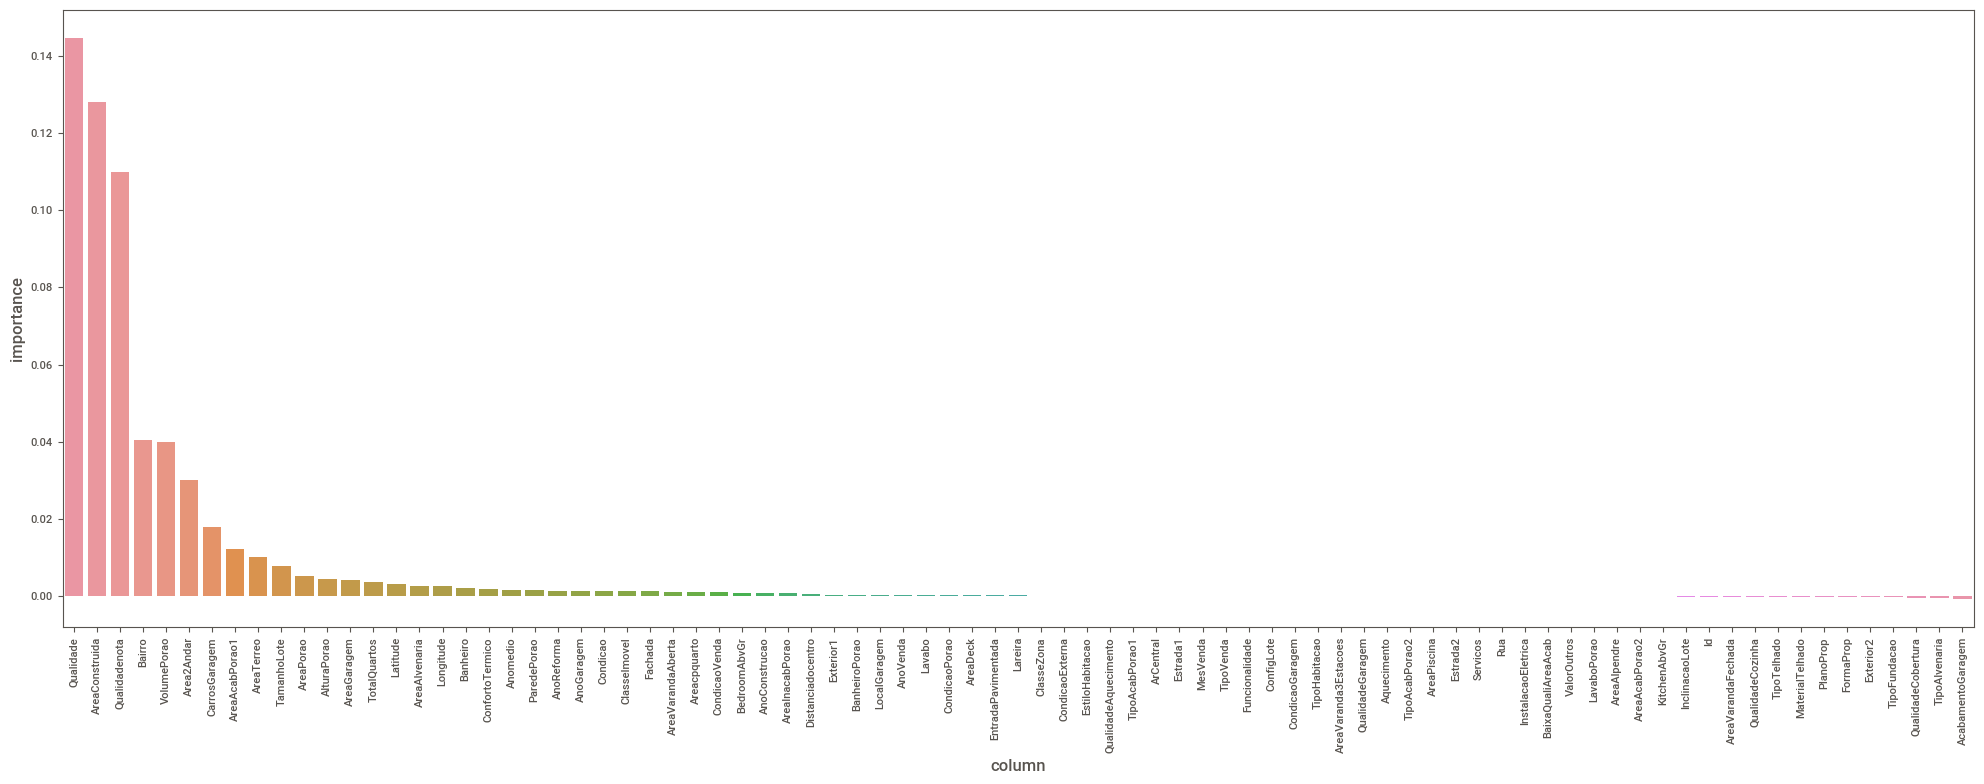

In [126]:
#Plotando o permutation feature importance

importances = pd.DataFrame({'column' : X_val.columns, 'importance': permutation_result.importances_mean})
importances.sort_values(by='importance', ascending=False, inplace=True)

fig, axs = plt.subplots(figsize=(20,8))
ax = sns.barplot(x='column', y="importance", data=importances)
plt.xticks(rotation=90)
plt.tight_layout()

In [127]:
# Pegando as 25 melhores features

best_features = importances.head(25).column.tolist()
print(best_features)

['Qualidade', 'AreaConstruida', 'Qualidadenota', 'Bairro', 'VolumePorao', 'Area2Andar', 'CarrosGaragem', 'AreaAcabPorao1', 'AreaTerreo', 'TamanhoLote', 'AreaPorao', 'AlturaPorao', 'AreaGaragem', 'TotalQuartos', 'Latitude', 'AreaAlvenaria', 'Longitude', 'Banheiro', 'ConfortoTermico', 'Anomedio', 'ParedePorao', 'AnoReforma', 'AnoGaragem', 'Condicao', 'ClasseImovel']


A partir da Feature Importance foi percebido que a variável mais importante para o modelo foi a Qualidade seguida da Areaconstruida, features já constantes na base de dados. A qualidadenota e VolumePorao, foram features criadas e acabaram ocupando o 3º e 5º lugar. A latitude e longitude também apareceram entre as 25 melhores, tendo Bairro como 4º feature mais importante.

Isso quer dizer que, assim como na regressão linear, a qualidade das instalações do imóvel se revelou como mais importante ao definir um preço. Posteriormente e mais óbvio, o tamanho do espaço construído ao todo. E não menos importante, a localização do imóvel considerando o Bairro que se localiza. 

<h2>Retreinando o RandomForest apenas com as top 25 variáveis mais importantes</h2>

In [128]:
# Rodando o modelo com melhores hiperparâmetros
rf_model = RandomForestRegressor(n_estimators=200, min_samples_leaf= 1, random_state=42)
rf_model.fit(X_train[best_features], y_train)

# Calculando as predições
y_train_pred = rf_model.predict(X_train[best_features])
y_val_pred = rf_model.predict(X_val[best_features])
y_test_pred = rf_model.predict(X_test[best_features])

# Gerando os relatórios
train_report = metrics_report(y_train, y_train_pred, 'train')
val_report = metrics_report(y_val, y_val_pred, 'validation')
test_report = metrics_report(y_test, y_test_pred, 'test')

final_report = pd.concat([train_report, val_report[['validation']],  test_report[['test']]], axis=1)

print(f'Baseline report (total features: {len(features)})')
print(baseline_report)
print('')
print(f'Final report (total features: {len(best_features)})')
print(final_report)

Baseline report (total features: 83)
            metric  Validacao
0             RMSE   27453.60
1              MAE   15904.96
2              R^2       0.90
3             MAPE       0.09
4      Avg. target  174313.75
5  Avg. Prediction  172082.99

Final report (total features: 25)
            metric      train  validation       test
0             RMSE   11308.94    25311.80   22963.44
1              MAE    6422.54    15316.80   15059.14
2              R^2       0.98        0.92       0.92
3             MAPE       0.04        0.09       0.10
4      Avg. target  181312.69   174313.75  185701.65
5  Avg. Prediction  180985.80   172094.92  185878.31


O relatório acima mostra claramente a influência de utilizar variáveis que tragam maiores ganhos de informação ao utilizar o modelo de Random Forest. Ao reduzí-las e selecionar as 25 mais importantes, conseguiu aumentar o R² do modelo para 0.92 e reduzir o RMSE em 2141.8 e o MAE 588.16 dólares.

Outro ponto importante a ser destacado é que a <b>seleção melhor dos dados se mostrou mais impactante que a melhoria de hiperparâmetros</b>. Isso induz a pensar que possivelmente seja melhor coletar e tratar melhor os dados, do que investir tanto tempo na melhoria do modelo. 

Por fim, vamos avaliar a importância das variáveis nesse último modelo:

Executando a importância do recurso de permutação para o modelo final...


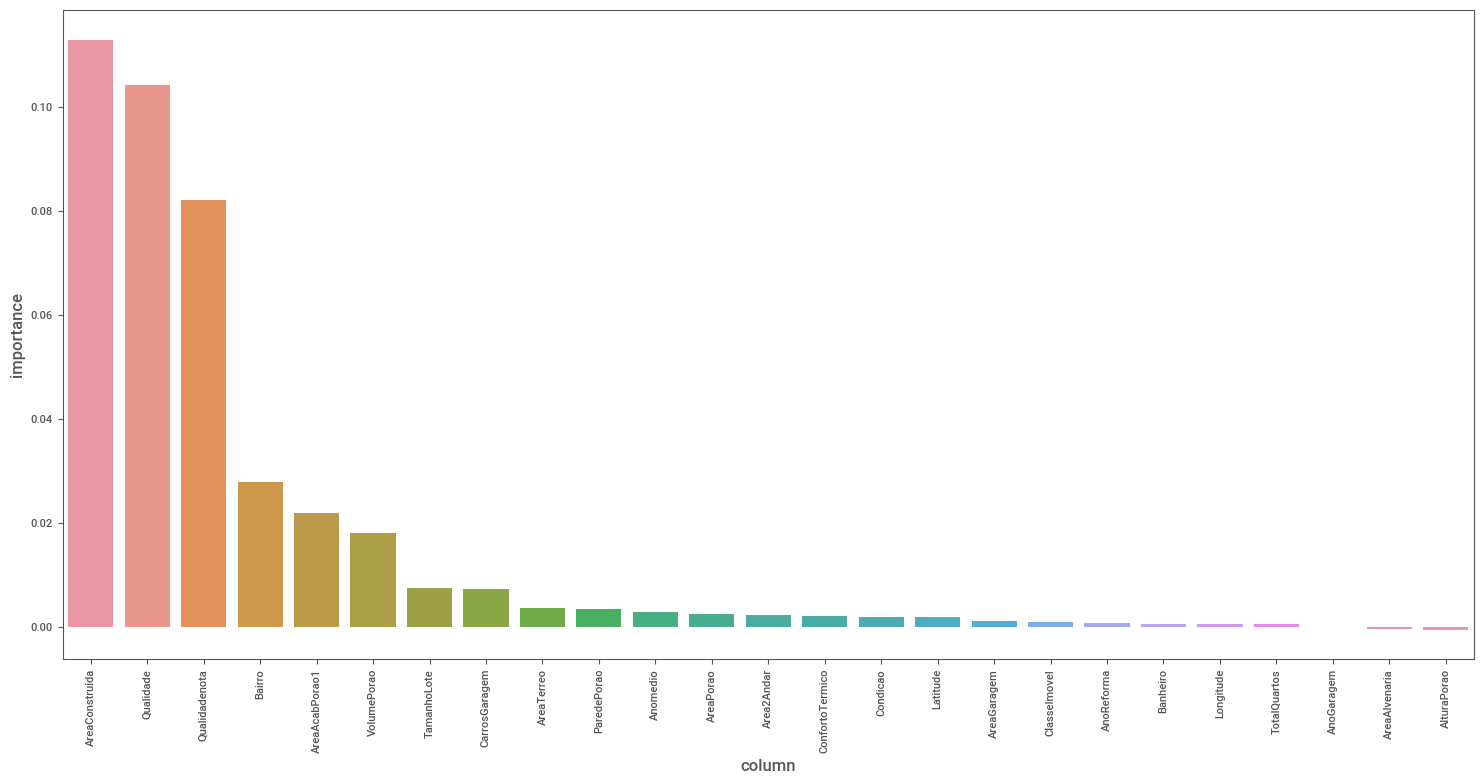

In [129]:
print('Executando a importância do recurso de permutação para o modelo final...')

permutation_result = permutation_importance(rf_model, X_test[best_features], y_test, n_repeats=5, random_state=42)

importances = pd.DataFrame({'column' : X_test[best_features].columns, 'importance': permutation_result.importances_mean})
importances.sort_values(by='importance', ascending=False, inplace=True)

fig, axs = plt.subplots(figsize=(15,8))
ax = sns.barplot(x='column', y="importance", data=importances)
plt.xticks(rotation=90)
plt.tight_layout()

Como se pode perceber, algumas variáveis mudaram de posição de importância. Isso demostra que a importância delas no modelo depende muito também do conjunto de variáveis que é selecionado para o desenvolvimento. Apesar disso, a área construída, a qualidade das instalações, a localização no bairro e dimensões do porão continuam sendo as variáveis mais relevantes.